<a href="https://colab.research.google.com/github/adhang/data-science-digital-skola/blob/update/99.%20Final%20Project/Telco%20Customer%20Churn%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telco Customer Churn Prediction
Author: Adhang Muntaha Muhammad

[![LinkedIn](https://img.shields.io/badge/linkedin-0077B5?style=for-the-badge&logo=linkedin&logoColor=white&link=https://www.linkedin.com/in/adhangmuntaha/)](https://www.linkedin.com/in/adhangmuntaha/)
[![GitHub](https://img.shields.io/badge/github-121011?style=for-the-badge&logo=github&logoColor=white&link=https://github.com/adhang)](https://github.com/adhang)
[![Kaggle](https://img.shields.io/badge/kaggle-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white&link=https://www.kaggle.com/adhang)](https://www.kaggle.com/adhang)
[![Tableau](https://img.shields.io/badge/tableau-E97627?style=for-the-badge&logo=tableau&logoColor=white&link=https://public.tableau.com/app/profile/adhang)](https://public.tableau.com/app/profile/adhang)
___

**Context**
- The telco customer churn data contains customer information from a fictional telco company
- This company provides various services such as streaming, phone, and internet services
<br><br>

**Problem Background**
- Customer churn is one of the biggest problems in the telecommunications industry
- By definition, customer churn is when customers stop interacting (subscribe) with the company
- Companies need to invest (expense costs) to get new customers
- When a customer leaves the service (churns), it indicates a loss of investment
- Cost, time, and effort need to be channelled to replace customers who have left the service
- Acquiring new customers is often more difficult and more expensive than retaining existing customers
- On Hardvard Business Review [page](https://hbr.org/2014/10/the-value-of-keeping-the-right-customers), they said: acquiring a new customer is anywhere from five to 25 times more expensive than retaining an existing one
<br><br>

**Objectives**
- Predict whether customers will continue to use the service or will leave the service
- Understand the customer behaviors: what keeps customers using the service and what makes them leave the service
<br><br>

**Contents**
1. Dataset Information
2. Importing Libraries
3. Dataset Overview
4. Dataset Overview - Function
5. Exploratory Data Analysis
6. Data Preprocessing

# 1. Dataset Information
This dataset comes from Kaggle, you can find it here: [Telco Customer Churn](https://www.kaggle.com/blastchar/telco-customer-churn).
<br><br>
This dataset is used to predict behavior to retain customers. Each row represents a customer, and each column contains customer's attribute.
<br><br>
**Attribute Information**
- Identifier
  - `customerID` - ID number of the customer

- Target Variable
  - `Churn` - Churn status, whether the customer churned or not

- Demographic information
  - `gender` - Whether the customer is a male or a female
  - `SeniorCitizen` - Whether the customer is a senior citizen or not
  - `Partner` - Whether the customer has a partner or not
  - `Dependents` - Whether the customer has dependents or not

- Customer account information
  - `tenure` - Number of months the customer has used the service
  - `Contract` - The contract term of the customer
  - `PaperlessBilling` - Whether the customer has paperless billing or not
  - `PaymentMethod` - The customer’s payment method
  - `MonthlyCharges` - The amount charged to the customer monthly
  - `TotalCharges` - The total amount charged to the customer
  
- Services that each customer has signed up for
  - `PhoneService` - Whether the customer has a phone service or not
  - `MultipleLines` - Whether the customer has multiple lines or not
  - `InternetService` - Customer’s internet service provider
  - `OnlineSecurity` - Whether the customer has online security or not
  - `OnlineBackup` - Whether the customer has online backup or not
  - `DeviceProtection` - Whether the customer has device protection or not
  - `TechSupport` - Whether the customer has tech support or not
  - `StreamingTV` - Whether the customer has streaming TV or not
  - `StreamingMovies` - Whether the customer has streaming movies or not
<br><br>

**Note:** Since this dataset is using `CamelCase` format for the column names, for this project, I will convert it to `snake_case` format.

# 2. Importing Libraries

In [ ]:
# !pip install --upgrade matplotlib
# !pip install --upgrade seaborn
!pip install inflection
!pip install dython

In [1]:
# association between attributes
from dython.nominal import associations

# basic
import pandas as pd
import numpy as np

# viz
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':1.5})
# I change the maximum width in characters of a column (default: 50)
pd.set_option('display.max_colwidth', None)

# CamelCase to snake_case format
import inflection

# encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# oversampling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import ADASYN

# train test split
from sklearn.model_selection import train_test_split

# model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# model evaluation & tuning hyperparameter
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# 3. Dataset Overview
This is just a basic analysis, such as finding missing values, data types of each column, data variation, etc.
<br><br>
I do this analysis because it seems that this dataset contains no null values. But, actually, it has some null values (clue: on the total charge attribute).
<br><br>
If you want to skip reading this section, you can jump to the next section.

## Reading Dataset

In [ ]:
path = 'https://raw.githubusercontent.com/adhang/data-science-digital-skola/main/99.%20Final%20Project/dataset/Telco-Customer-Churn.csv'

data = pd.read_csv(path)
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

## Duplicate Values

In [ ]:
data.duplicated().sum()

0

This dataset doesn't have any duplicate values. It's a good sign.
<br><br>
Since the `customerID` is not essential, I will drop it.

In [ ]:
data.drop('customerID', axis=1, inplace=True)
data.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

## Renaming Column Names
Since this dataset is using `CamelCase` format for the column names, I will convert it to `snake_case` format. It's just a personal preference.

In [ ]:
# renaming the column
column_list = list(data.columns)

for i, col in enumerate(column_list):
  column_list[i] = inflection.underscore(column_list[i]).replace(' ', '_')

data.columns = column_list
data.head()

gender  senior_citizen partner dependents  tenure phone_service  \
0  Female               0     Yes         No       1            No   
1    Male               0      No         No      34           Yes   
2    Male               0      No         No       2           Yes   
3    Male               0      No         No      45            No   
4  Female               0      No         No       2           Yes   

     multiple_lines internet_service online_security online_backup  \
0  No phone service              DSL              No           Yes   
1                No              DSL             Yes            No   
2                No              DSL             Yes           Yes   
3  No phone service              DSL             Yes            No   
4                No      Fiber optic              No            No   

  device_protection tech_support streaming_tv streaming_movies  \
0                No           No           No               No   
1               Yes           No           No               No   
2                No           No           No               No   
3               Yes          Yes           No               No   
4                No           No           No               No   

         contract paperless_billing             payment_method  \
0  Month-to-month               Yes           Electronic check   
1        One year                No               Mailed check   
2  Month-to-month               Yes               Mailed check   
3        One year                No  Bank transfer (automatic)   
4  Month-to-month               Yes           Electronic check   

   monthly_charges total_charges churn  
0            29.85         29.85    No  
1            56.95        1889.5    No  
2            53.85        108.15   Yes  
3            42.30       1840.75    No  
4            70.70        151.65   Yes

## Data Types

### General Data Type

In [ ]:
# numerical
column_list_numerical = ['tenure', 'monthly_charges', 'total_charges']

# categorical
column_list_categorical = list(data.columns)
column_list_categorical.remove('tenure')
column_list_categorical.remove('monthly_charges')
column_list_categorical.remove('total_charges')

data_type_general = dict()

for col in data.columns:
  if col in column_list_numerical:
    data_type_general[col] = 'numerical'
  else:
    data_type_general[col] = 'categorical'

tmp = pd.Series(data_type_general)
data_type_general = pd.DataFrame(tmp).T.rename({0:'general data types'})
data_type_general

gender senior_citizen      partner   dependents  \
general data types  categorical    categorical  categorical  categorical   

                       tenure phone_service multiple_lines internet_service  \
general data types  numerical   categorical    categorical      categorical   

                   online_security online_backup device_protection  \
general data types     categorical   categorical       categorical   

                   tech_support streaming_tv streaming_movies     contract  \
general data types  categorical  categorical      categorical  categorical   

                   paperless_billing payment_method monthly_charges  \
general data types       categorical    categorical       numerical   

                   total_charges        churn  
general data types     numerical  categorical

### Python Data Type

In [ ]:
data_type_python = pd.DataFrame(data.dtypes).T.rename({0:'python data types'})
data_type_python

gender senior_citizen partner dependents tenure  \
python data types  object          int64  object     object  int64   

                  phone_service multiple_lines internet_service  \
python data types        object         object           object   

                  online_security online_backup device_protection  \
python data types          object        object            object   

                  tech_support streaming_tv streaming_movies contract  \
python data types       object       object           object   object   

                  paperless_billing payment_method monthly_charges  \
python data types            object         object         float64   

                  total_charges   churn  
python data types        object  object

From this output, we can see that the `total_charges` attribute has `object` data type. So, I will change it to numeric.
<br><br>
Before converting to numeric data type, since I had already explored this dataset, let's check the `total_charges` attribute where the `tenure` attribute is `0`.

In [ ]:
data[data['tenure'] == 0]

gender  senior_citizen partner dependents  tenure phone_service  \
488   Female               0     Yes        Yes       0            No   
753     Male               0      No        Yes       0           Yes   
936   Female               0     Yes        Yes       0           Yes   
1082    Male               0     Yes        Yes       0           Yes   
1340  Female               0     Yes        Yes       0            No   
3331    Male               0     Yes        Yes       0           Yes   
3826    Male               0     Yes        Yes       0           Yes   
4380  Female               0     Yes        Yes       0           Yes   
5218    Male               0     Yes        Yes       0           Yes   
6670  Female               0     Yes        Yes       0           Yes   
6754    Male               0      No        Yes       0           Yes   

        multiple_lines internet_service      online_security  \
488   No phone service              DSL                  Yes   
753                 No               No  No internet service   
936                 No              DSL                  Yes   
1082               Yes               No  No internet service   
1340  No phone service              DSL                  Yes   
3331                No               No  No internet service   
3826               Yes               No  No internet service   
4380                No               No  No internet service   
5218                No               No  No internet service   
6670               Yes              DSL                   No   
6754               Yes              DSL                  Yes   

            online_backup    device_protection         tech_support  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

             streaming_tv     streaming_movies  contract paperless_billing  \
488                   Yes                   No  Two year               Yes   
753   No internet service  No internet service  Two year                No   
936                   Yes                  Yes  Two year                No   
1082  No internet service  No internet service  Two year                No   
1340                  Yes                   No  Two year                No   
3331  No internet service  No internet service  Two year                No   
3826  No internet service  No internet service  Two year                No   
4380  No internet service  No internet service  Two year                No   
5218  No internet service  No internet service  One year               Yes   
6670                  Yes                   No  Two year                No   
6754                   No                   No  Two year               Yes   

                 payment_method  monthly_charges total_charges churn  
488   Bank transfer (automatic)            52.55                  No  
753                Mailed check            20.25                  No  
936                Mailed check            80.85                  No  
1082               Mailed check            25.75                  No  
1340    Credit card (automatic)            56.05                  No  
3331               Mailed check            19.85                  No  
3826               Mailed check            25.35                  No  
43

If you look at the original dataset, if the `tenure` attribute has `0` value, it will have blank value on the `total_charges` attribute. It's reasonable, since they haven't used any services, so they don't have any charges.
<br><br>
But, it's not a null value.

In [ ]:
data['total_charges'].isna().sum()

0

In [ ]:
data.loc[488, 'total_charges']

' '

It's not null, but a blank space `' '`. So, I will use `errors = coerce` parameter to set the invalid parsing (blank space) as `NaN`.

In [ ]:
data['total_charges'] = pd.to_numeric(data['total_charges'], errors='coerce')
data['total_charges'].isna().sum()

11

After converting to numeric data type, our data contains 11 `NaN` values, since some of the value is not a numeric. Then, I will replace the null value with `0`.

In [ ]:
data['total_charges'].fillna(0, inplace=True)
data['total_charges'].isna().sum()

0

In [ ]:
data['total_charges'] = data['total_charges'].astype(float)
data.dtypes

gender                object
senior_citizen         int64
partner               object
dependents            object
tenure                 int64
phone_service         object
multiple_lines        object
internet_service      object
online_security       object
online_backup         object
device_protection     object
tech_support          object
streaming_tv          object
streaming_movies      object
contract              object
paperless_billing     object
payment_method        object
monthly_charges      float64
total_charges        float64
churn                 object
dtype: object

It works. So, I will re-create the dataframe to store the data type of each column.

In [ ]:
data_type_python = pd.DataFrame(data.dtypes).T.rename({0:'python data types'})
data_type_python

gender senior_citizen partner dependents tenure  \
python data types  object          int64  object     object  int64   

                  phone_service multiple_lines internet_service  \
python data types        object         object           object   

                  online_security online_backup device_protection  \
python data types          object        object            object   

                  tech_support streaming_tv streaming_movies contract  \
python data types       object       object           object   object   

                  paperless_billing payment_method monthly_charges  \
python data types            object         object         float64   

                  total_charges   churn  
python data types       float64  object

## Total Data

In [ ]:
data_count = pd.DataFrame(data.count()).T.rename({0:'total data'})
data_count

gender  senior_citizen  partner  dependents  tenure  \
total data    7043            7043     7043        7043    7043   

            phone_service  multiple_lines  internet_service  online_security  \
total data           7043            7043              7043             7043   

            online_backup  device_protection  tech_support  streaming_tv  \
total data           7043               7043          7043          7043   

            streaming_movies  contract  paperless_billing  payment_method  \
total data              7043      7043               7043            7043   

            monthly_charges  total_charges  churn  
total data             7043           7043   7043

## Null Values

### Total Null Values

In [ ]:
data_null_total = pd.DataFrame(data.isna().sum()).T.rename({0:'total null'})
data_null_total

gender  senior_citizen  partner  dependents  tenure  \
total null       0               0        0           0       0   

            phone_service  multiple_lines  internet_service  online_security  \
total null              0               0                 0                0   

            online_backup  device_protection  tech_support  streaming_tv  \
total null              0                  0             0             0   

            streaming_movies  contract  paperless_billing  payment_method  \
total null                 0         0                  0               0   

            monthly_charges  total_charges  churn  
total null                0              0      0

### Null Values Percentage

In [ ]:
data_null_percentage = pd.DataFrame(100*data.isna().sum()/data.shape[0]).T.rename({0:'percentage null'})
data_null_percentage

gender  senior_citizen  partner  dependents  tenure  \
percentage null     0.0             0.0      0.0         0.0     0.0   

                 phone_service  multiple_lines  internet_service  \
percentage null            0.0             0.0               0.0   

                 online_security  online_backup  device_protection  \
percentage null              0.0            0.0                0.0   

                 tech_support  streaming_tv  streaming_movies  contract  \
percentage null           0.0           0.0               0.0       0.0   

                 paperless_billing  payment_method  monthly_charges  \
percentage null                0.0             0.0              0.0   

                 total_charges  churn  
percentage null            0.0    0.0

## Data Variation
I will find out the data variation:
- The range of data, for numerical data
- The category variations, for categorical data

### Numerical Data
This dataset only contains 3 numerical data: `tenure`, `monthly_charges` and `total_charges`.

In [ ]:
data[column_list_numerical].min()

tenure              0.00
monthly_charges    18.25
total_charges       0.00
dtype: float64

In [ ]:
data[column_list_numerical].max()

tenure               72.00
monthly_charges     118.75
total_charges      8684.80
dtype: float64

In [ ]:
variation_numerical = dict()

for col in column_list_numerical:
  tmp = f'{data[col].min()} - {data[col].max()}'
  variation_numerical[col] = tmp

tmp = pd.Series(variation_numerical)
data_variation_numerical = pd.DataFrame(tmp).T.rename({0:'data variation'})
data_variation_numerical

tenure monthly_charges total_charges
data variation  0 - 72  18.25 - 118.75  0.0 - 8684.8

### Categorical Data

In [ ]:
variation_categorical = dict()

for col in column_list_categorical:
  tmp = data[col].unique().tolist()
  tmp.sort()
  variation_categorical[col] = ', '.join(str(item) for item in tmp)

tmp = pd.Series(variation_categorical)
data_variation_categorical = pd.DataFrame(tmp).T.rename({0:'data variation'})
data_variation_categorical

gender senior_citizen  partner dependents phone_service  \
data variation  Female, Male           0, 1  No, Yes    No, Yes       No, Yes   

                           multiple_lines      internet_service  \
data variation  No, No phone service, Yes  DSL, Fiber optic, No   

                             online_security                 online_backup  \
data variation  No, No internet service, Yes  No, No internet service, Yes   

                           device_protection                  tech_support  \
data variation  No, No internet service, Yes  No, No internet service, Yes   

                                streaming_tv              streaming_movies  \
data variation  No, No internet service, Yes  No, No internet service, Yes   

                                          contract paperless_billing  \
data variation  Month-to-month, One year, Two year           No, Yes   

                                                                                    payment_method  \
data variation  Bank transfer (automatic), Credit card (automatic), Electronic check, Mailed check   

                  churn  
data variation  No, Yes

### Overall Data Variation

In [ ]:
data_variation = pd.concat([data_variation_numerical, data_variation_categorical], axis=1)
# data_variation = data_variation.reindex(data.columns, axis=1)
data_variation

tenure monthly_charges total_charges        gender  \
data variation  0 - 72  18.25 - 118.75  0.0 - 8684.8  Female, Male   

               senior_citizen  partner dependents phone_service  \
data variation           0, 1  No, Yes    No, Yes       No, Yes   

                           multiple_lines      internet_service  \
data variation  No, No phone service, Yes  DSL, Fiber optic, No   

                             online_security                 online_backup  \
data variation  No, No internet service, Yes  No, No internet service, Yes   

                           device_protection                  tech_support  \
data variation  No, No internet service, Yes  No, No internet service, Yes   

                                streaming_tv              streaming_movies  \
data variation  No, No internet service, Yes  No, No internet service, Yes   

                                          contract paperless_billing  \
data variation  Month-to-month, One year, Two year           No, Yes   

                                                                                    payment_method  \
data variation  Bank transfer (automatic), Credit card (automatic), Electronic check, Mailed check   

                  churn  
data variation  No, Yes

In [ ]:
pd.concat([data_variation_numerical.rename({'data variation':'range'}), data_variation_categorical.rename({'data variation':'variation'})], axis=0).fillna('-').reindex(data.columns, axis=1).T

range  \
gender                          -   
senior_citizen                  -   
partner                         -   
dependents                      -   
tenure                     0 - 72   
phone_service                   -   
multiple_lines                  -   
internet_service                -   
online_security                 -   
online_backup                   -   
device_protection               -   
tech_support                    -   
streaming_tv                    -   
streaming_movies                -   
contract                        -   
paperless_billing               -   
payment_method                  -   
monthly_charges    18.25 - 118.75   
total_charges        0.0 - 8684.8   
churn                           -   

                                                                                            variation  
gender                                                                                   Female, Male  
senior_citizen                                                                                   0, 1  
partner                                                                                       No, Yes  
dependents                                                                                    No, Yes  
tenure                                                                                              -  
phone_service                                                                                 No, Yes  
multiple_lines                                                              No, No phone service, Yes  
internet_service                                                                 DSL, Fiber optic, No  
online_security                                                          No, No internet service, Yes  
online_backup                                                            No, No internet service, Yes  
device_protection                                                        No, No internet service, Yes  
tech_support                                                             No, No internet service, Yes  
streaming_tv                                                             No, No internet service, Yes  
streaming_movies                                                         No, No internet service, Yes  
contract                                                           Month-to-month, One year, Two year  
paperless_billing                                                                             No, Yes  
payment_method     Bank transfer (automatic), Credit card (automatic), Electronic check, Mailed check  
monthly_charges                                                                                     -  
total_charges                                                                                       -  
churn                                                                                         No, Yes

## Data Info

In [ ]:
data_info = pd.concat([data_type_general, data_type_python,
                       data_count, data_null_total,
                       data_null_percentage.round(2), data_variation],
                      axis=0)

data_info = data_info.reindex(data.columns, axis=1)
data_info

gender senior_citizen      partner   dependents  \
general data types   categorical    categorical  categorical  categorical   
python data types         object          int64       object       object   
total data                  7043           7043         7043         7043   
total null                     0              0            0            0   
percentage null              0.0            0.0          0.0          0.0   
data variation      Female, Male           0, 1      No, Yes      No, Yes   

                       tenure phone_service             multiple_lines  \
general data types  numerical   categorical                categorical   
python data types       int64        object                     object   
total data               7043          7043                       7043   
total null                  0             0                          0   
percentage null           0.0           0.0                        0.0   
data variation         0 - 72       No, Yes  No, No phone service, Yes   

                        internet_service               online_security  \
general data types           categorical                   categorical   
python data types                 object                        object   
total data                          7043                          7043   
total null                             0                             0   
percentage null                      0.0                           0.0   
data variation      DSL, Fiber optic, No  No, No internet service, Yes   

                                   online_backup  \
general data types                   categorical   
python data types                         object   
total data                                  7043   
total null                                     0   
percentage null                              0.0   
data variation      No, No internet service, Yes   

                               device_protection  \
general data types                   categorical   
python data types                         object   
total data                                  7043   
total null                                     0   
percentage null                              0.0   
data variation      No, No internet service, Yes   

                                    tech_support  \
general data types                   categorical   
python data types                         object   
total data                                  7043   
total null                                     0   
percentage null                              0.0   
data variation      No, No internet service, Yes   

                                    streaming_tv  \
general data types                   categorical   
python data types                         object   
total data                                  7043   
total null                                     0   
percentage null                              0.0   
data variation      No, No internet service, Yes   

                                streaming_movies  \
general data types                   categorical   
python data types                         object   
total data                                  7043   
total null                                     0   
percentage null                              0.0   
data variation      No, No internet service, Yes   

                                              contract paperless_billing  \
general data types                         categorical       categorical   
python data types                               object            object   
total data                                        7043              7043   
total null                                           0                 0   
percentage null                                    0.0               0.0   
data variation      Month-to-month, One year, Two year           No, Yes   

                                                                                        pa

It's similar to the `info()` method, but in a different representation.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7043 non-null   object 
 1   senior_citizen     7043 non-null   int64  
 2   partner            7043 non-null   object 
 3   dependents         7043 non-null   object 
 4   tenure             7043 non-null   int64  
 5   phone_service      7043 non-null   object 
 6   multiple_lines     7043 non-null   object 
 7   internet_service   7043 non-null   object 
 8   online_security    7043 non-null   object 
 9   online_backup      7043 non-null   object 
 10  device_protection  7043 non-null   object 
 11  tech_support       7043 non-null   object 
 12  streaming_tv       7043 non-null   object 
 13  streaming_movies   7043 non-null   object 
 14  contract           7043 non-null   object 
 15  paperless_billing  7043 non-null   object 
 16  payment_method     7043 

# 4. Dataset Overview - Function

In [2]:
#@title Just Run This Function

def get_camel_case(data):
  # renaming column
  column_list = list(data.columns)

  for i, col in enumerate(column_list):
    column_list[i] = inflection.underscore(column_list[i]).replace(' ', '_')

  return column_list

def get_data_type(data, column_list_numerical):
  # general data type
  data_type_general = dict()

  for col in data.columns:
    if col in column_list_numerical:
      data_type_general[col] = 'numerical'
    else:
      data_type_general[col] = 'categorical'

  tmp = pd.Series(data_type_general)
  data_type_general = pd.DataFrame(tmp).T.rename({0:'general data types'})
  
  # pythonic data type
  data['total_charges'] = pd.to_numeric(data['total_charges'], errors='coerce')
  data['total_charges'].fillna(0, inplace=True)
  data['total_charges'] = data['total_charges'].astype(float)

  data_type_python = pd.DataFrame(data.dtypes).T.rename({0:'python data types'})

  return data_type_general, data_type_python

def get_data_variation(data, column_list_numerical, column_list_categorical):
  # numerical data variation
  variation_numerical = dict()

  for col in column_list_numerical:
    tmp = f'{data[col].min()} - {data[col].max()}'
    variation_numerical[col] = tmp

  tmp = pd.Series(variation_numerical)
  data_variation_numerical = pd.DataFrame(tmp).T.rename({0:'data variation'})

  # categorical data variation
  variation_categorical = dict()

  for col in column_list_categorical:
    tmp = data[col].unique().tolist()
    tmp.sort()
    variation_categorical[col] = ', '.join(str(item) for item in tmp)

  tmp = pd.Series(variation_categorical)
  data_variation_categorical = pd.DataFrame(tmp).T.rename({0:'data variation'})

  # overall data variation
  data_variation = pd.concat([data_variation_numerical, data_variation_categorical], axis=1)

  return data_variation

def get_dataset_overview(data):
  # renaming column
  column_list = get_camel_case(data)
  data.columns = column_list

  # total duplicated values
  # print('Total duplicated values:', data.duplicated().sum())

  # dropping column 
  data.drop('customer_id', axis=1, inplace=True)

  # column list
  column_list_numerical = ['tenure', 'monthly_charges', 'total_charges']
  column_list_categorical = list(data.columns)
  column_list_categorical.remove('tenure')
  column_list_categorical.remove('monthly_charges')
  column_list_categorical.remove('total_charges')

  # data type
  data_type_general, data_type_python = get_data_type(data, column_list_numerical)

  # total data
  data_count = pd.DataFrame(data.count()).T.rename({0:'total data'})

  # total null values
  data_null_total = pd.DataFrame(data.isna().sum()).T.rename({0:'total null'})

  # percentage of null values
  data_null_percentage = pd.DataFrame(100*data.isna().sum()/data.shape[0]).T.rename({0:'percentage null'})

  # data variation
  data_variation = get_data_variation(data, column_list_numerical, column_list_categorical)

  data_info = pd.concat([data_type_general, data_type_python,
                       data_count, data_null_total,
                       data_null_percentage.round(2), data_variation],
                      axis=0)

  data_info = data_info.reindex(data.columns, axis=1)

  return data, data_info

In [3]:
#@title And Then Run This
path = 'https://raw.githubusercontent.com/adhang/data-science-digital-skola/main/99.%20Final%20Project/dataset/Telco-Customer-Churn.csv'

data = pd.read_csv(path)
data, data_info = get_dataset_overview(data)

# numerical
column_numerical = ['tenure', 'monthly_charges', 'total_charges']

# categorical
column_categorical = list(data.columns)
column_categorical.remove('tenure')
column_categorical.remove('monthly_charges')
column_categorical.remove('total_charges')

# only contains input features
column_categorical.remove('churn')

In [ ]:
data.head()

gender  senior_citizen partner dependents  tenure phone_service  \
0  Female               0     Yes         No       1            No   
1    Male               0      No         No      34           Yes   
2    Male               0      No         No       2           Yes   
3    Male               0      No         No      45            No   
4  Female               0      No         No       2           Yes   

     multiple_lines internet_service online_security online_backup  \
0  No phone service              DSL              No           Yes   
1                No              DSL             Yes            No   
2                No              DSL             Yes           Yes   
3  No phone service              DSL             Yes            No   
4                No      Fiber optic              No            No   

  device_protection tech_support streaming_tv streaming_movies  \
0                No           No           No               No   
1               Yes           No           No               No   
2                No           No           No               No   
3               Yes          Yes           No               No   
4                No           No           No               No   

         contract paperless_billing             payment_method  \
0  Month-to-month               Yes           Electronic check   
1        One year                No               Mailed check   
2  Month-to-month               Yes               Mailed check   
3        One year                No  Bank transfer (automatic)   
4  Month-to-month               Yes           Electronic check   

   monthly_charges  total_charges churn  
0            29.85          29.85    No  
1            56.95        1889.50    No  
2            53.85         108.15   Yes  
3            42.30        1840.75    No  
4            70.70         151.65   Yes

In [ ]:
data_info

gender senior_citizen      partner   dependents  \
general data types   categorical    categorical  categorical  categorical   
python data types         object          int64       object       object   
total data                  7043           7043         7043         7043   
total null                     0              0            0            0   
percentage null              0.0            0.0          0.0          0.0   
data variation      Female, Male           0, 1      No, Yes      No, Yes   

                       tenure phone_service             multiple_lines  \
general data types  numerical   categorical                categorical   
python data types       int64        object                     object   
total data               7043          7043                       7043   
total null                  0             0                          0   
percentage null           0.0           0.0                        0.0   
data variation         0 - 72       No, Yes  No, No phone service, Yes   

                        internet_service               online_security  \
general data types           categorical                   categorical   
python data types                 object                        object   
total data                          7043                          7043   
total null                             0                             0   
percentage null                      0.0                           0.0   
data variation      DSL, Fiber optic, No  No, No internet service, Yes   

                                   online_backup  \
general data types                   categorical   
python data types                         object   
total data                                  7043   
total null                                     0   
percentage null                              0.0   
data variation      No, No internet service, Yes   

                               device_protection  \
general data types                   categorical   
python data types                         object   
total data                                  7043   
total null                                     0   
percentage null                              0.0   
data variation      No, No internet service, Yes   

                                    tech_support  \
general data types                   categorical   
python data types                         object   
total data                                  7043   
total null                                     0   
percentage null                              0.0   
data variation      No, No internet service, Yes   

                                    streaming_tv  \
general data types                   categorical   
python data types                         object   
total data                                  7043   
total null                                     0   
percentage null                              0.0   
data variation      No, No internet service, Yes   

                                streaming_movies  \
general data types                   categorical   
python data types                         object   
total data                                  7043   
total null                                     0   
percentage null                              0.0   
data variation      No, No internet service, Yes   

                                              contract paperless_billing  \
general data types                         categorical       categorical   
python data types                               object            object   
total data                                        7043              7043   
total null                                           0                 0   
percentage null                                    0.0               0.0   
data variation      Month-to-month, One year, Two year           No, Yes   

                                                                                        pa

# 5. Exploratory Data Analysis

In [4]:
# numerical
column_numerical = ['tenure', 'monthly_charges', 'total_charges']

# categorical
column_categorical = list(data.columns)
column_categorical.remove('tenure')
column_categorical.remove('monthly_charges')
column_categorical.remove('total_charges')

# only contains input features
column_categorical.remove('churn')

## Summary Statistics

In [ ]:
data[column_numerical].describe()

tenure  monthly_charges  total_charges
count  7043.000000      7043.000000    7043.000000
mean     32.371149        64.761692    2279.734304
std      24.559481        30.090047    2266.794470
min       0.000000        18.250000       0.000000
25%       9.000000        35.500000     398.550000
50%      29.000000        70.350000    1394.550000
75%      55.000000        89.850000    3786.600000
max      72.000000       118.750000    8684.800000

## Categorical Data Distribution

### Count Plot Function
I create this function for later use.

In [ ]:
def count_plot(data, x, ax, hue=None):
  sns.countplot(data=data, x=x, hue=hue, ax=ax)
  
  if hue != None:
    ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title=hue)
  
  # ax.set_title(x.replace("_", " "))
  ax.set_title(x)
  ax.set_xlabel('')  
  # ax.set_ylabel('')
  sns.despine()

### 100% Stacked Bar Function

In [ ]:
def stacked_bar_plot(data, x, y, ax):
  crosstab = pd.crosstab(index=data[x], columns=data[y], normalize='index')

  crosstab.plot(kind='bar', stacked=True, ax=ax)

  # ax.set_title(x.replace("_", " "))
  ax.set_title(x)
  ax.set_xlabel('')
  ax.set_ylabel('proportion')
  ax.set_yticks(np.linspace(0,1,11))

  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title=y) # 1 = x-right, 0.5 = y-center

  for n, x in enumerate(crosstab.index):
    for (proportion, y_loc) in zip(crosstab.loc[x], crosstab.loc[x].cumsum()):
      ax.text(x=n,
              y=(y_loc - proportion) + (proportion / 2),
              s=f'{np.round(proportion * 100, 1)}%',
              color='white',
              fontsize=14,
              fontweight='bold',
              horizontalalignment='center',
              verticalalignment='center')
  
  sns.despine()

### Target Distribution

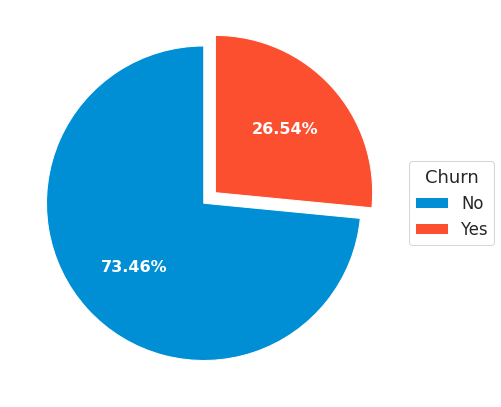

In [ ]:
pie_data = data['churn'].value_counts(normalize=True).values * 100
pie_label = data['churn'].value_counts(normalize=True).index

fig, ax = plt.subplots(figsize=(8,6))
wedges, texts, autotexts = ax.pie(pie_data,
                                  startangle=90, explode=[0, 0.1],
                                  autopct='%.2f%%', textprops={'color':'w', 'fontsize':16, 'weight':'bold'})

ax.legend(wedges, pie_label,
          title='Churn',
          loc='center left', bbox_to_anchor=(1, 0.5))


plt.tight_layout()
plt.show()

From this plot, we can see that most of the customers didn't churn. It means the target distribution is imbalanced.
<br><br>
Almost 75% of customers didn't churn. It's really not balanced. I will handle it later using oversampling method (such as SMOTE or ADASYN)

### For Presentation

#### Target Distribution

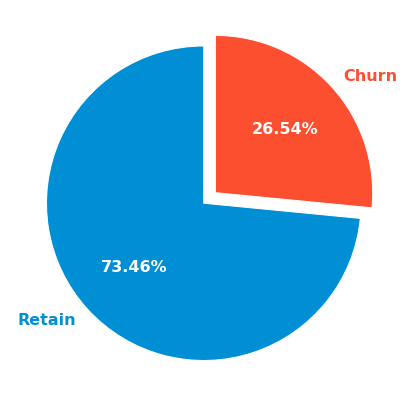

In [ ]:
pie_data = data['churn'].value_counts(normalize=True).values * 100
pie_label = data['churn'].value_counts(normalize=True).index.to_list()
for i, label in enumerate(pie_label):
  if pie_label[i] == 'No':
    pie_label[i] = 'Retain'
  else:
    pie_label[i] = 'Churn'

fig, ax = plt.subplots(figsize=(8,6))

# def func(pct, label):
#     return f'{round(pct,2)}%\n{label.pop(0)}'
# 
# wedges, texts, autotexts = ax.pie(pie_data,
#                                   startangle=90, explode=[0, 0.1],
#                                   autopct=lambda pct: func(pct, pie_label),
#                                   textprops={'color':'w', 'fontsize':16, 'weight':'bold'})

# wedges, texts, autotexts = ax.pie(pie_data, labels=pie_label,
#                                   startangle=90, explode=[0, 0.0],
#                                   autopct='%.2f%%',
#                                   textprops={'color':'w', 'fontsize':16, 'weight':'bold'},
#                                   wedgeprops={'linewidth':3, 'edgecolor':'w'})

wedges, texts, autotexts = ax.pie(pie_data, labels=pie_label,
                                  startangle=90, explode=[0, 0.1],
                                  autopct='%.2f%%',
                                  textprops={'color':'w', 'fontsize':16, 'weight':'bold'})

for i, wedge in enumerate(wedges):
  texts[i].set_color(wedge.get_facecolor())

plt.tight_layout()
plt.show()

#### Gender

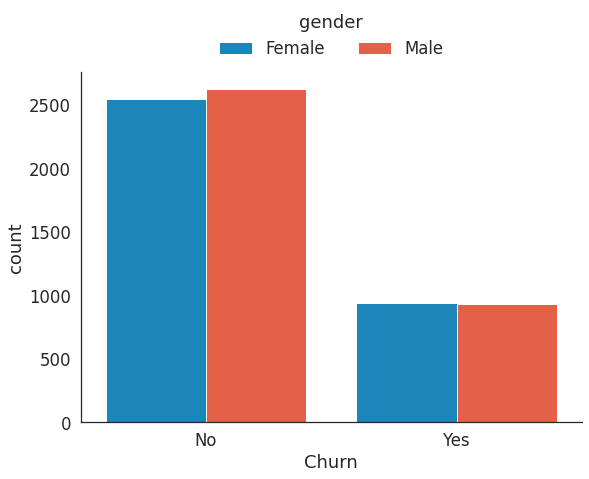

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

count_plot(data, x='churn', hue='gender', ax=ax)
ax.set_title('')
ax.legend(loc='lower center', bbox_to_anchor=(0.5,1), frameon=False, title='gender', ncol=2)
ax.set_xlabel('Churn')

plt.show()

#### Contract

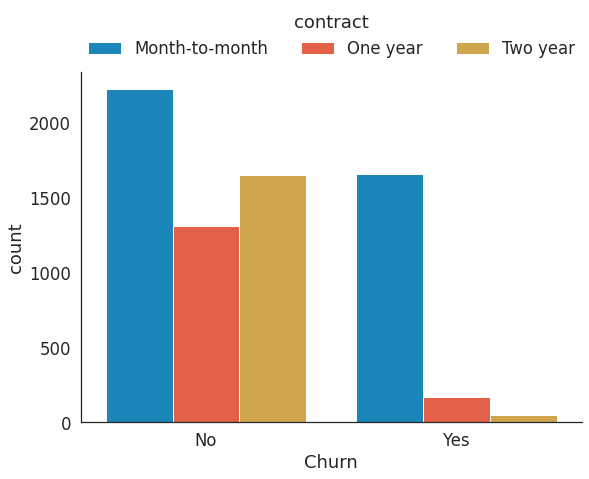

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

count_plot(data, x='churn', hue='contract', ax=ax)
ax.set_title('')
ax.legend(loc='lower center', bbox_to_anchor=(0.5,1), frameon=False, title='contract', ncol=3)
ax.set_xlabel('Churn')

plt.show()

#### Online Security

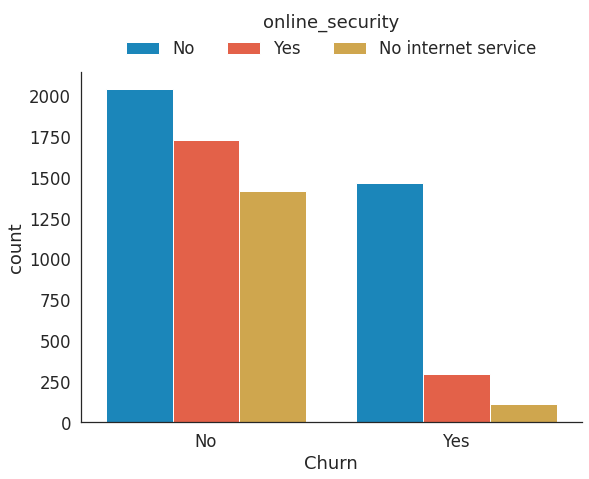

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

count_plot(data, x='churn', hue='online_security', ax=ax)
ax.set_title('')
ax.legend(loc='lower center', bbox_to_anchor=(0.5,1), frameon=False, title='online_security', ncol=3)
ax.set_xlabel('Churn')

plt.show()

#### Tech Support

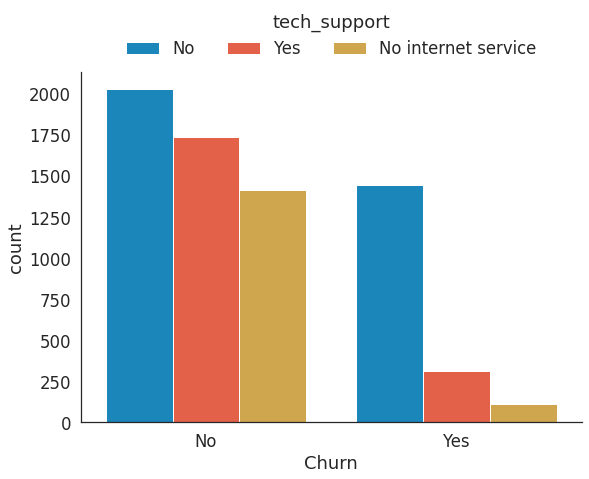

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

count_plot(data, x='churn', hue='tech_support', ax=ax)
ax.set_title('')
ax.legend(loc='lower center', bbox_to_anchor=(0.5,1), frameon=False, title='tech_support', ncol=3)
ax.set_xlabel('Churn')

plt.show()

#### Internet Service

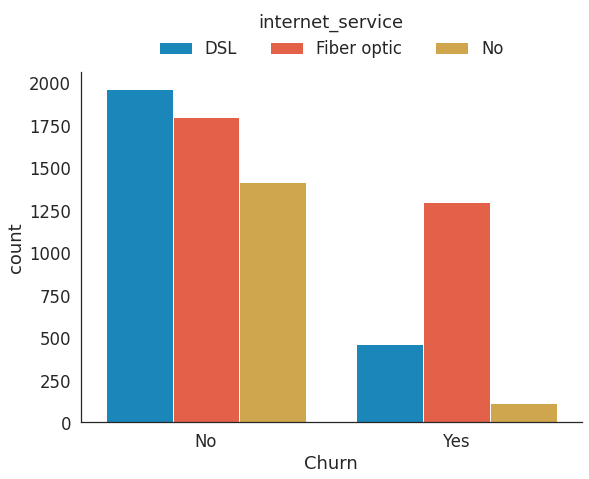

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

count_plot(data, x='churn', hue='internet_service', ax=ax)
ax.set_title('')
ax.legend(loc='lower center', bbox_to_anchor=(0.5,1), frameon=False, title='internet_service', ncol=3)
ax.set_xlabel('Churn')

plt.show()

#### Tenure

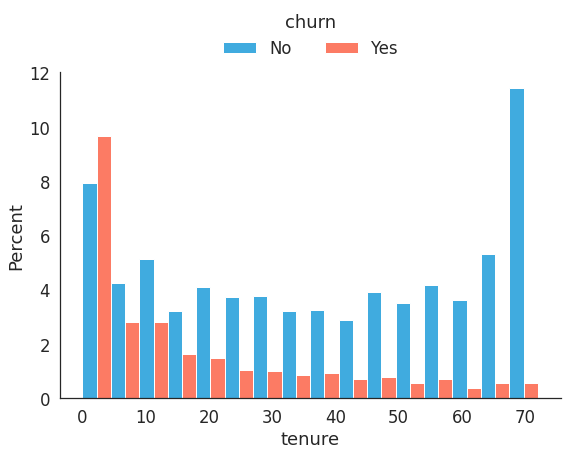

In [ ]:
with sns.axes_style('white'):
  fig, ax = plt.subplots(figsize=(8, 6))
  ax.grid(False, axis='x')
  sns.histplot(data=data, x='tenure', hue='churn', stat='percent', multiple='dodge', ax=ax)
  sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=2, title='churn', frameon=False)
  
  sns.despine()  
  plt.show()

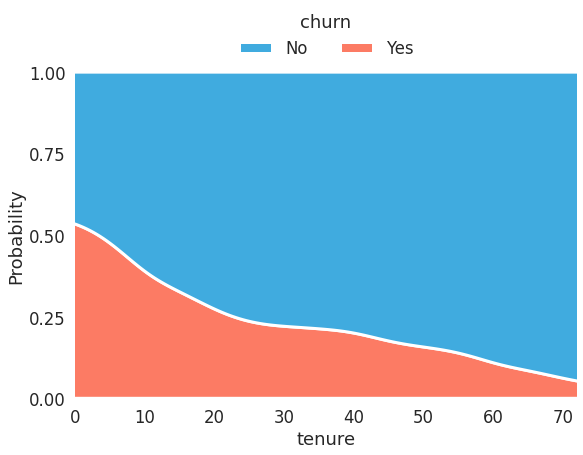

In [ ]:
with sns.axes_style('white'):
  fig, ax = plt.subplots(figsize=(8, 6))
  ax.grid(False, axis='x')
  sns.kdeplot(data=data, x='tenure', hue='churn', multiple='fill', linewidth=3, ax=ax)
  sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=2, title='churn', frameon=False)

  ax.set_xticks(np.arange(0,data['tenure'].max(),10))
  ax.set_xlim(data['tenure'].min(),data['tenure'].max())

  ax.set_yticks(np.linspace(0,1,5))
  ax.set_ylabel('Probability')

  sns.despine(left=True, bottom=True)

  # ax.axis('tight')
  plt.show()

#### Monthly Charges

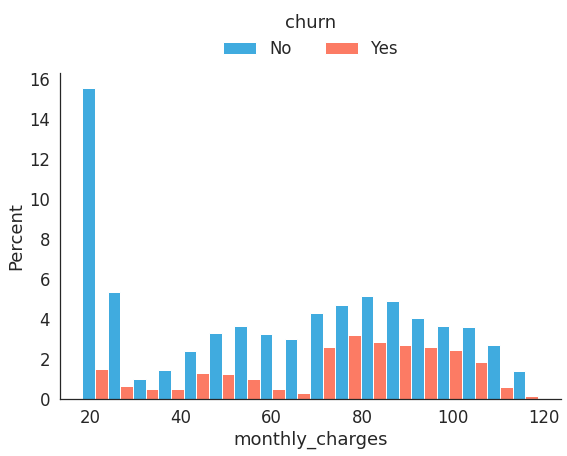

In [ ]:
with sns.axes_style('white'):
  fig, ax = plt.subplots(figsize=(8, 6))
  ax.grid(False, axis='x')
  sns.histplot(data=data, x='monthly_charges', hue='churn', stat='percent', multiple='dodge', ax=ax)
  sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=2, title='churn', frameon=False)
  
  sns.despine()  
  plt.show()

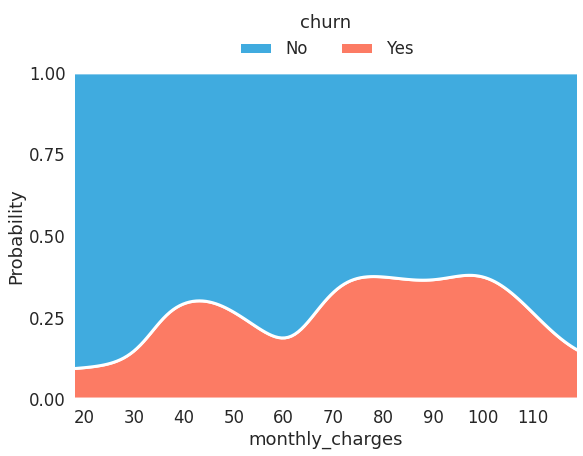

In [ ]:
with sns.axes_style('white'):
  fig, ax = plt.subplots(figsize=(8, 6))
  ax.grid(False, axis='x')
  sns.kdeplot(data=data, x='monthly_charges', hue='churn', multiple='fill', linewidth=3, ax=ax)
  sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=2, title='churn', frameon=False)
  
  ax.set_xticks(np.arange(0,data['monthly_charges'].max(),10))
  ax.set_xlim(data['monthly_charges'].min(),data['monthly_charges'].max())

  ax.set_yticks(np.linspace(0,1,5))
  ax.set_ylabel('Probability')

  sns.despine(left=True, bottom=True)
  plt.show()

#### Numerical Correlation

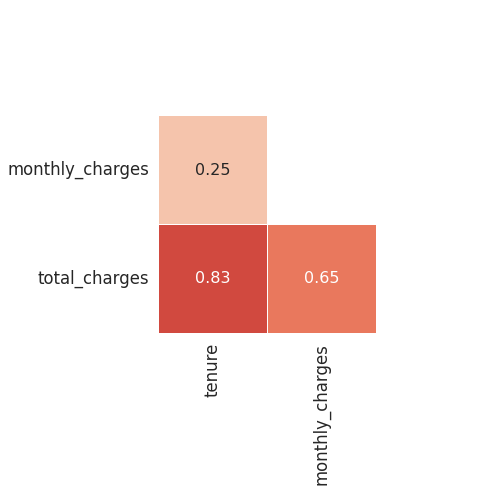

In [ ]:
with sns.axes_style('white'):
  fig, ax = plt.subplots(figsize=(8,6))
  corr_matrix = data[column_numerical].corr().round(2)

  label = corr_matrix['total_charges'].index.to_list()
  
  xlabel = label.copy()
  xlabel[-1] = ""

  ylabel = label.copy()
  ylabel[0] = ""

  mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

  sns.heatmap(corr_matrix, center=0, vmin=-1, vmax=1, mask=mask, cbar=False,
              xticklabels=xlabel, yticklabels=ylabel,
              annot=True, square=True, linewidth=1, cmap='coolwarm',
              annot_kws={'fontsize':16}, ax=ax)

  plt.setp(ax.get_xticklabels(), rotation=90)

  plt.show()

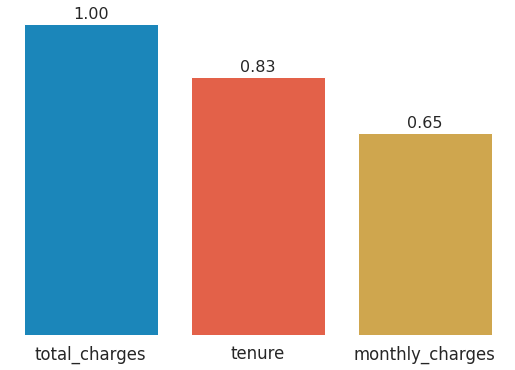

In [ ]:
corr_matrix = data[column_numerical].corr().round(2)

corr_target = corr_matrix['total_charges'].sort_values(ascending=False)

with sns.axes_style('white'):
  fig, ax = plt.subplots(figsize=(8,6))

  sns.barplot(y=corr_target.values, x=corr_target.index, ax=ax)

  ax.grid(False, axis='y')
  # ax.set_title('Attribute correlation to total charges')

  ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=16, fontweight='medium')

  # ax.axis('tight')
  ax.set_yticklabels([])
  sns.despine(left=True, bottom=True)
  plt.show()

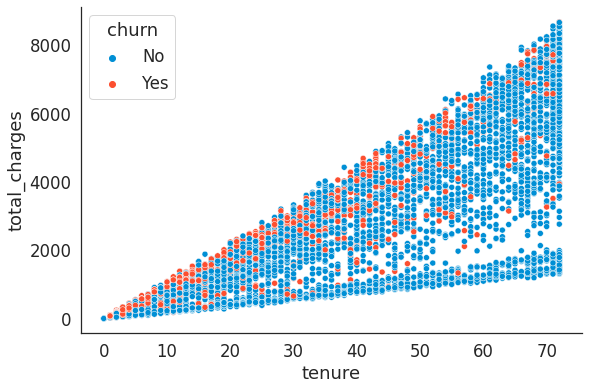

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

sns.scatterplot(data=data, x='tenure', y='total_charges', hue='churn', ax=ax)

sns.despine()
plt.show()

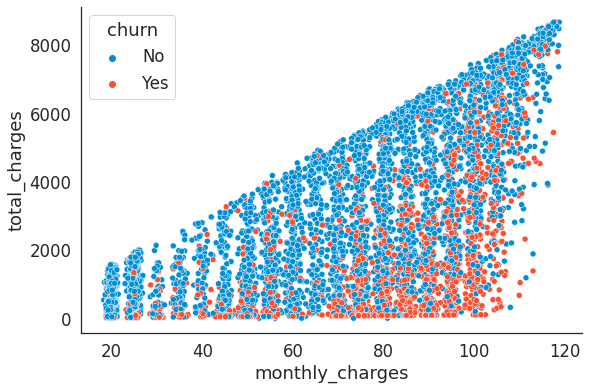

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

sns.scatterplot(data=data, x='monthly_charges', y='total_charges', hue='churn', ax=ax)

sns.despine()
plt.show()

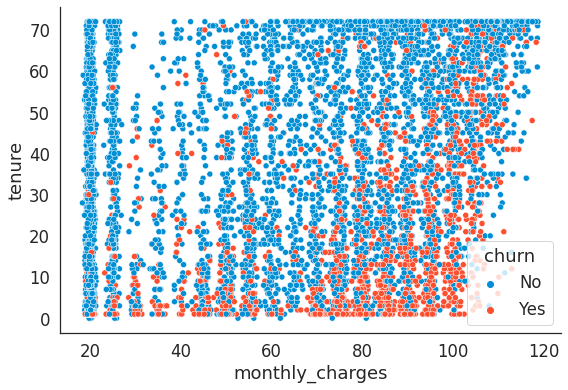

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

sns.scatterplot(data=data, x='monthly_charges', y='tenure', hue='churn', ax=ax)

sns.despine()
plt.show()

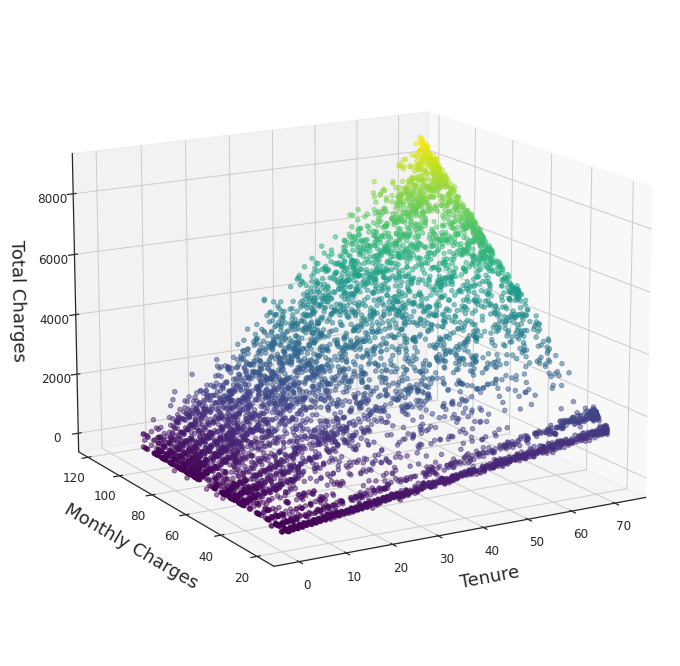

In [ ]:
fig = plt.figure(figsize=(16,12), facecolor='w')
ax = fig.add_subplot(projection='3d')

data_x = data['tenure']
data_y = data['monthly_charges']
data_z = data['total_charges']

ax.scatter(data_x, data_y, data_z,
          c=data_z, cmap='viridis',
          marker='o', alpha=0.5)

ax.set_xlabel('Tenure', labelpad=15)
ax.set_ylabel('Monthly Charges', labelpad=15)
ax.set_zlabel('Total Charges', labelpad=15)

for i in ['x','y','z']:
  ax.tick_params(axis=i, pad=5, labelsize='large')

ax.view_init(elev=15, azim=-120)

plt.show()

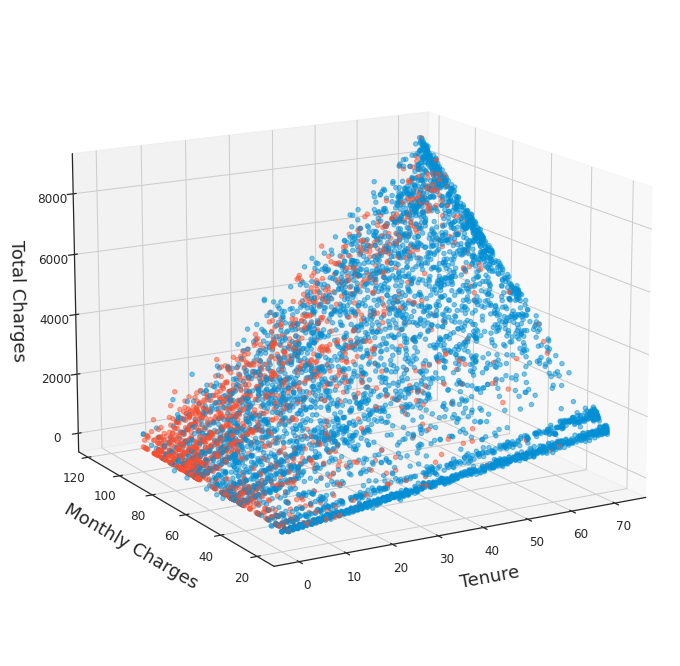

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data_dummy = data.copy()
data_dummy['colors'] = data_dummy['churn'].replace({'No': '#008FD5',
                                                    'Yes': '#FC4F30'})

fig = plt.figure(figsize=(16,12), facecolor='w')
ax = fig.add_subplot(projection='3d')

data_x = data_dummy['tenure']
data_y = data_dummy['monthly_charges']
data_z = data_dummy['total_charges']

color = data_dummy['colors']

ax.scatter(data_x, data_y, data_z,
          c=color, cmap='viridis',
          marker='o', alpha=0.5)

ax.set_xlabel('Tenure', labelpad=15)
ax.set_ylabel('Monthly Charges', labelpad=15)
ax.set_zlabel('Total Charges', labelpad=15)

for i in ['x','y','z']:
  ax.tick_params(axis=i, pad=5, labelsize='large')

ax.view_init(elev=15, azim=-120)
plt.show()

#### Categorical Correlation

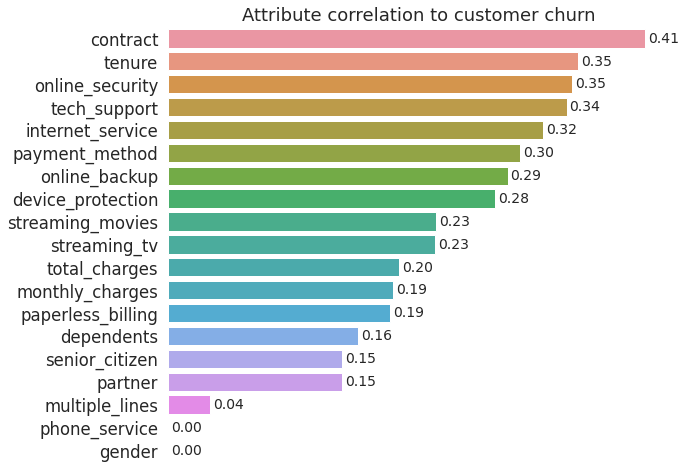

In [ ]:
# calculate the associations (correlation) between features
associations_out = associations(data,
                                nominal_columns=column_categorical,
                                numerical_columns=column_numerical,
                                nom_nom_assoc='cramer',
                                compute_only=True)

# the output is a dict {'ax', 'corr'}
corr_all = associations_out['corr']

corr_target = corr_all['churn'].drop('churn').sort_values(ascending=False)

with sns.axes_style('white'):
  fig, ax = plt.subplots(figsize=(8,8))

  sns.barplot(x=corr_target.values, y=corr_target.index, ax=ax)

  # ax.grid(False, axis='y')
  ax.set_title('Attribute correlation to customer churn')
  ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')

  # ax.axis('tight')
  ax.set_xticklabels([])
  sns.despine(left=True, bottom=True)
  plt.show()

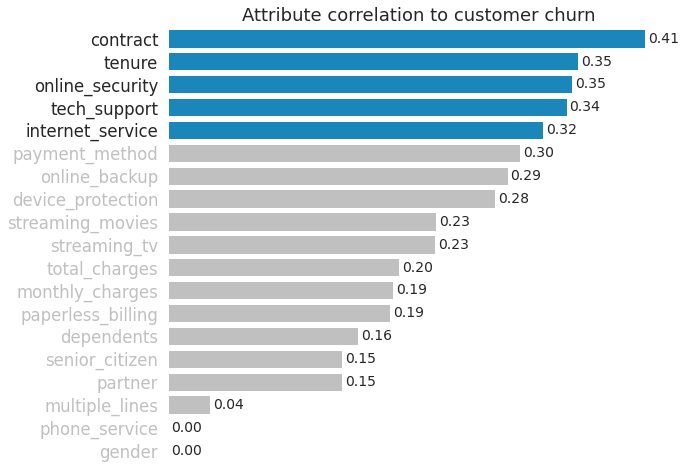

In [ ]:
# calculate the associations (correlation) between features
associations_out = associations(data,
                                nominal_columns=column_categorical,
                                numerical_columns=column_numerical,
                                nom_nom_assoc='cramer',
                                compute_only=True)

# the output is a dict {'ax', 'corr'}
corr_all = associations_out['corr']

corr_target = corr_all['churn'].drop('churn').sort_values(ascending=False)

# custom palette top 5
threshold = 5
palette = []
for i in range(0, len(corr_target)):
  if i < threshold:
    palette.append('#008FD5')
  else:
    palette.append('silver')

with sns.axes_style('white'):
  fig, ax = plt.subplots(figsize=(8,8))

  sns.barplot(x=corr_target.values, y=corr_target.index, ax=ax, palette=palette)

  ax.grid(False, axis='y')
  ax.set_title('Attribute correlation to customer churn')
  
  for i, label in enumerate(ax.yaxis.get_ticklabels()):
    if i >= threshold:
      label.set_color('silver')

  ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')

  ax.set_xticklabels([])
  sns.despine(left=True, bottom=True)
  plt.show()

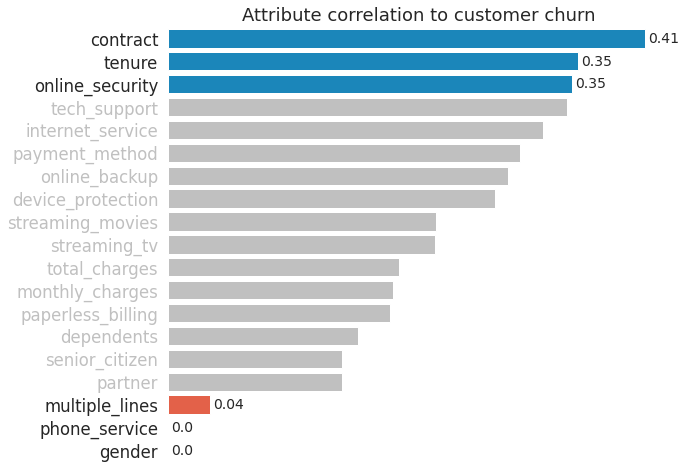

In [ ]:
# calculate the associations (correlation) between features
associations_out = associations(data,
                                nominal_columns=column_categorical,
                                numerical_columns=column_numerical,
                                nom_nom_assoc='cramer',
                                compute_only=True)

# the output is a dict {'ax', 'corr'}
corr_all = associations_out['corr']

corr_target = corr_all['churn'].drop('churn').sort_values(ascending=False)

# custom palette top 5
threshold_top = 3
threshold_bot = corr_target.size - 3 - 1
palette = []
for i in range(0, len(corr_target)):
  if i < threshold_top:
    palette.append('#008FD5') # blue
  elif i > threshold_bot:
    palette.append('#FC4F30') # red
  else:
    palette.append('silver')

with sns.axes_style('white'):
  fig, ax = plt.subplots(figsize=(8,8))

  sns.barplot(x=corr_target.values, y=corr_target.index, ax=ax, palette=palette)

  # ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')
  ax.grid(False, axis='y')
  ax.set_title('Attribute correlation to customer churn')
  
  # custom y label color
  for i, label in enumerate(ax.yaxis.get_ticklabels()):
    if (i >= threshold_top) and (i <= threshold_bot):
      label.set_color('silver')

  # custom bar label visibility
  for con in ax.containers:
    labels = [round(val,2) for val in con.datavalues]
    labels = [val if (val > 0.343) or (val < 0.05) else "" for val in labels]

    ax.bar_label(con, labels=labels, padding=3, fontsize=14, fontweight='medium')

  ax.set_xticklabels([])
  sns.despine(left=True, bottom=True)
  plt.show()

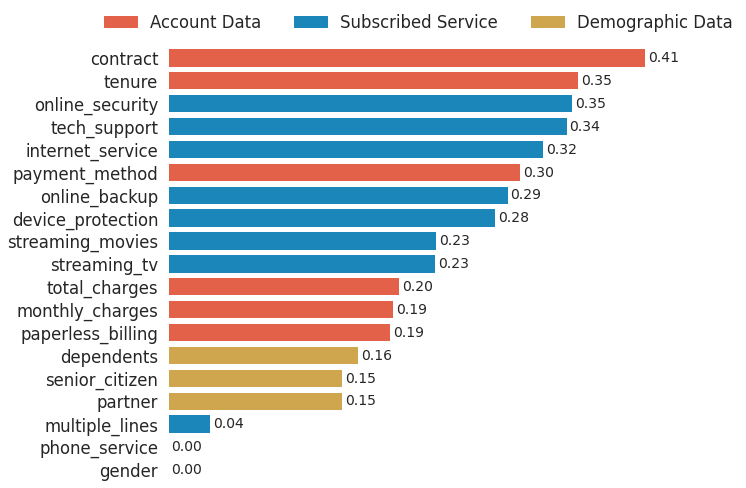

In [ ]:
column_demographic = ['gender','senior_citizen','partner','dependents']

column_account = ['contract','paperless_billing','payment_method',
                  'tenure', 'monthly_charges', 'total_charges']

column_service = ['phone_service', 'multiple_lines', 'internet_service', 
                  'online_security', 'online_backup', 'device_protection', 
                  'tech_support', 'streaming_tv', 'streaming_movies']

corr_target = corr_all['churn'].drop('churn').sort_values(ascending=False)
corr_target_index = corr_target.index.to_list()

palette = []
for index in corr_target_index:
  if index in column_demographic:
    palette.append('#E5AE38') # yellow
  elif index in column_account:
    palette.append('#FC4F30') # red
  elif index in column_service:
    palette.append('#008FD5') # blue
  else:
    palette.append('silver')

fig, ax = plt.subplots(figsize=(8,8))

sns.barplot(x=corr_target.values, y=corr_target.index, ax=ax, palette=palette)

# ax.grid(False, axis='y')
# ax.set_title('Attribute correlation to customer churn')

red_patch = mpatches.Patch(color='#E36149', label='Account Data')
blue_patch = mpatches.Patch(color='#1B86BA', label='Subscribed Service')
yellow_patch = mpatches.Patch(color='#CFA64E', label='Demographic Data')

ax.legend(handles=[red_patch, blue_patch, yellow_patch],
          loc='lower center', bbox_to_anchor=(0.5, 1), ncol=3, frameon=False)

ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')
# label = np.arange(1,len(corr_target)+1)
# label = [f'Rank {val}' for val in label]
# ax.bar_label(ax.containers[0], padding=3, labels=label,
#              label_type='edge', fontsize=14, fontweight='medium')

ax.set_xticklabels([])
sns.despine(left=True, bottom=True)
plt.show()

### Customer Demographic Data

#### Count

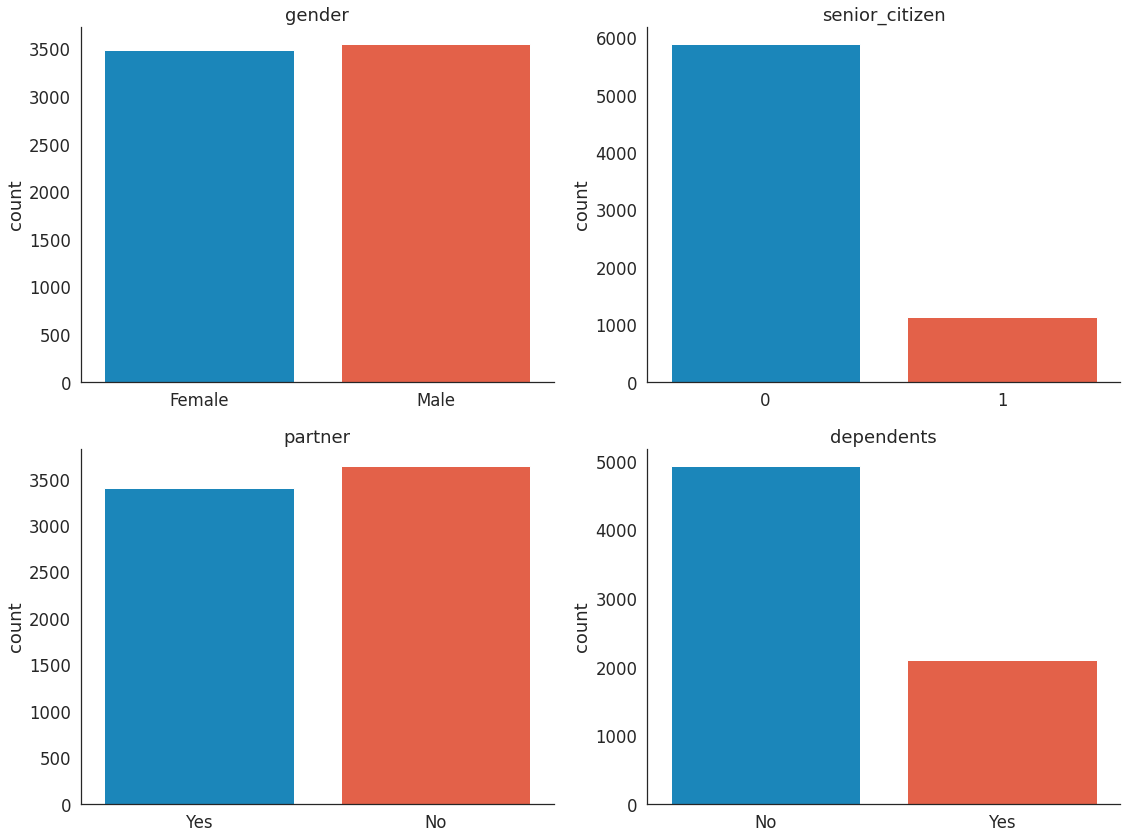

In [ ]:
column_demographic = ['gender','senior_citizen','partner','dependents']

fig, ax = plt.subplots(2, 2, figsize=(16,12))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_demographic):
  count_plot(data, col, axes_list[i])

plt.tight_layout()
plt.show()

From this plot, we can see that
- The total female and male customers are almost the same
- Most customer is not senior citizen
- The distribution of the `partner` attribute is almost the same
- Most customer doesn't have dependents

#### Count by Churn

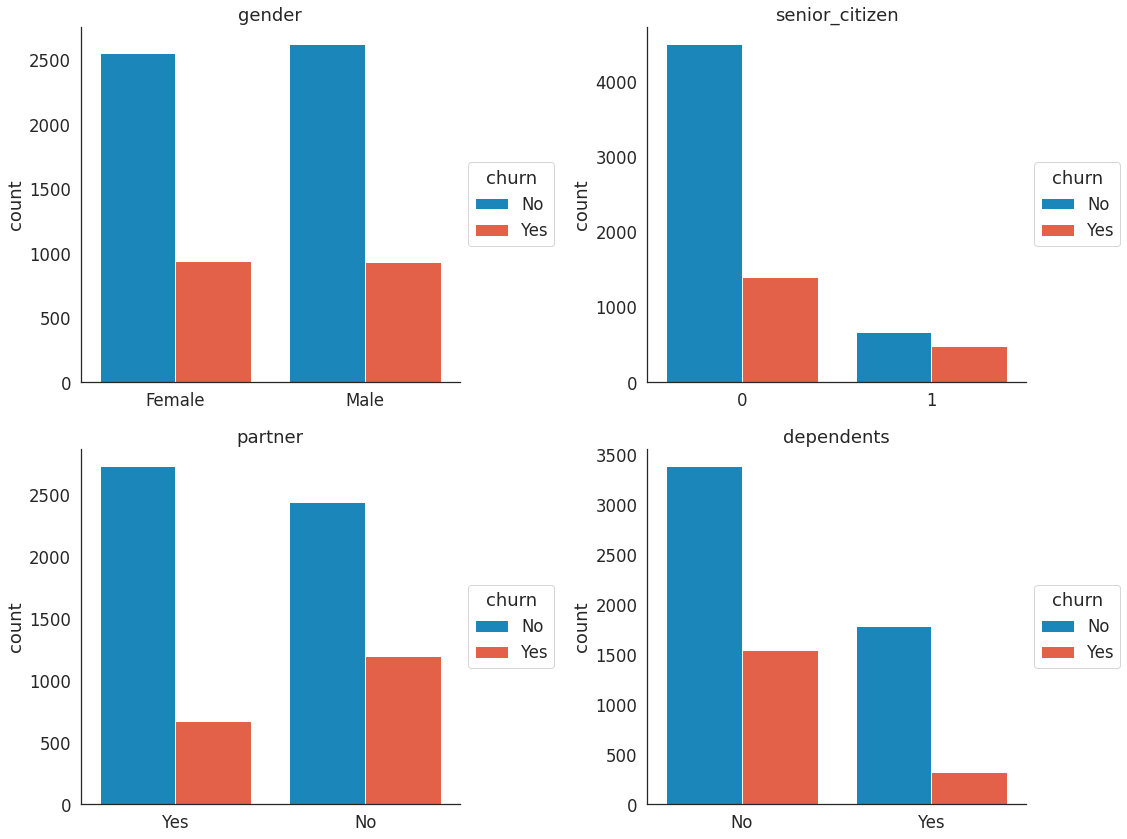

In [ ]:
column_demographic = ['gender','senior_citizen','partner','dependents']

fig, ax = plt.subplots(2, 2, figsize=(16,12))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_demographic):
  count_plot(data, col, axes_list[i], hue='churn')

plt.tight_layout()
plt.show()

From this plot, we can see that
- The ratio of male-female customers is almost the same on both churns and not churn. Therefore, I assume that gender does not affect whether a customer will churn or not.
- Since the distribution is not balanced, we can't really see the impact of the `senior_citizen` attribute. On the next chart, I will show the proportion using stacked bar chart.
- Since the distribution of the `partner` attribute is almost the same, from this plot, I can say that the customer who has no partner has a higher probability to churn than the customer who has partner.

#### Probability Mass Function

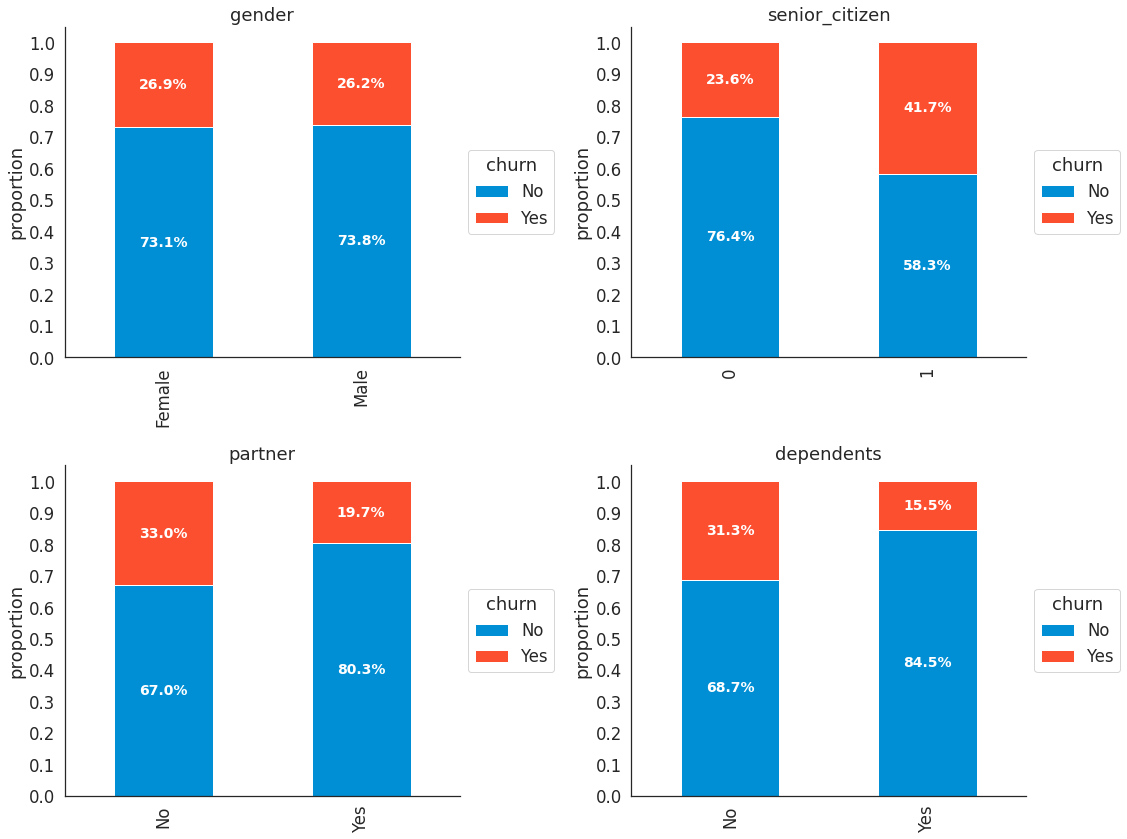

In [ ]:
column_demographic = ['gender','senior_citizen','partner','dependents']

fig, ax = plt.subplots(2, 2, figsize=(16,12))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_demographic):
  stacked_bar_plot(data, col, 'churn', axes_list[i])

plt.tight_layout()
plt.show()

From this plot, we can say that
- The gender of the customer has the same probability of quitting or staying
- The customer who is not a senior citizen is most likely not going to churn (the probability is only about 24%). On the other side, the customer who is a senior citizen has more than 40% probability to churn.
- The customer who has no partner has more than 30% chance to churn.

### Customer Account Data

#### Count

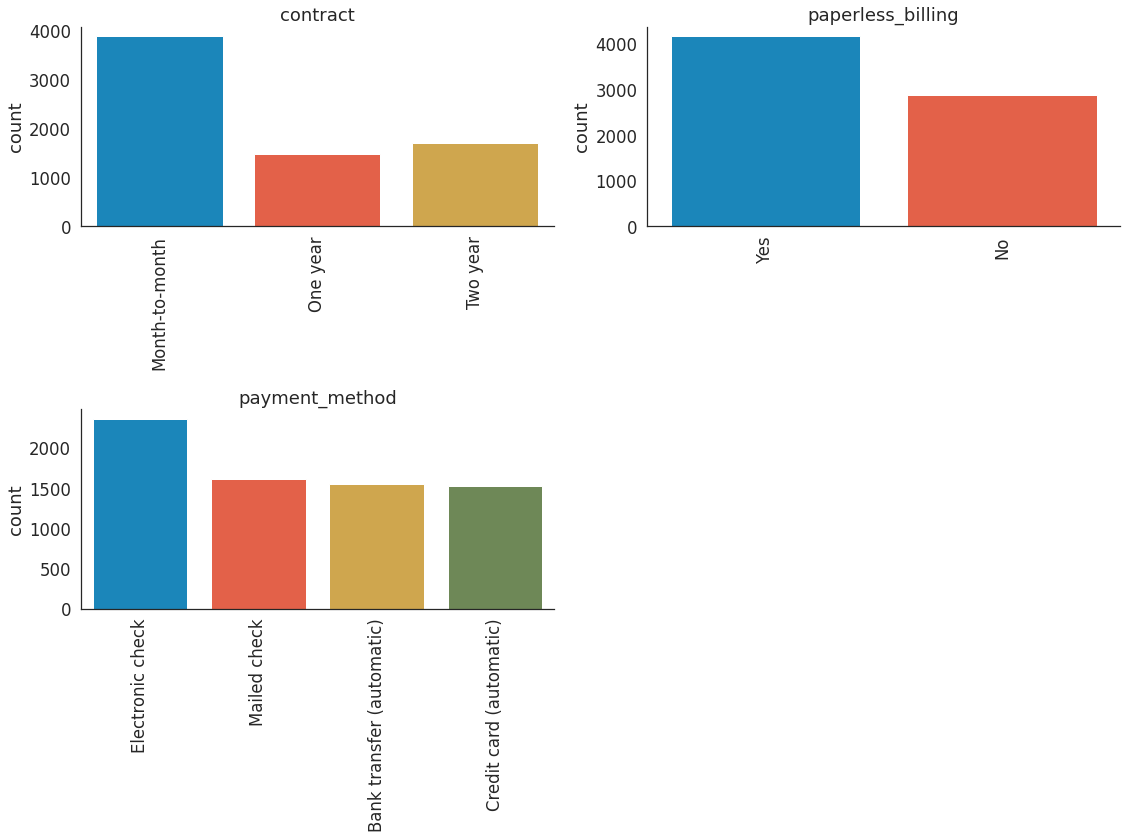

In [ ]:
column_account = ['contract','paperless_billing','payment_method']

fig, ax = plt.subplots(2, 2, figsize=(16,12))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_account):
  count_plot(data, col, axes_list[i])
  plt.setp(axes_list[i].get_xticklabels(), rotation=90)

axes_list[-1].set_visible(False)
plt.tight_layout()
plt.show()

#### Count by Churn

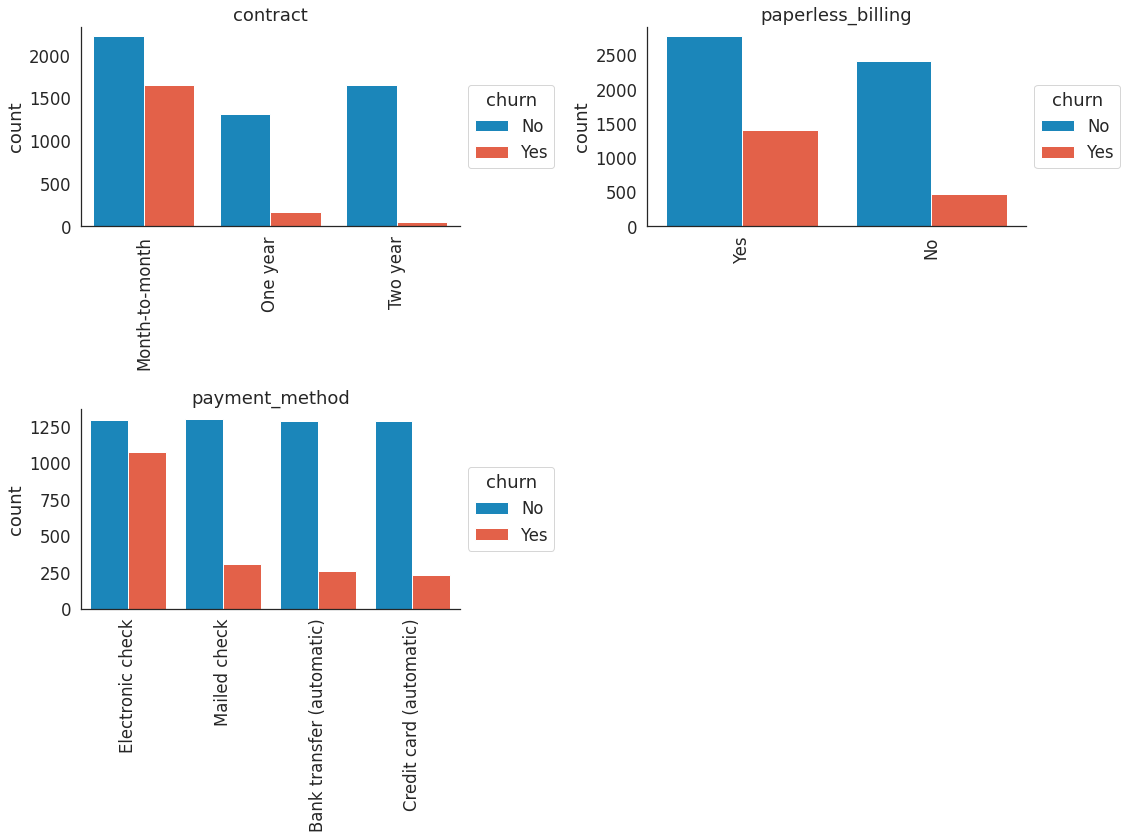

In [ ]:
column_account = ['contract','paperless_billing','payment_method']

fig, ax = plt.subplots(2, 2, figsize=(16,12))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_account):
  count_plot(data, col, axes_list[i], hue='churn')
  plt.setp(axes_list[i].get_xticklabels(), rotation=90)

axes_list[-1].set_visible(False)
plt.tight_layout()
plt.show()

#### Probability Mass Function

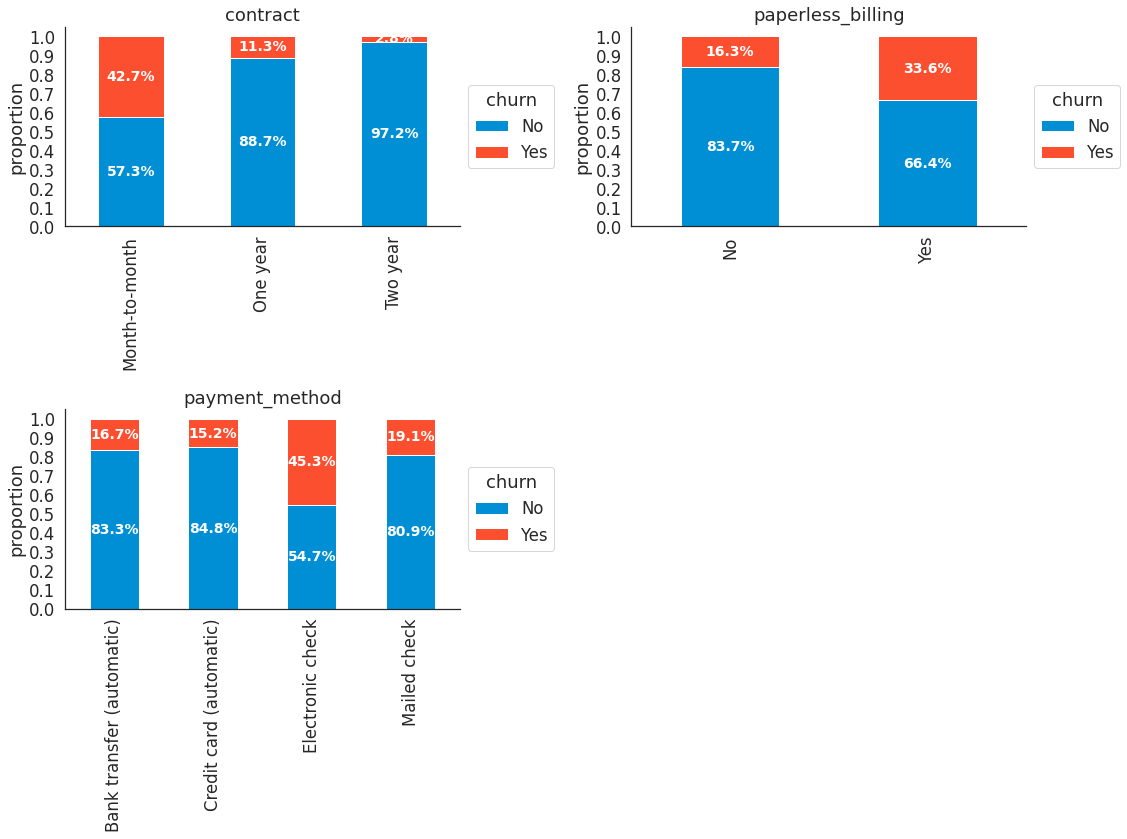

In [ ]:
column_account = ['contract','paperless_billing','payment_method']

fig, ax = plt.subplots(2, 2, figsize=(16,12))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_account):
    stacked_bar_plot(data, col, 'churn', axes_list[i])

axes_list[-1].set_visible(False)
plt.tight_layout()
plt.show()

### Subscribed Service Data

#### Count

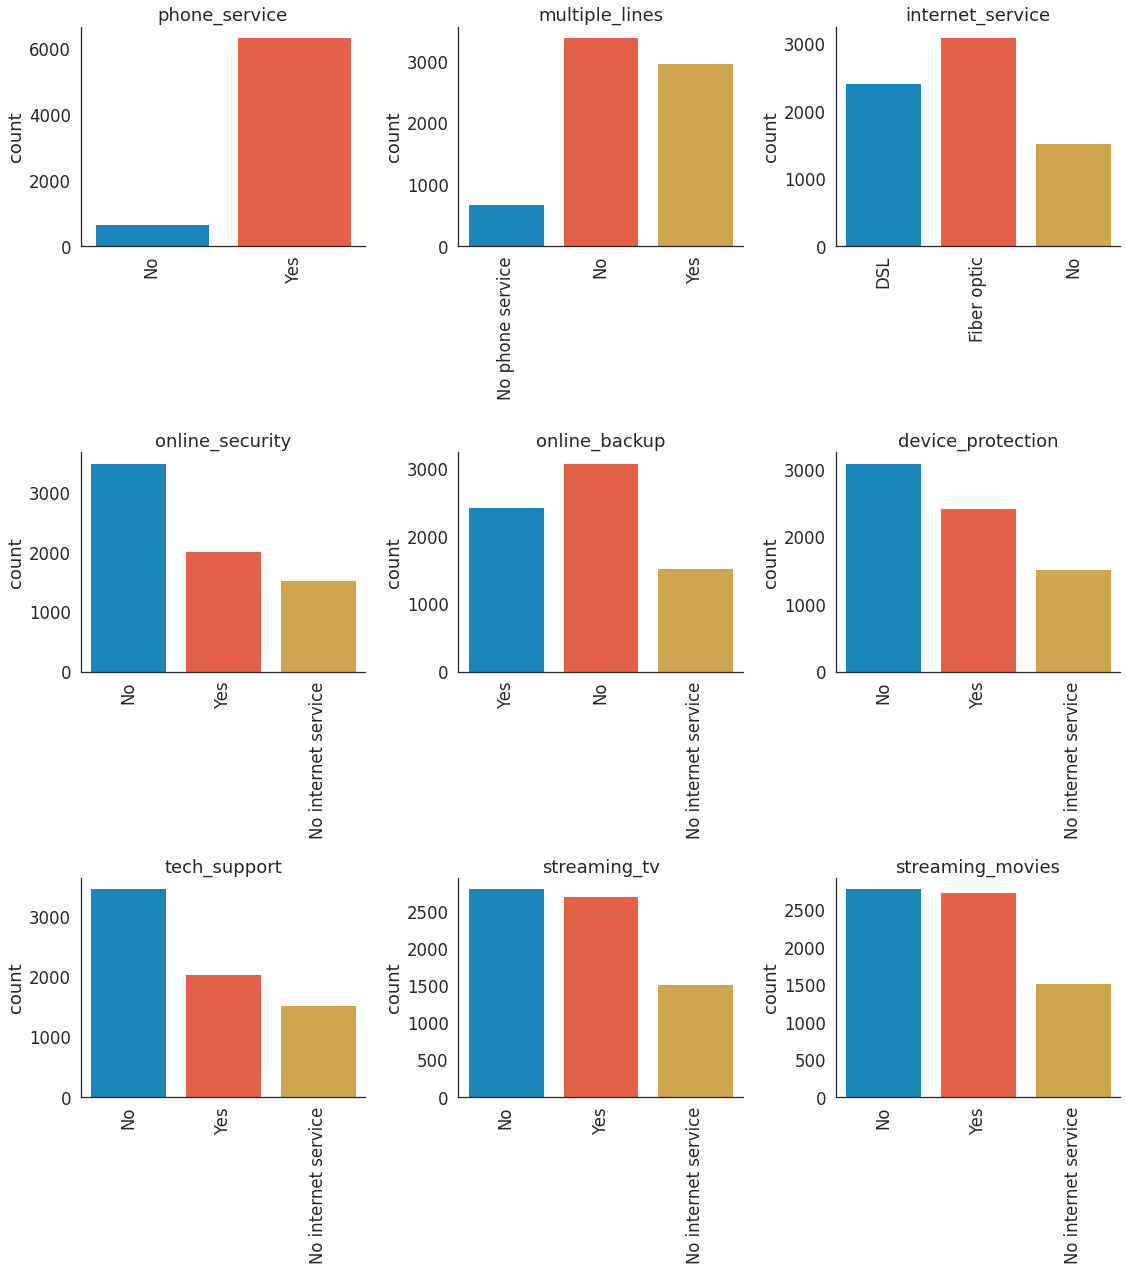

In [ ]:
column_service = ['phone_service', 'multiple_lines', 'internet_service', 
                  'online_security', 'online_backup', 'device_protection', 
                  'tech_support', 'streaming_tv', 'streaming_movies']

fig, ax = plt.subplots(3, 3, figsize=(16,18))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_service):
  count_plot(data, col, axes_list[i])
  plt.setp(axes_list[i].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

#### Count by Churn

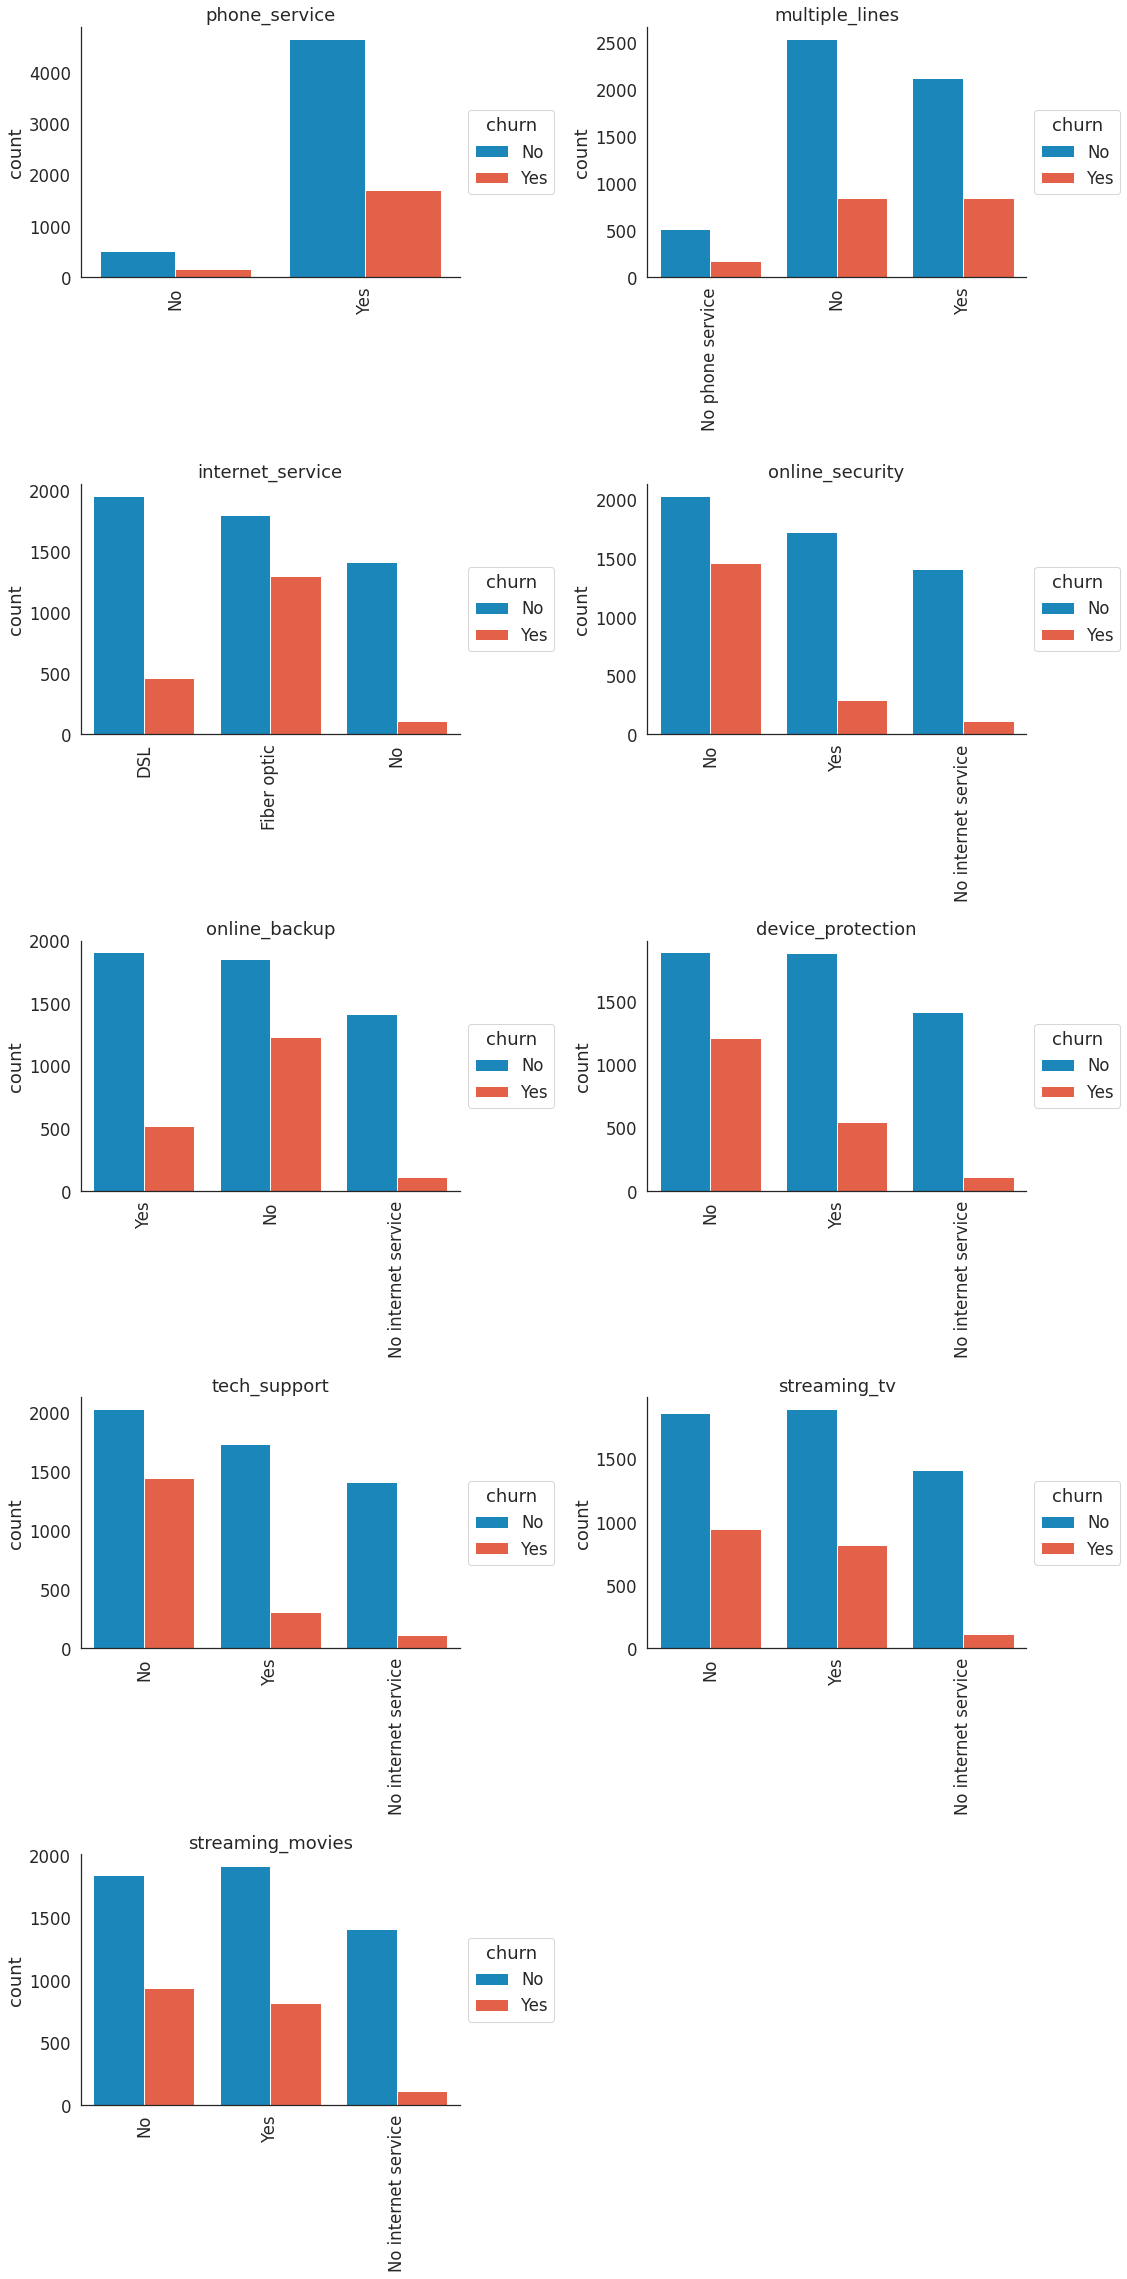

In [ ]:
column_service = ['phone_service', 'multiple_lines', 'internet_service', 
                  'online_security', 'online_backup', 'device_protection', 
                  'tech_support', 'streaming_tv', 'streaming_movies']

fig, ax = plt.subplots(5, 2, figsize=(16,32))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_service):
  count_plot(data, col, axes_list[i], hue='churn')
  plt.setp(axes_list[i].get_xticklabels(), rotation=90)

axes_list[-1].set_visible(False)
plt.tight_layout()
plt.show()

#### Probability Mass Function

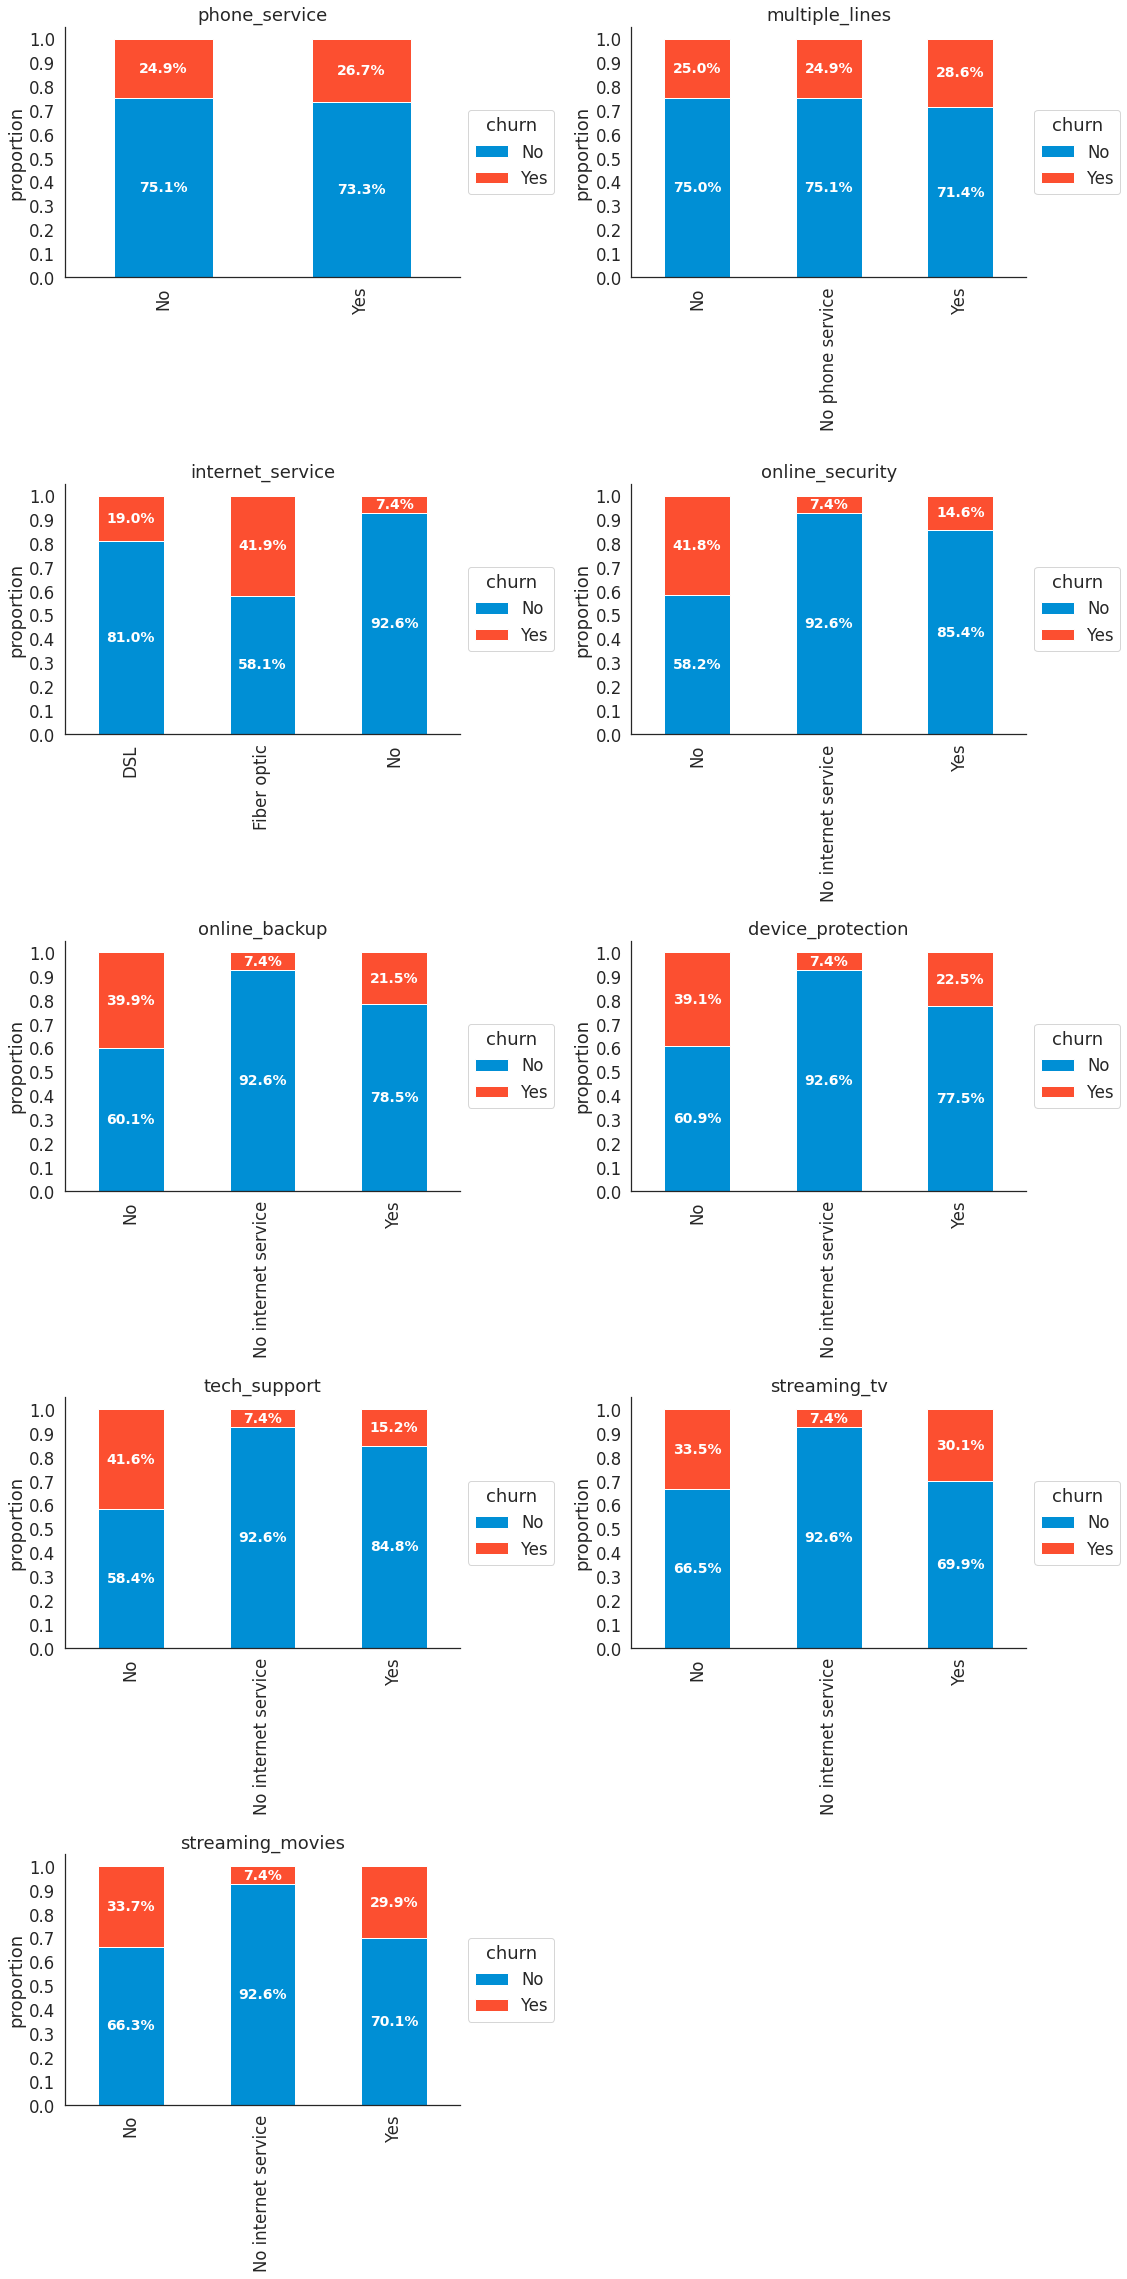

In [ ]:
column_service = ['phone_service', 'multiple_lines', 'internet_service', 
                  'online_security', 'online_backup', 'device_protection', 
                  'tech_support', 'streaming_tv', 'streaming_movies']

fig, ax = plt.subplots(5, 2, figsize=(16,32))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_service):
  stacked_bar_plot(data, col, 'churn', axes_list[i])

axes_list[-1].set_visible(False)
plt.tight_layout()
plt.show()

## Numerical Data Distribution

### Histogram

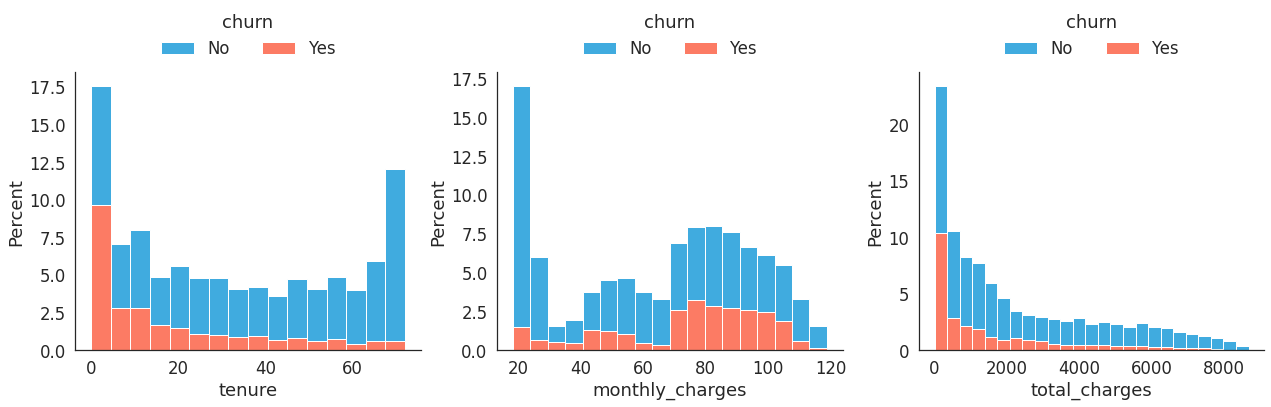

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

for i, col in enumerate(column_numerical):
  sns.histplot(data=data, x=col, hue='churn', stat='percent', multiple='stack', ax=ax[i])
  sns.move_legend(ax[i], "lower center", bbox_to_anchor=(.5, 1), ncol=2, title='churn', frameon=False)
  sns.despine()

plt.tight_layout()
plt.show()

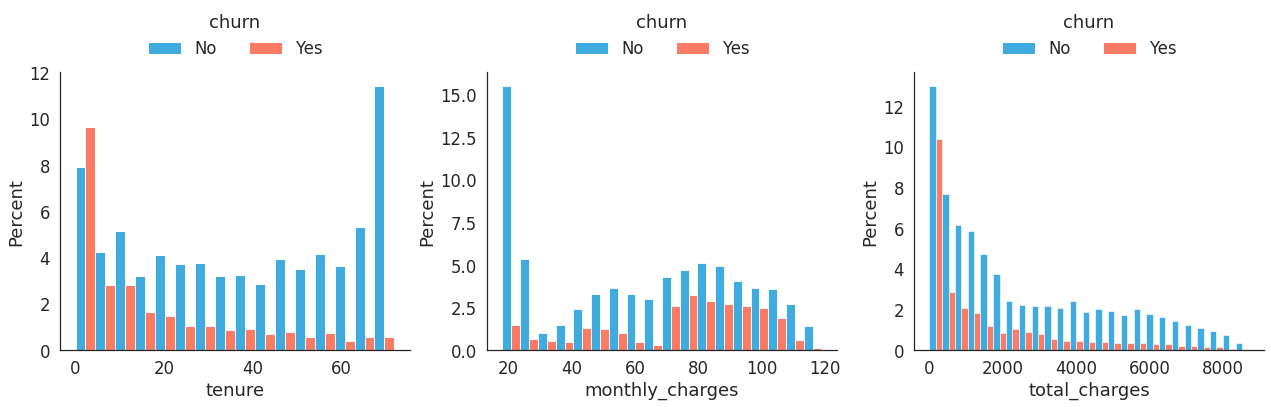

In [ ]:
numerical_column = ['tenure', 'monthly_charges', 'total_charges']

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

for i, col in enumerate(numerical_column):
  sns.histplot(data=data, x=col, hue='churn', stat='percent', multiple='dodge', ax=ax[i])
  sns.move_legend(ax[i], "lower center", bbox_to_anchor=(.5, 1), ncol=2, title='churn', frameon=False)
  sns.despine()
  
plt.tight_layout()
plt.show()

### Box Plot

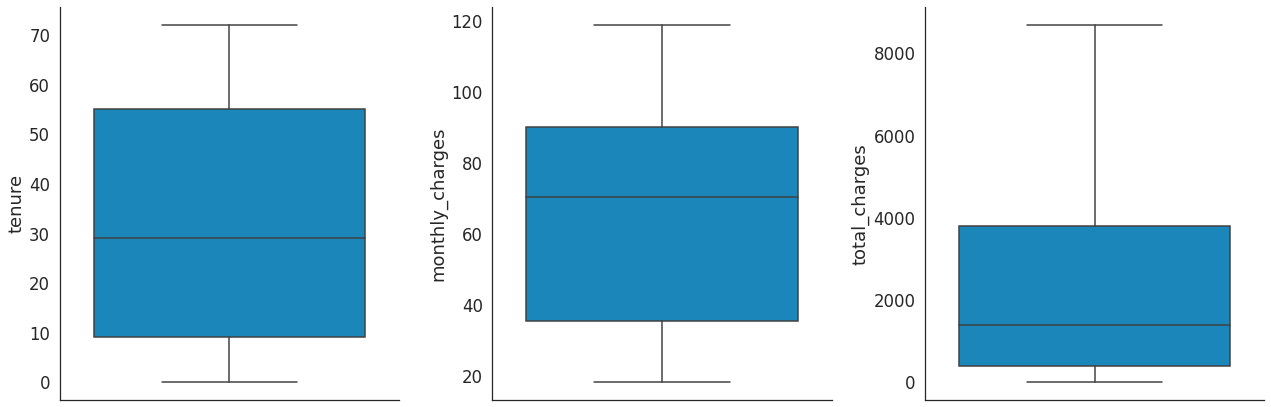

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

for i, col in enumerate(column_numerical):
  sns.boxplot(data=data, y=col, ax=ax[i])
  sns.despine()

plt.tight_layout()
plt.show()

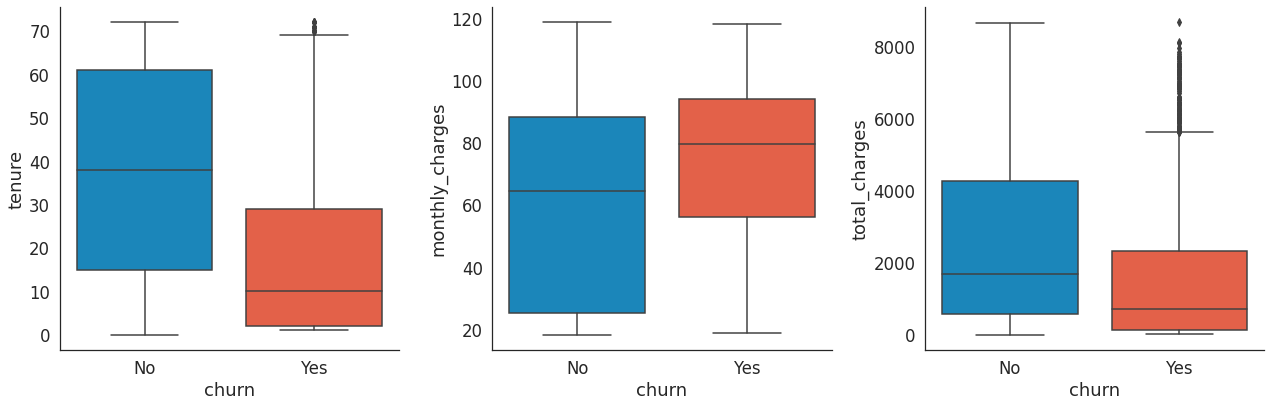

In [ ]:
numerical_column = ['tenure', 'monthly_charges', 'total_charges']

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

for i, col in enumerate(numerical_column):
  sns.boxplot(data=data, x='churn', y=col, ax=ax[i])
  sns.despine()

plt.tight_layout()
plt.show()

### Violin Plot

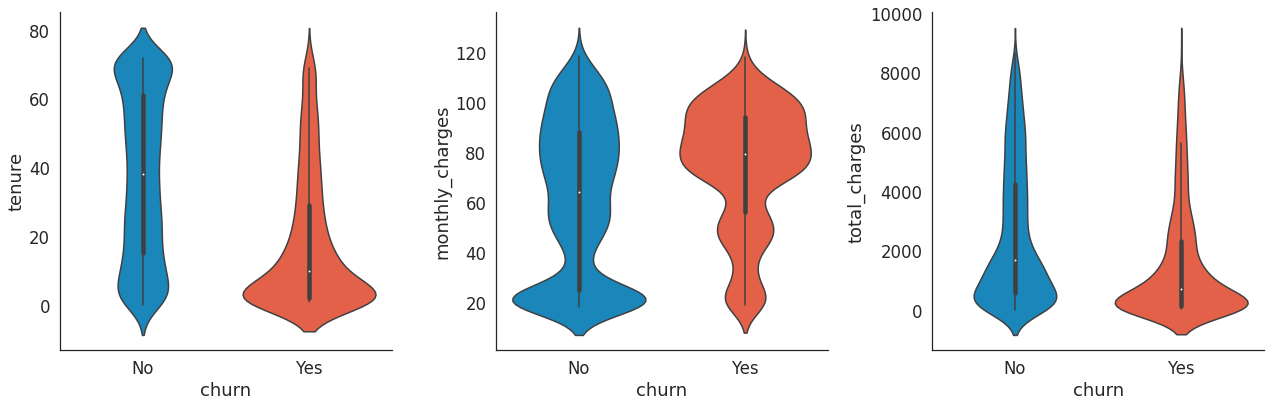

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

for i, col in enumerate(column_numerical):
  sns.violinplot(data=data, x='churn', y=col, ax=ax[i])
  sns.despine()

plt.tight_layout()
plt.show()

### Numerical Correlation

In [ ]:
corr_matrix = data[column_numerical].corr().round(2)
corr_matrix.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

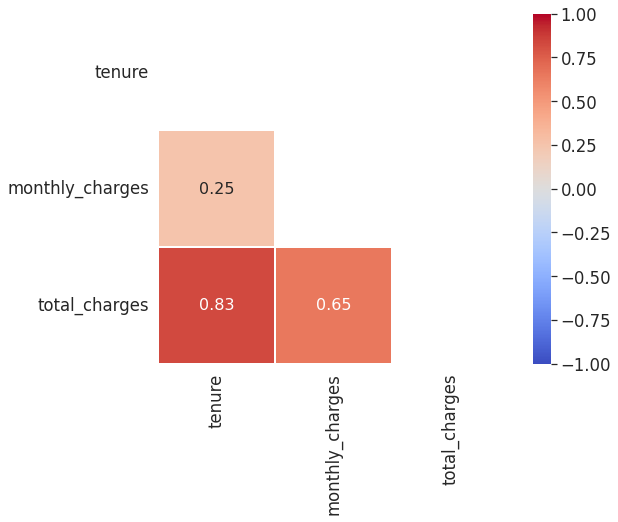

In [ ]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(8,6))

sns.heatmap(corr_matrix, center=0, vmin=-1, vmax=1, mask=mask,
            annot=True, square=True, linewidth=1, cmap='coolwarm',
            annot_kws={'fontsize':16}, ax=ax)

plt.show()

#### Using Different Method

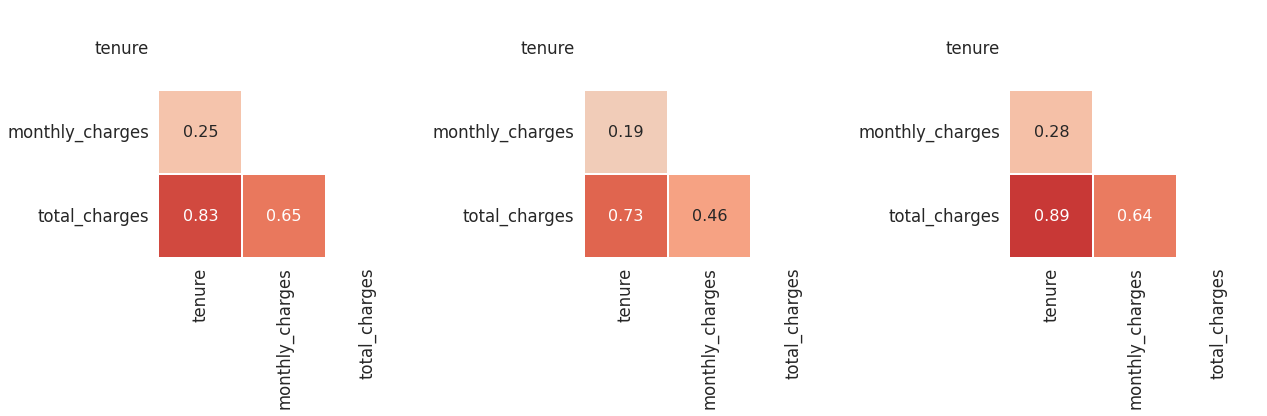

In [ ]:
corr_method = ['pearson','kendall','spearman']

fig, ax = plt.subplots(1,3, figsize=(18,6))

for i, method in enumerate(corr_method):
  corr_matrix = data[column_numerical].corr(method=method).round(2)

  mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

  sns.heatmap(corr_matrix, center=0, vmin=-1, vmax=1, mask=mask, cbar=False,
              annot=True, square=True, linewidth=1, cmap='coolwarm',
              annot_kws={'fontsize':16}, ax=ax[i])

plt.tight_layout()
plt.show()

### Categorical Correlation

Shaked Zychlinski had made a clear explanation about the correlation between categorical features. You can read it on his [Medium](https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9). He also writes his own library, you can find it on his [GitHub](https://github.com/shakedzy/dython). The documentation can be found [here](http://shakedzy.xyz/dython/).
<br><br>
In human language, this associations function is used to calculate the correlation between attributes using some scenarios:
- Numerical & numerical attributes (`num_num_assoc`), used to calculate numerical-numerical association using:
  - Pearson's R (`pearson`)
  - Spearman's R (`spearman`)
  - Kendall's Tau (`kendall`)
- Nominal & nominal attributes (`nom_nom_assoc`), used to calculate nominal-nominal association using:
  - Cramer's V (`cramer`)
  - Theil 's U (`theil`)
- Nominal & numerical attributes (`nom_num_assoc`), used to calculate nominal-numerical association using:
  - Correlation ratio (`correlation_ratio`)
<br><br>

I won't deep down the detailed explanation, you can read it on his Medium or package documentation.

#### Cramer's V

In [ ]:
# calculate the associations (correlation) between features
associations_out = associations(data,
                                nominal_columns=column_categorical,
                                numerical_columns=column_numerical,
                                nom_nom_assoc='cramer',
                                compute_only=True)
# the output is a dict {'ax', 'corr'}
corr_all = associations_out['corr']

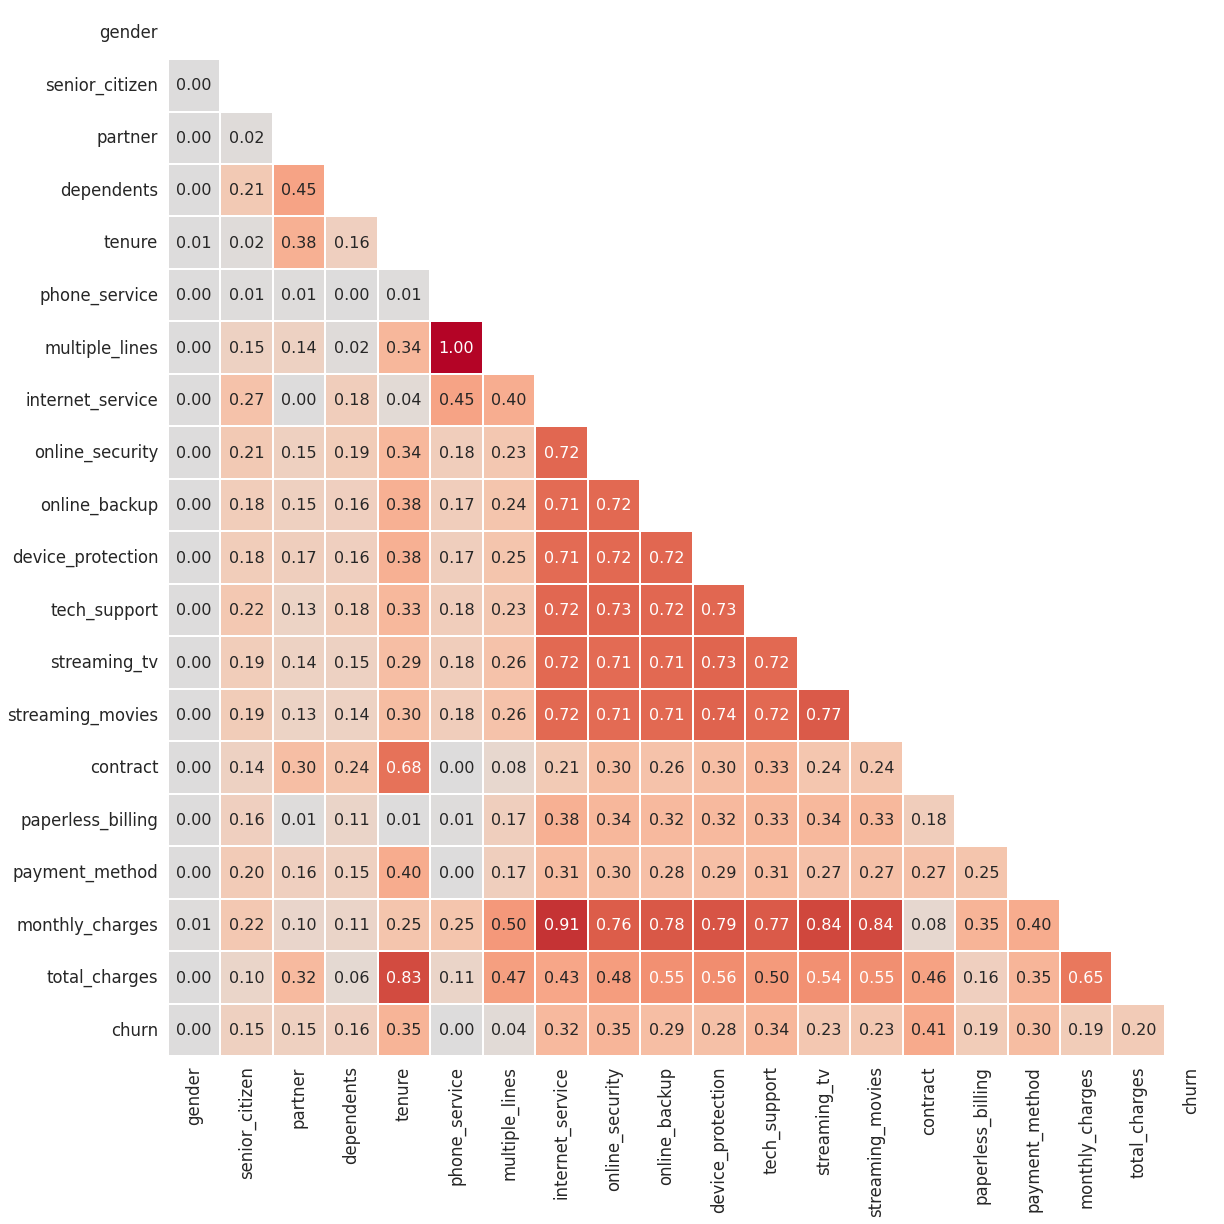

In [ ]:
mask = np.triu(np.ones_like(corr_all, dtype=bool))

fig, ax = plt.subplots(figsize=(18,18))

sns.heatmap(corr_all, center=0, vmin=-1, vmax=1, mask=mask, cbar=False,
            annot=True, square=True, linewidth=1, cmap='coolwarm', fmt='.2f',
            annot_kws={'fontsize':16}, ax=ax)

plt.show()

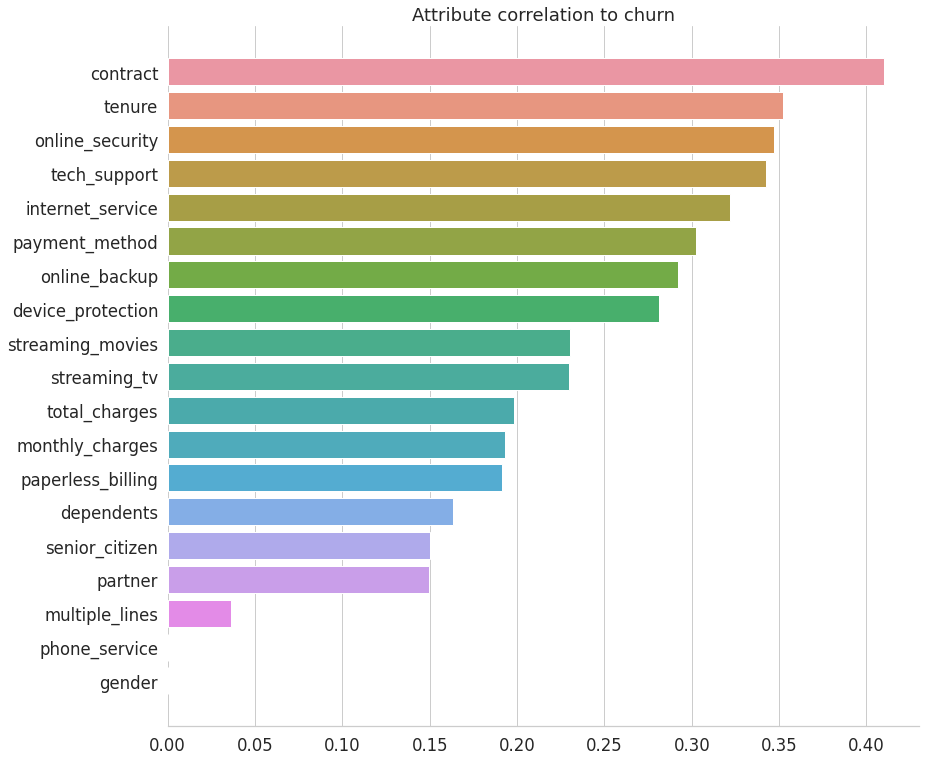

In [ ]:
corr_target = corr_all['churn'].drop('churn').sort_values(ascending=False)

with sns.axes_style('whitegrid'):
  fig, ax = plt.subplots(figsize=(12,12))

  sns.barplot(x=corr_target.values, y=corr_target.index, ax=ax)

  ax.grid(False, axis='y')
  ax.set_title('Attribute correlation to churn')

  ax.axis('tight')
  sns.despine(left=True)
  plt.show()

#### Theil's U

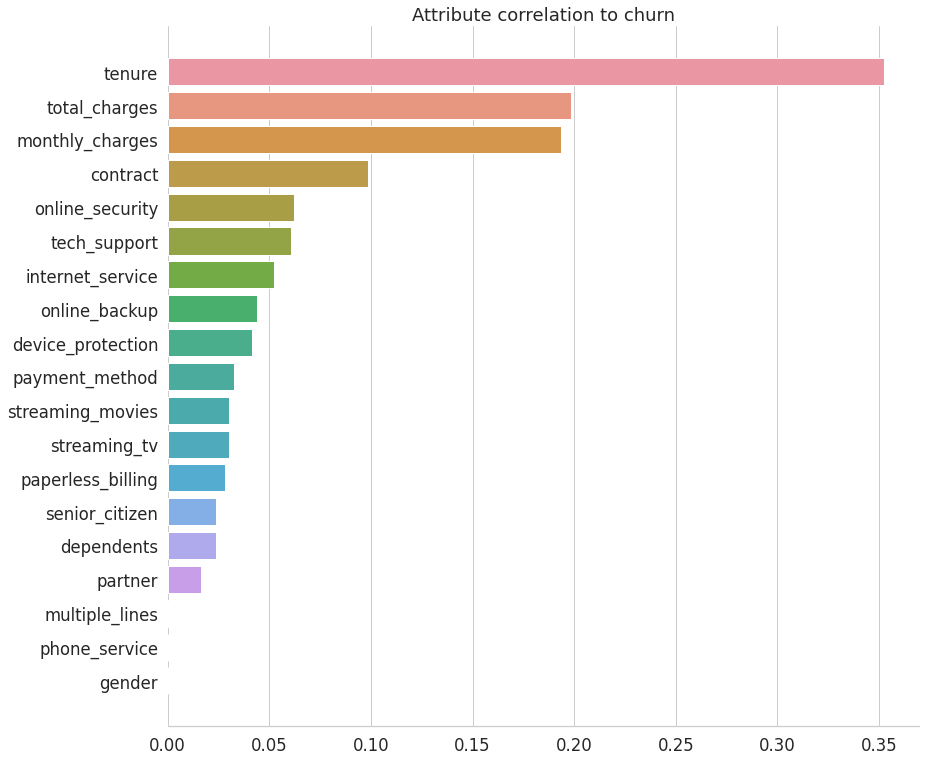

In [ ]:
# calculate the associations (correlation) between features
associations_out = associations(data,
                                nominal_columns=column_categorical,
                                numerical_columns=column_numerical,
                                nom_nom_assoc='theil',
                                compute_only=True)
# the output is a dict {'ax', 'corr'}
corr_all = associations_out['corr']

corr_target = corr_all['churn'].drop('churn').sort_values(ascending=False)

with sns.axes_style('whitegrid'):
  fig, ax = plt.subplots(figsize=(12,12))

  sns.barplot(x=corr_target.values, y=corr_target.index, ax=ax)

  ax.grid(False, axis='y')
  ax.set_title('Attribute correlation to churn')

  ax.axis('tight')
  sns.despine(left=True)
  plt.show()

# 6. Data Preprocessing

In [5]:
# numerical
column_numerical = ['tenure', 'monthly_charges', 'total_charges']

# categorical
column_categorical = list(data.columns)
column_categorical.remove('tenure')
column_categorical.remove('monthly_charges')
column_categorical.remove('total_charges')

# only contains input features
column_categorical.remove('churn')

## Train - Test Split

In [6]:
data_X = data.drop('churn', axis=1)
data_y = data['churn']

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3, random_state=1, stratify=data_y)

## Label Encoding
I use it for the target (label) variable.

In [7]:
le = LabelEncoder()

le.fit(y_train)

y_train_encode = le.transform(y_train)
y_test_encode = le.transform(y_test)

In [ ]:
le.classes_

array(['No', 'Yes'], dtype=object)

From this output, we can say that retaining customers (`churn = No`) will be encoded as `0`, and churned customers (`churn = Yes`) will be encoded as `1`.

In [ ]:
print(y_train[:5].values)
print(y_train_encode[:5])

['No' 'Yes' 'No' 'Yes' 'No']
[0 1 0 1 0]


## One Hot Encoding
Since this dataset is mixture of numeric and categorical data, I will encode the categorical data then take it to the original data.

In [8]:
# ohe = OneHotEncoder(sparse=False, drop='if_binary')
ohe = OneHotEncoder(sparse=False)

ohe.fit(X_train[column_categorical])

# for col in column_categorical:
X_train_ohe = ohe.transform(X_train[column_categorical])
X_test_ohe = ohe.transform(X_test[column_categorical])

# ohe.categories_
X_train_ohe

array([[0., 1., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 1., 0., 0.],
       ...,
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 1., 0.]])

In [9]:
column_ohe = ohe.get_feature_names_out()
print(column_ohe.shape)
print(column_ohe)

(43,)
['gender_Female' 'gender_Male' 'senior_citizen_0' 'senior_citizen_1'
 'partner_No' 'partner_Yes' 'dependents_No' 'dependents_Yes'
 'phone_service_No' 'phone_service_Yes' 'multiple_lines_No'
 'multiple_lines_No phone service' 'multiple_lines_Yes'
 'internet_service_DSL' 'internet_service_Fiber optic'
 'internet_service_No' 'online_security_No'
 'online_security_No internet service' 'online_security_Yes'
 'online_backup_No' 'online_backup_No internet service'
 'online_backup_Yes' 'device_protection_No'
 'device_protection_No internet service' 'device_protection_Yes'
 'tech_support_No' 'tech_support_No internet service' 'tech_support_Yes'
 'streaming_tv_No' 'streaming_tv_No internet service' 'streaming_tv_Yes'
 'streaming_movies_No' 'streaming_movies_No internet service'
 'streaming_movies_Yes' 'contract_Month-to-month' 'contract_One year'
 'contract_Two year' 'paperless_billing_No' 'paperless_billing_Yes'
 'payment_method_Bank transfer (automatic)'
 'payment_method_Credit card (aut

I will rename the column name to `snake_case` format.

In [10]:
for i, col in enumerate(column_ohe):
  column_ohe[i] = inflection.underscore(column_ohe[i]).replace(' ', '_').replace('(automatic)','')

column_ohe

array(['gender_female', 'gender_male', 'senior_citizen_0',
       'senior_citizen_1', 'partner_no', 'partner_yes', 'dependents_no',
       'dependents_yes', 'phone_service_no', 'phone_service_yes',
       'multiple_lines_no', 'multiple_lines_no_phone_service',
       'multiple_lines_yes', 'internet_service_dsl',
       'internet_service_fiber_optic', 'internet_service_no',
       'online_security_no', 'online_security_no_internet_service',
       'online_security_yes', 'online_backup_no',
       'online_backup_no_internet_service', 'online_backup_yes',
       'device_protection_no', 'device_protection_no_internet_service',
       'device_protection_yes', 'tech_support_no',
       'tech_support_no_internet_service', 'tech_support_yes',
       'streaming_tv_no', 'streaming_tv_no_internet_service',
       'streaming_tv_yes', 'streaming_movies_no',
       'streaming_movies_no_internet_service', 'streaming_movies_yes',
       'contract_month_to_month', 'contract_one_year',
       'contract_

## Encoded Dataframe
I will combine the encoded features and the numerical features. Make sure that the index is the same.

### Train Set

In [ ]:
X_train.head()

gender  senior_citizen partner dependents  tenure phone_service  \
6427    Male               0      No         No      41           Yes   
6971  Female               1     Yes         No      18           Yes   
96      Male               0     Yes        Yes      71           Yes   
5640    Male               0      No         No       1           Yes   
414   Female               1     Yes         No      48           Yes   

     multiple_lines internet_service      online_security  \
6427             No               No  No internet service   
6971            Yes      Fiber optic                   No   
96              Yes              DSL                  Yes   
5640             No      Fiber optic                   No   
414              No      Fiber optic                   No   

            online_backup    device_protection         tech_support  \
6427  No internet service  No internet service  No internet service   
6971                   No                   No                  Yes   
96                    Yes                   No                  Yes   
5640                   No                   No                   No   
414                    No                   No                   No   

             streaming_tv     streaming_movies        contract  \
6427  No internet service  No internet service        Two year   
6971                  Yes                  Yes  Month-to-month   
96                     No                   No        One year   
5640                   No                  Yes  Month-to-month   
414                    No                   No  Month-to-month   

     paperless_billing             payment_method  monthly_charges  \
6427                No               Mailed check            20.15   
6971                No  Bank transfer (automatic)            99.75   
96                 Yes    Credit card (automatic)            66.85   
5640                No           Electronic check            79.60   
414                Yes  Bank transfer (automatic)            70.65   

      total_charges  
6427         802.35  
6971        1836.25  
96          4748.70  
5640          79.60  
414         3545.05

In [11]:
# create dataframe from one-hot encoded features
X_train_ohe_df = pd.DataFrame(X_train_ohe, columns=column_ohe, index=X_train.index)

# combine the numerical and encoded features
X_train_encode = pd.concat([X_train.drop(columns=column_categorical), X_train_ohe_df], axis=1)
X_train_encode.head()

tenure  monthly_charges  total_charges  gender_female  gender_male  \
6427      41            20.15         802.35            0.0          1.0   
6971      18            99.75        1836.25            1.0          0.0   
96        71            66.85        4748.70            0.0          1.0   
5640       1            79.60          79.60            0.0          1.0   
414       48            70.65        3545.05            1.0          0.0   

      senior_citizen_0  senior_citizen_1  partner_no  partner_yes  \
6427               1.0               0.0         1.0          0.0   
6971               0.0               1.0         0.0          1.0   
96                 1.0               0.0         0.0          1.0   
5640               1.0               0.0         1.0          0.0   
414                0.0               1.0         0.0          1.0   

      dependents_no  ...  streaming_movies_yes  contract_month_to_month  \
6427            1.0  ...                   0.0                      0.0   
6971            1.0  ...                   1.0                      1.0   
96              0.0  ...                   0.0                      0.0   
5640            1.0  ...                   1.0                      1.0   
414             1.0  ...                   0.0                      1.0   

      contract_one_year  contract_two_year  paperless_billing_no  \
6427                0.0                1.0                   1.0   
6971                0.0                0.0                   1.0   
96                  1.0                0.0                   0.0   
5640                0.0                0.0                   1.0   
414                 0.0                0.0                   0.0   

      paperless_billing_yes  payment_method_bank_transfer_  \
6427                    0.0                            0.0   
6971                    0.0                            1.0   
96                      1.0                            0.0   
5640                    0.0                            0.0   
414                     1.0                            1.0   

      payment_method_credit_card_  payment_method_electronic_check  \
6427                          0.0                              0.0   
6971                          0.0                              0.0   
96                            1.0                              0.0   
5640                          0.0                              1.0   
414                           0.0                              0.0   

      payment_method_mailed_check  
6427                          1.0  
6971                          0.0  
96                            0.0  
5640                          0.0  
414                           0.0  

[5 rows x 46 columns]

### Test Set

In [ ]:
X_test.head()

gender  senior_citizen partner dependents  tenure phone_service  \
1630    Male               1     Yes         No      38           Yes   
2008  Female               0      No        Yes       4           Yes   
2685  Female               0     Yes         No      72           Yes   
903   Female               0     Yes         No      56           Yes   
3905  Female               0      No         No       3            No   

        multiple_lines internet_service online_security online_backup  \
1630               Yes      Fiber optic              No           Yes   
2008               Yes      Fiber optic              No            No   
2685               Yes      Fiber optic             Yes           Yes   
903                 No      Fiber optic             Yes           Yes   
3905  No phone service              DSL              No            No   

     device_protection tech_support streaming_tv streaming_movies  \
1630               Yes           No          Yes              Yes   
2008               Yes          Yes           No               No   
2685               Yes           No          Yes               No   
903                Yes           No          Yes              Yes   
3905                No           No          Yes               No   

            contract paperless_billing             payment_method  \
1630  Month-to-month               Yes           Electronic check   
2008  Month-to-month               Yes               Mailed check   
2685        Two year                No  Bank transfer (automatic)   
903         One year               Yes    Credit card (automatic)   
3905  Month-to-month                No    Credit card (automatic)   

      monthly_charges  total_charges  
1630           102.60        4009.20  
2008            87.10         341.45  
2685           100.65        7334.05  
903            105.60        6068.65  
3905            35.20         108.95

In [12]:
# create dataframe from one-hot encoded features
X_test_ohe_df = pd.DataFrame(X_test_ohe, columns=column_ohe, index=X_test.index)

# combine the numerical and encoded features
X_test_encode = pd.concat([X_test.drop(columns=column_categorical), X_test_ohe_df], axis=1)
X_test_encode.head()

tenure  monthly_charges  total_charges  gender_female  gender_male  \
1630      38           102.60        4009.20            0.0          1.0   
2008       4            87.10         341.45            1.0          0.0   
2685      72           100.65        7334.05            1.0          0.0   
903       56           105.60        6068.65            1.0          0.0   
3905       3            35.20         108.95            1.0          0.0   

      senior_citizen_0  senior_citizen_1  partner_no  partner_yes  \
1630               0.0               1.0         0.0          1.0   
2008               1.0               0.0         1.0          0.0   
2685               1.0               0.0         0.0          1.0   
903                1.0               0.0         0.0          1.0   
3905               1.0               0.0         1.0          0.0   

      dependents_no  ...  streaming_movies_yes  contract_month_to_month  \
1630            1.0  ...                   1.0                      1.0   
2008            0.0  ...                   0.0                      1.0   
2685            1.0  ...                   0.0                      0.0   
903             1.0  ...                   1.0                      0.0   
3905            1.0  ...                   0.0                      1.0   

      contract_one_year  contract_two_year  paperless_billing_no  \
1630                0.0                0.0                   0.0   
2008                0.0                0.0                   0.0   
2685                0.0                1.0                   1.0   
903                 1.0                0.0                   0.0   
3905                0.0                0.0                   1.0   

      paperless_billing_yes  payment_method_bank_transfer_  \
1630                    1.0                            0.0   
2008                    1.0                            0.0   
2685                    0.0                            1.0   
903                     1.0                            0.0   
3905                    0.0                            0.0   

      payment_method_credit_card_  payment_method_electronic_check  \
1630                          0.0                              1.0   
2008                          0.0                              0.0   
2685                          0.0                              0.0   
903                           1.0                              0.0   
3905                          1.0                              0.0   

      payment_method_mailed_check  
1630                          0.0  
2008                          1.0  
2685                          0.0  
903                           0.0  
3905                          0.0  

[5 rows x 46 columns]

## Feature Scaling
Since this dataset is not in normal distribution, I will use min-max scaling for the numerical features.

In [13]:
X_train_scale = X_train_encode.copy()
X_test_scale = X_test_encode.copy()

for i in column_numerical:
  scaler = MinMaxScaler()
  scaler.fit(X_train_scale[[i]])

  X_train_scale[[i]] = scaler.transform(X_train_scale[[i]])
  X_test_scale[[i]] = scaler.transform(X_test_scale[[i]])

## Scaled Dataframe
This dataframe has been encoded and scaled

In [14]:
# combine the X-train and X-test
data_scale = pd.concat([X_train_scale, X_test_scale], axis=0)

# combine with the y-train
data_scale = data_scale.join(pd.Series(y_train_encode, name='churn', index=X_train_scale.index), lsuffix='_1', rsuffix='_2')

# combine with the y-test
data_scale = data_scale.join(pd.Series(y_test_encode, name='churn', index=X_test_scale.index), lsuffix='_1', rsuffix='_2')

# merging the y-train and y-test column
data_scale['churn_1'].fillna(data_scale['churn_2'], inplace=True)
data_scale.drop(columns='churn_2', inplace=True)
data_scale.rename(columns={'churn_1':'churn'}, inplace=True)

data_scale.head()

tenure  monthly_charges  total_charges  gender_female  gender_male  \
6427  0.569444         0.017439       0.092386            0.0          1.0   
6971  0.250000         0.810663       0.211433            1.0          0.0   
96    0.986111         0.482810       0.546783            0.0          1.0   
5640  0.013889         0.609865       0.009165            0.0          1.0   
414   0.666667         0.520678       0.408190            1.0          0.0   

      senior_citizen_0  senior_citizen_1  partner_no  partner_yes  \
6427               1.0               0.0         1.0          0.0   
6971               0.0               1.0         0.0          1.0   
96                 1.0               0.0         0.0          1.0   
5640               1.0               0.0         1.0          0.0   
414                0.0               1.0         0.0          1.0   

      dependents_no  ...  contract_month_to_month  contract_one_year  \
6427            1.0  ...                      0.0                0.0   
6971            1.0  ...                      1.0                0.0   
96              0.0  ...                      0.0                1.0   
5640            1.0  ...                      1.0                0.0   
414             1.0  ...                      1.0                0.0   

      contract_two_year  paperless_billing_no  paperless_billing_yes  \
6427                1.0                   1.0                    0.0   
6971                0.0                   1.0                    0.0   
96                  0.0                   0.0                    1.0   
5640                0.0                   1.0                    0.0   
414                 0.0                   0.0                    1.0   

      payment_method_bank_transfer_  payment_method_credit_card_  \
6427                            0.0                          0.0   
6971                            1.0                          0.0   
96                              0.0                          1.0   
5640                            0.0                          0.0   
414                             1.0                          0.0   

      payment_method_electronic_check  payment_method_mailed_check  churn  
6427                              0.0                          1.0    0.0  
6971                              0.0                          0.0    1.0  
96                                0.0                          0.0    0.0  
5640                              1.0                          0.0    1.0  
414                               0.0                          0.0    0.0  

[5 rows x 47 columns]

## Feature Correlations
Since the retaining customer (`churn = No`) is encoded as `0` and churned customer (`churn = Yes`) is encoded as `1`, we can say:

> If an attribute has a positive correlation with `churn`, it means that the attribute is likely to be a factor that drives customers to churn. And vice versa.

### Pearson's R Correlation

In [ ]:
corr_matrix = data_scale.corr().round(3)

corr_matrix.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

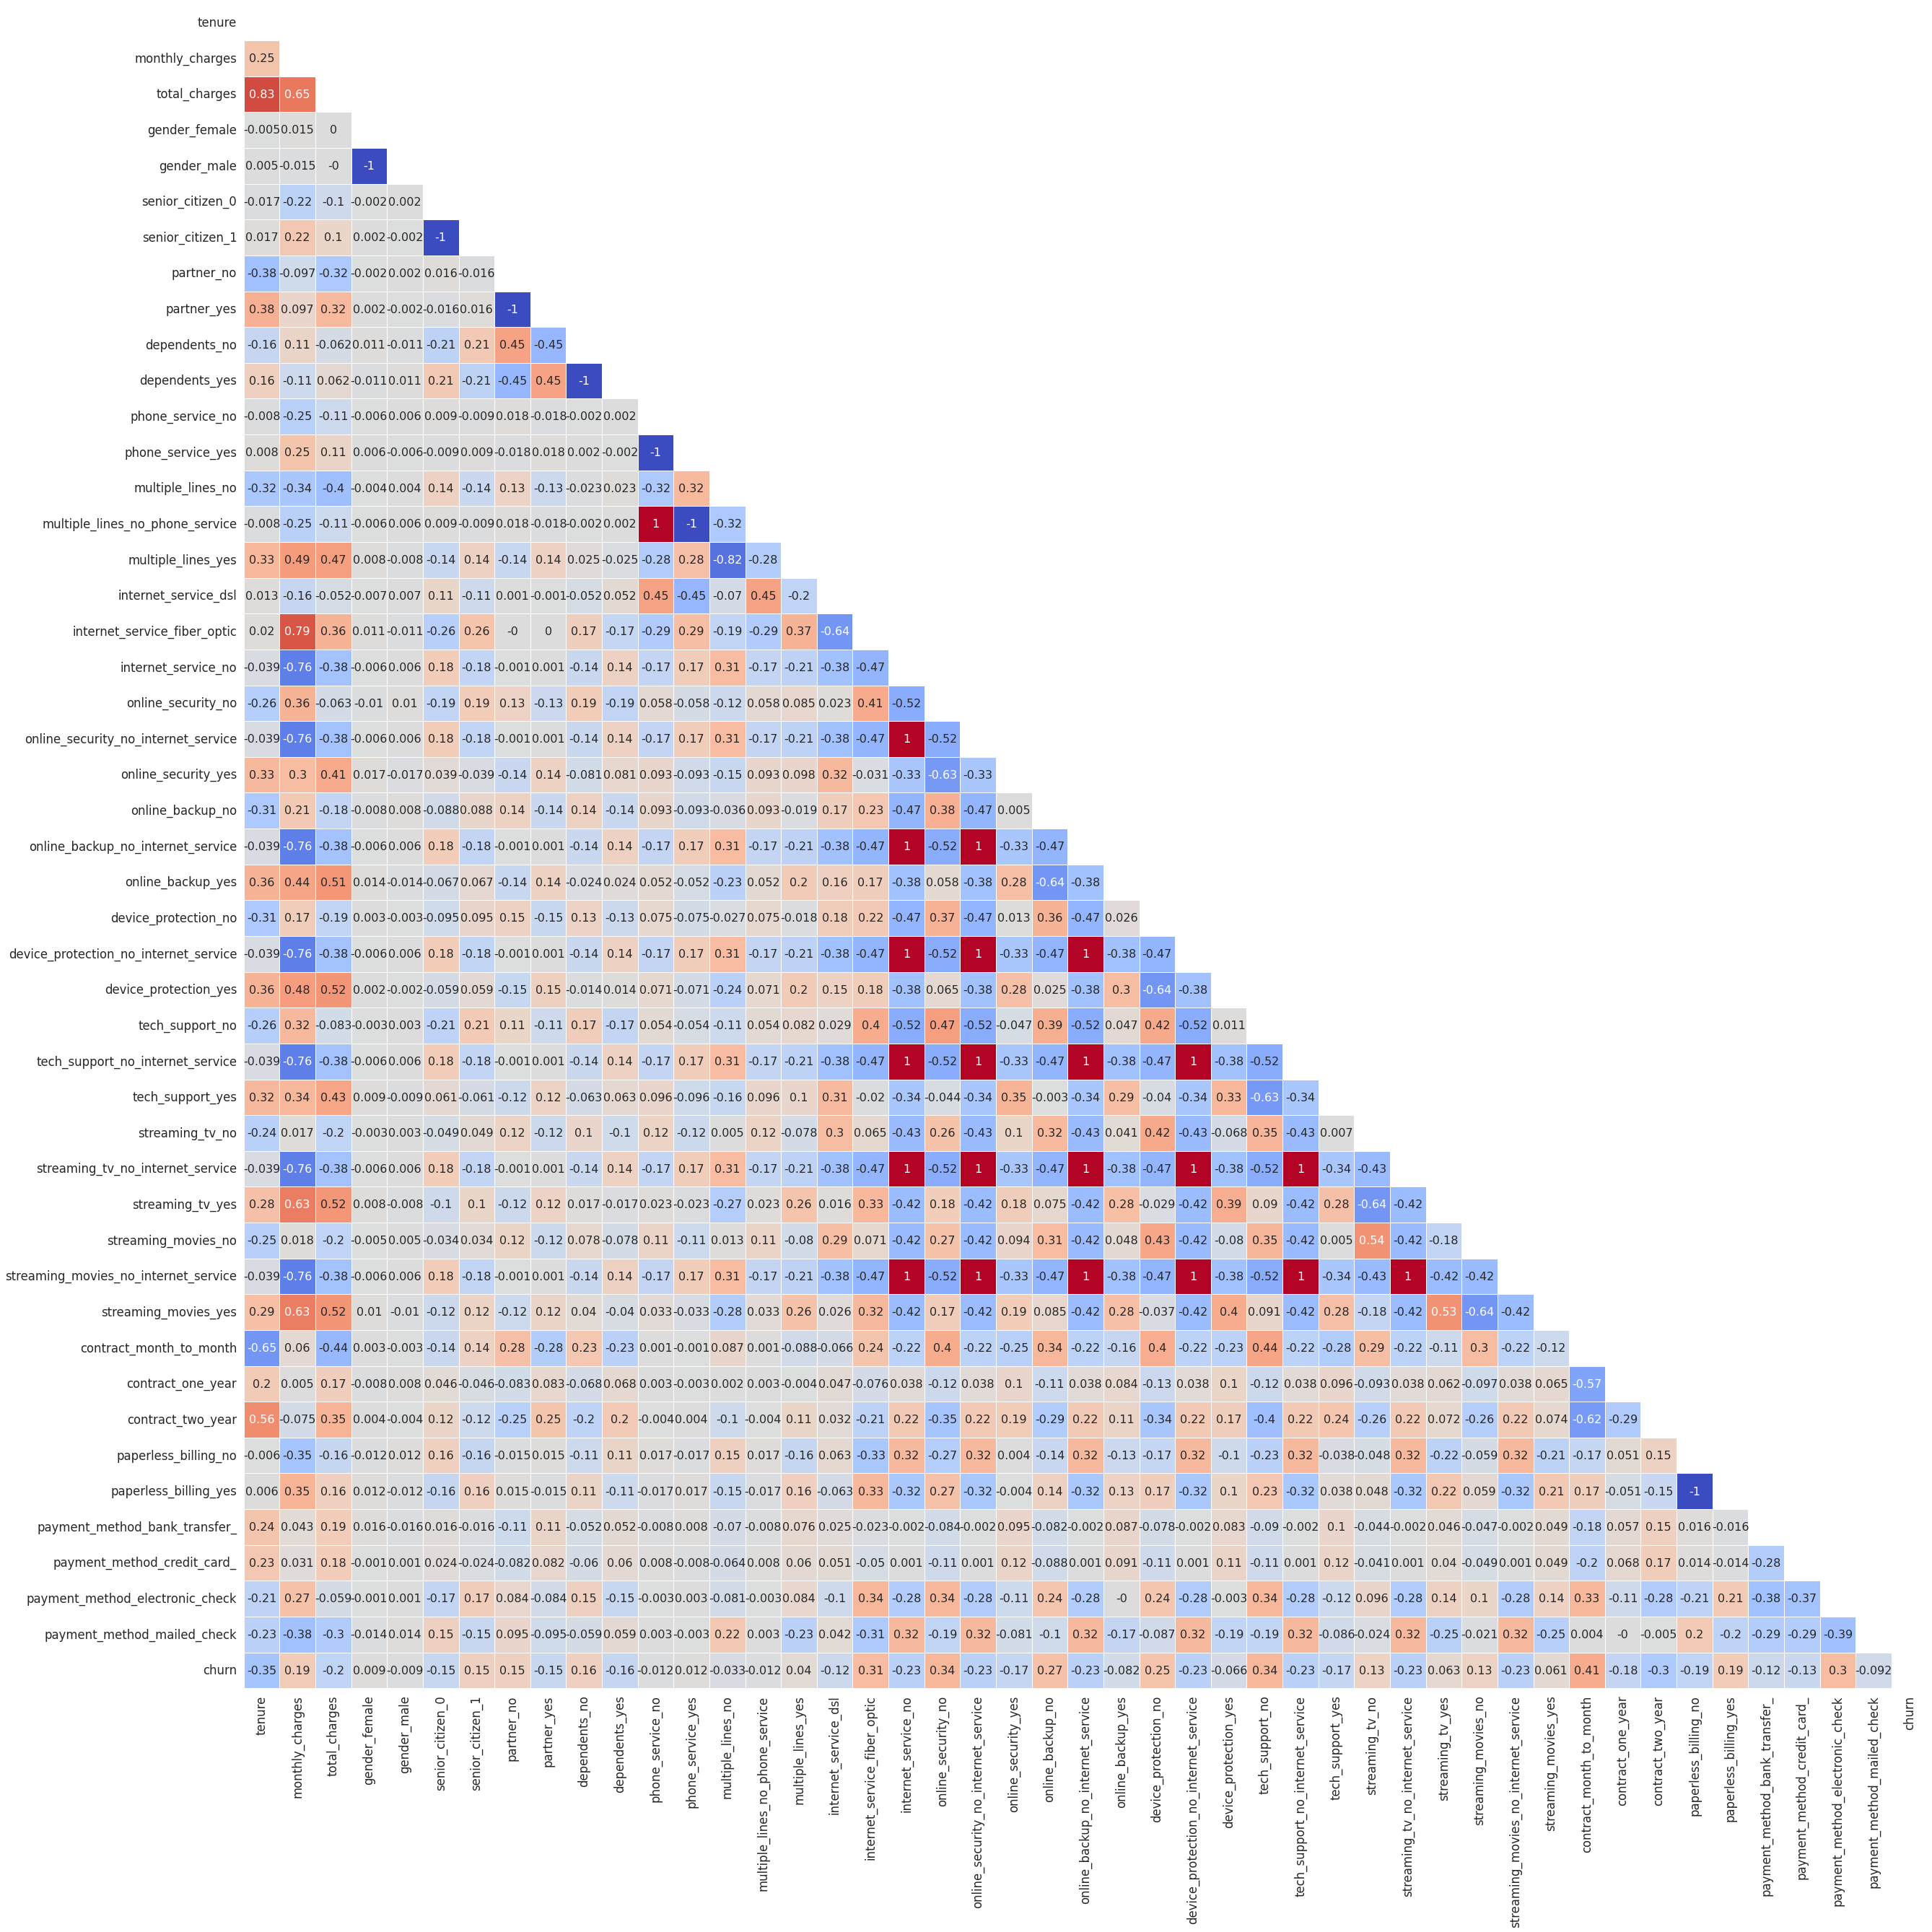

In [ ]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cbar=False,
            cmap='coolwarm', linewidth=1, mask=mask, 
            square=True, annot=True, annot_kws={'fontsize':16}, ax=ax)

plt.show()

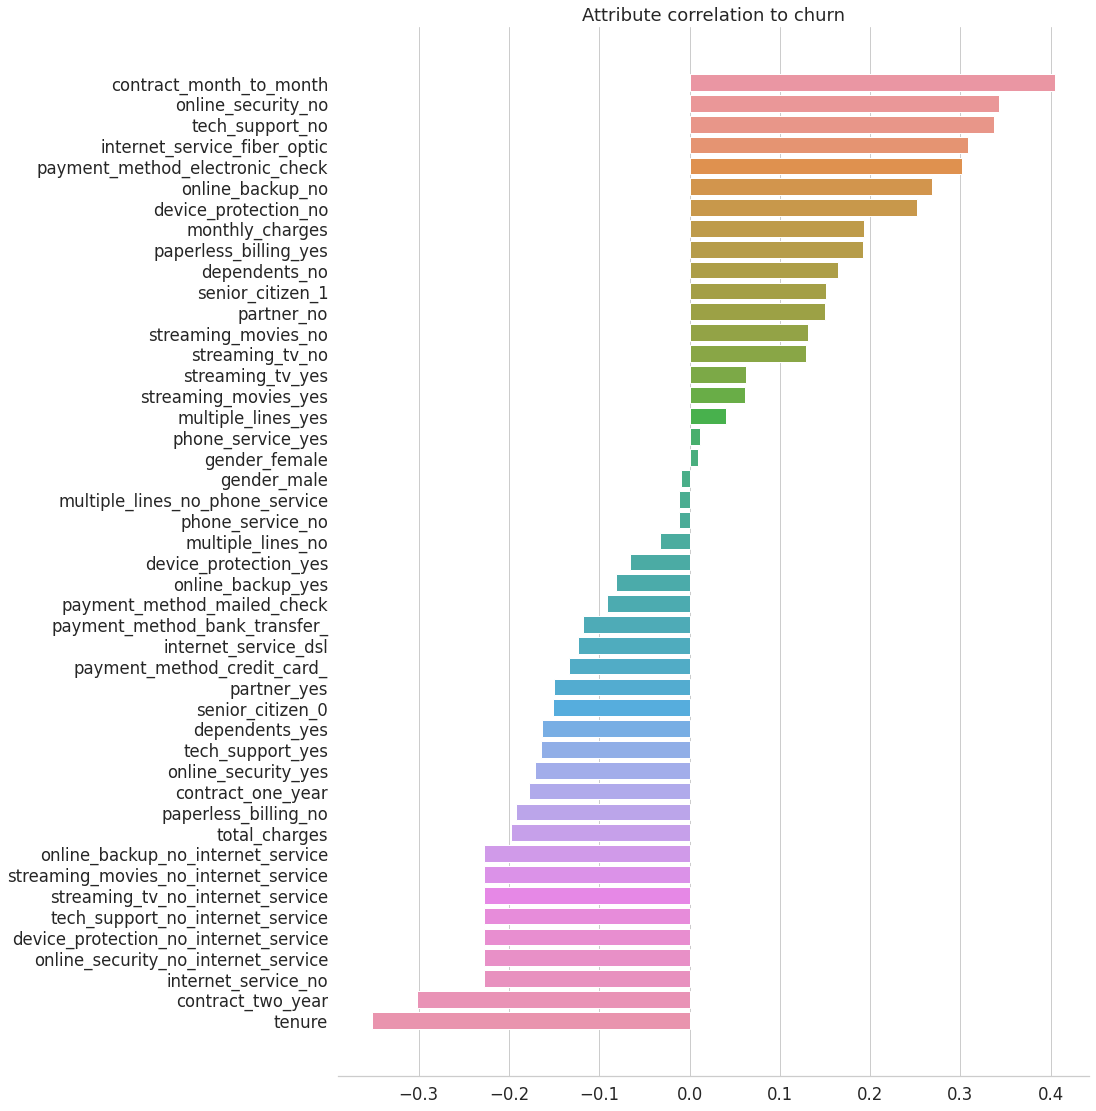

In [ ]:
corr_matrix = data_scale.corr().round(3)
corr_target = corr_matrix['churn'].drop('churn').sort_values(ascending=False)

with sns.axes_style('whitegrid'):
  fig, ax = plt.subplots(figsize=(12,18))

  sns.barplot(x=corr_target.values, y=corr_target.index, ax=ax)

  ax.grid(False, axis='y')
  ax.set_title('Attribute correlation to churn')

  ax.axis('tight')
  sns.despine(left=True)
  plt.show()

#### Positive Correlation

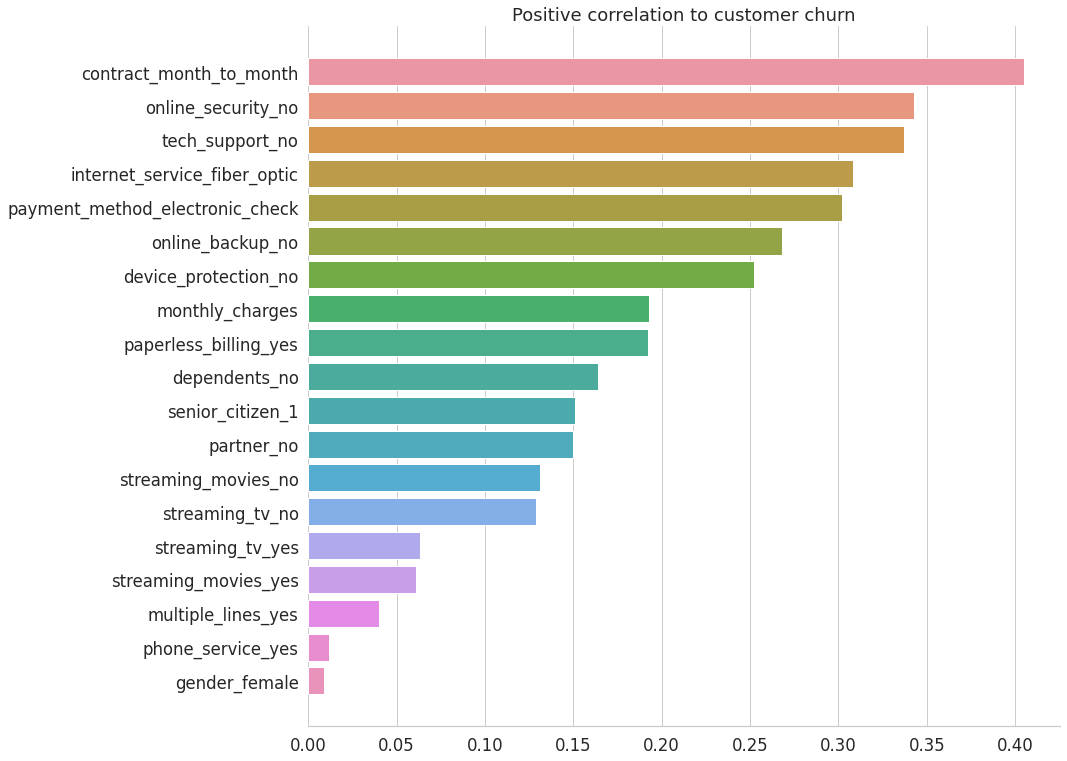

In [ ]:
corr_positive = corr_target[corr_target >= 0]

with sns.axes_style('whitegrid'):
  fig, ax = plt.subplots(figsize=(12,12))

  sns.barplot(x=corr_positive.values, y=corr_positive.index, ax=ax)

  ax.grid(False, axis='y')
  ax.set_title('Positive correlation to customer churn')

  ax.axis('tight')
  sns.despine(left=True)
  plt.show()

#### Negative Correlation

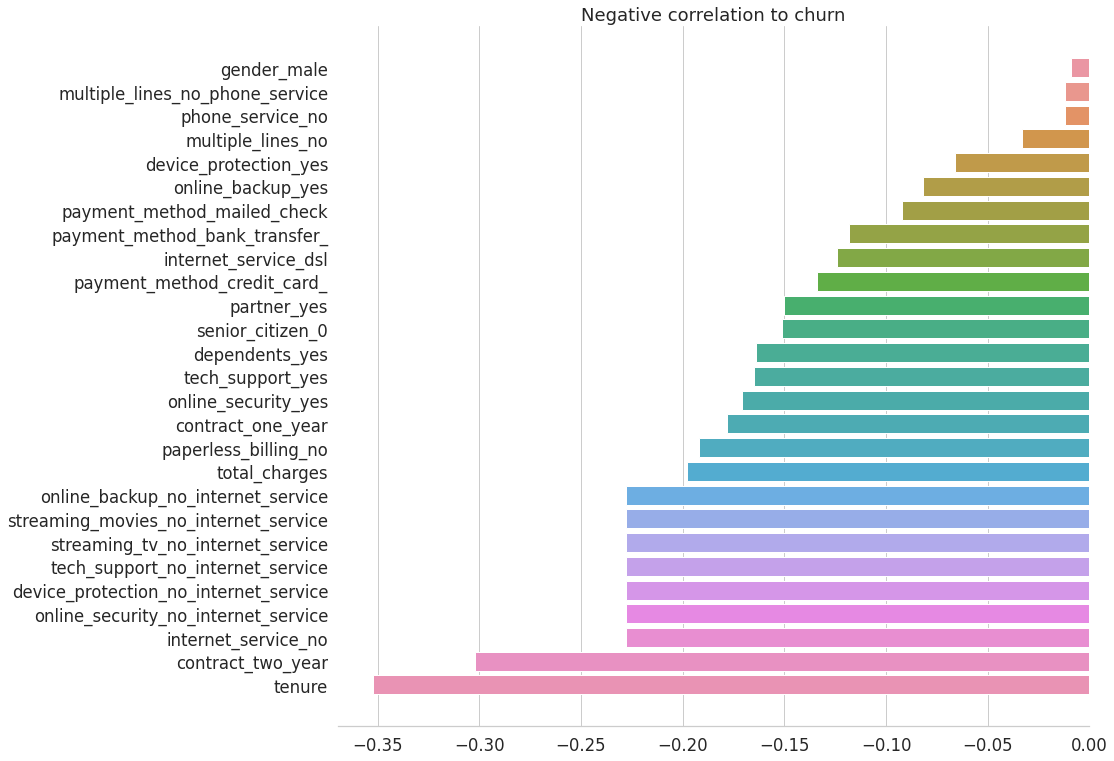

In [ ]:
corr_negative = corr_target[corr_target < 0]

with sns.axes_style('whitegrid'):
  fig, ax = plt.subplots(figsize=(12,12))

  sns.barplot(x=corr_negative.values, y=corr_negative.index, ax=ax)

  ax.grid(False, axis='y')
  ax.set_title('Negative correlation to churn')

  ax.axis('tight')
  sns.despine(left=True)
  plt.show()

From these correlation plots, we can see that there is some perfect multicollinearity (for binary features). Multicollinearity is a condition where some independent variables are highly correlated to each other. A perfect correlation is a condition when two independent variables have a +1.0 or -1.0 correlation. The perfect correlation between independent variables can lead to a singularity.
<br><br>
The simplest way to solve this problem is dropping 1 column when doing one-hot encoding. We can also drop 1 column only if the feature has a binary category.
<br><br>
The scikit-learn [documentation](https://scikit-learn.org/stable/modules/preprocessing) said: Such functionality is useful, for example, when using non-regularized regression (LinearRegression), since co-linearity would cause the covariance matrix to be non-invertible.
<br><br>
Jessica Miles had written some good explanations about multicollinearity and the effect of dropping a column (first column or average column) from the encoded data. You can read [here](https://towardsdatascience.com/drop-first-can-hurt-your-ols-regression-models-interpretability-4ca529cfb707).

### Mixed Correlation

In [ ]:
# numerical
column_numerical = ['tenure', 'monthly_charges', 'total_charges']

# categorical
column_categorical = list(data_scale.columns)
column_categorical.remove('tenure')
column_categorical.remove('monthly_charges')
column_categorical.remove('total_charges')

# only contains input features
column_categorical.remove('churn')

#### Cramer's V

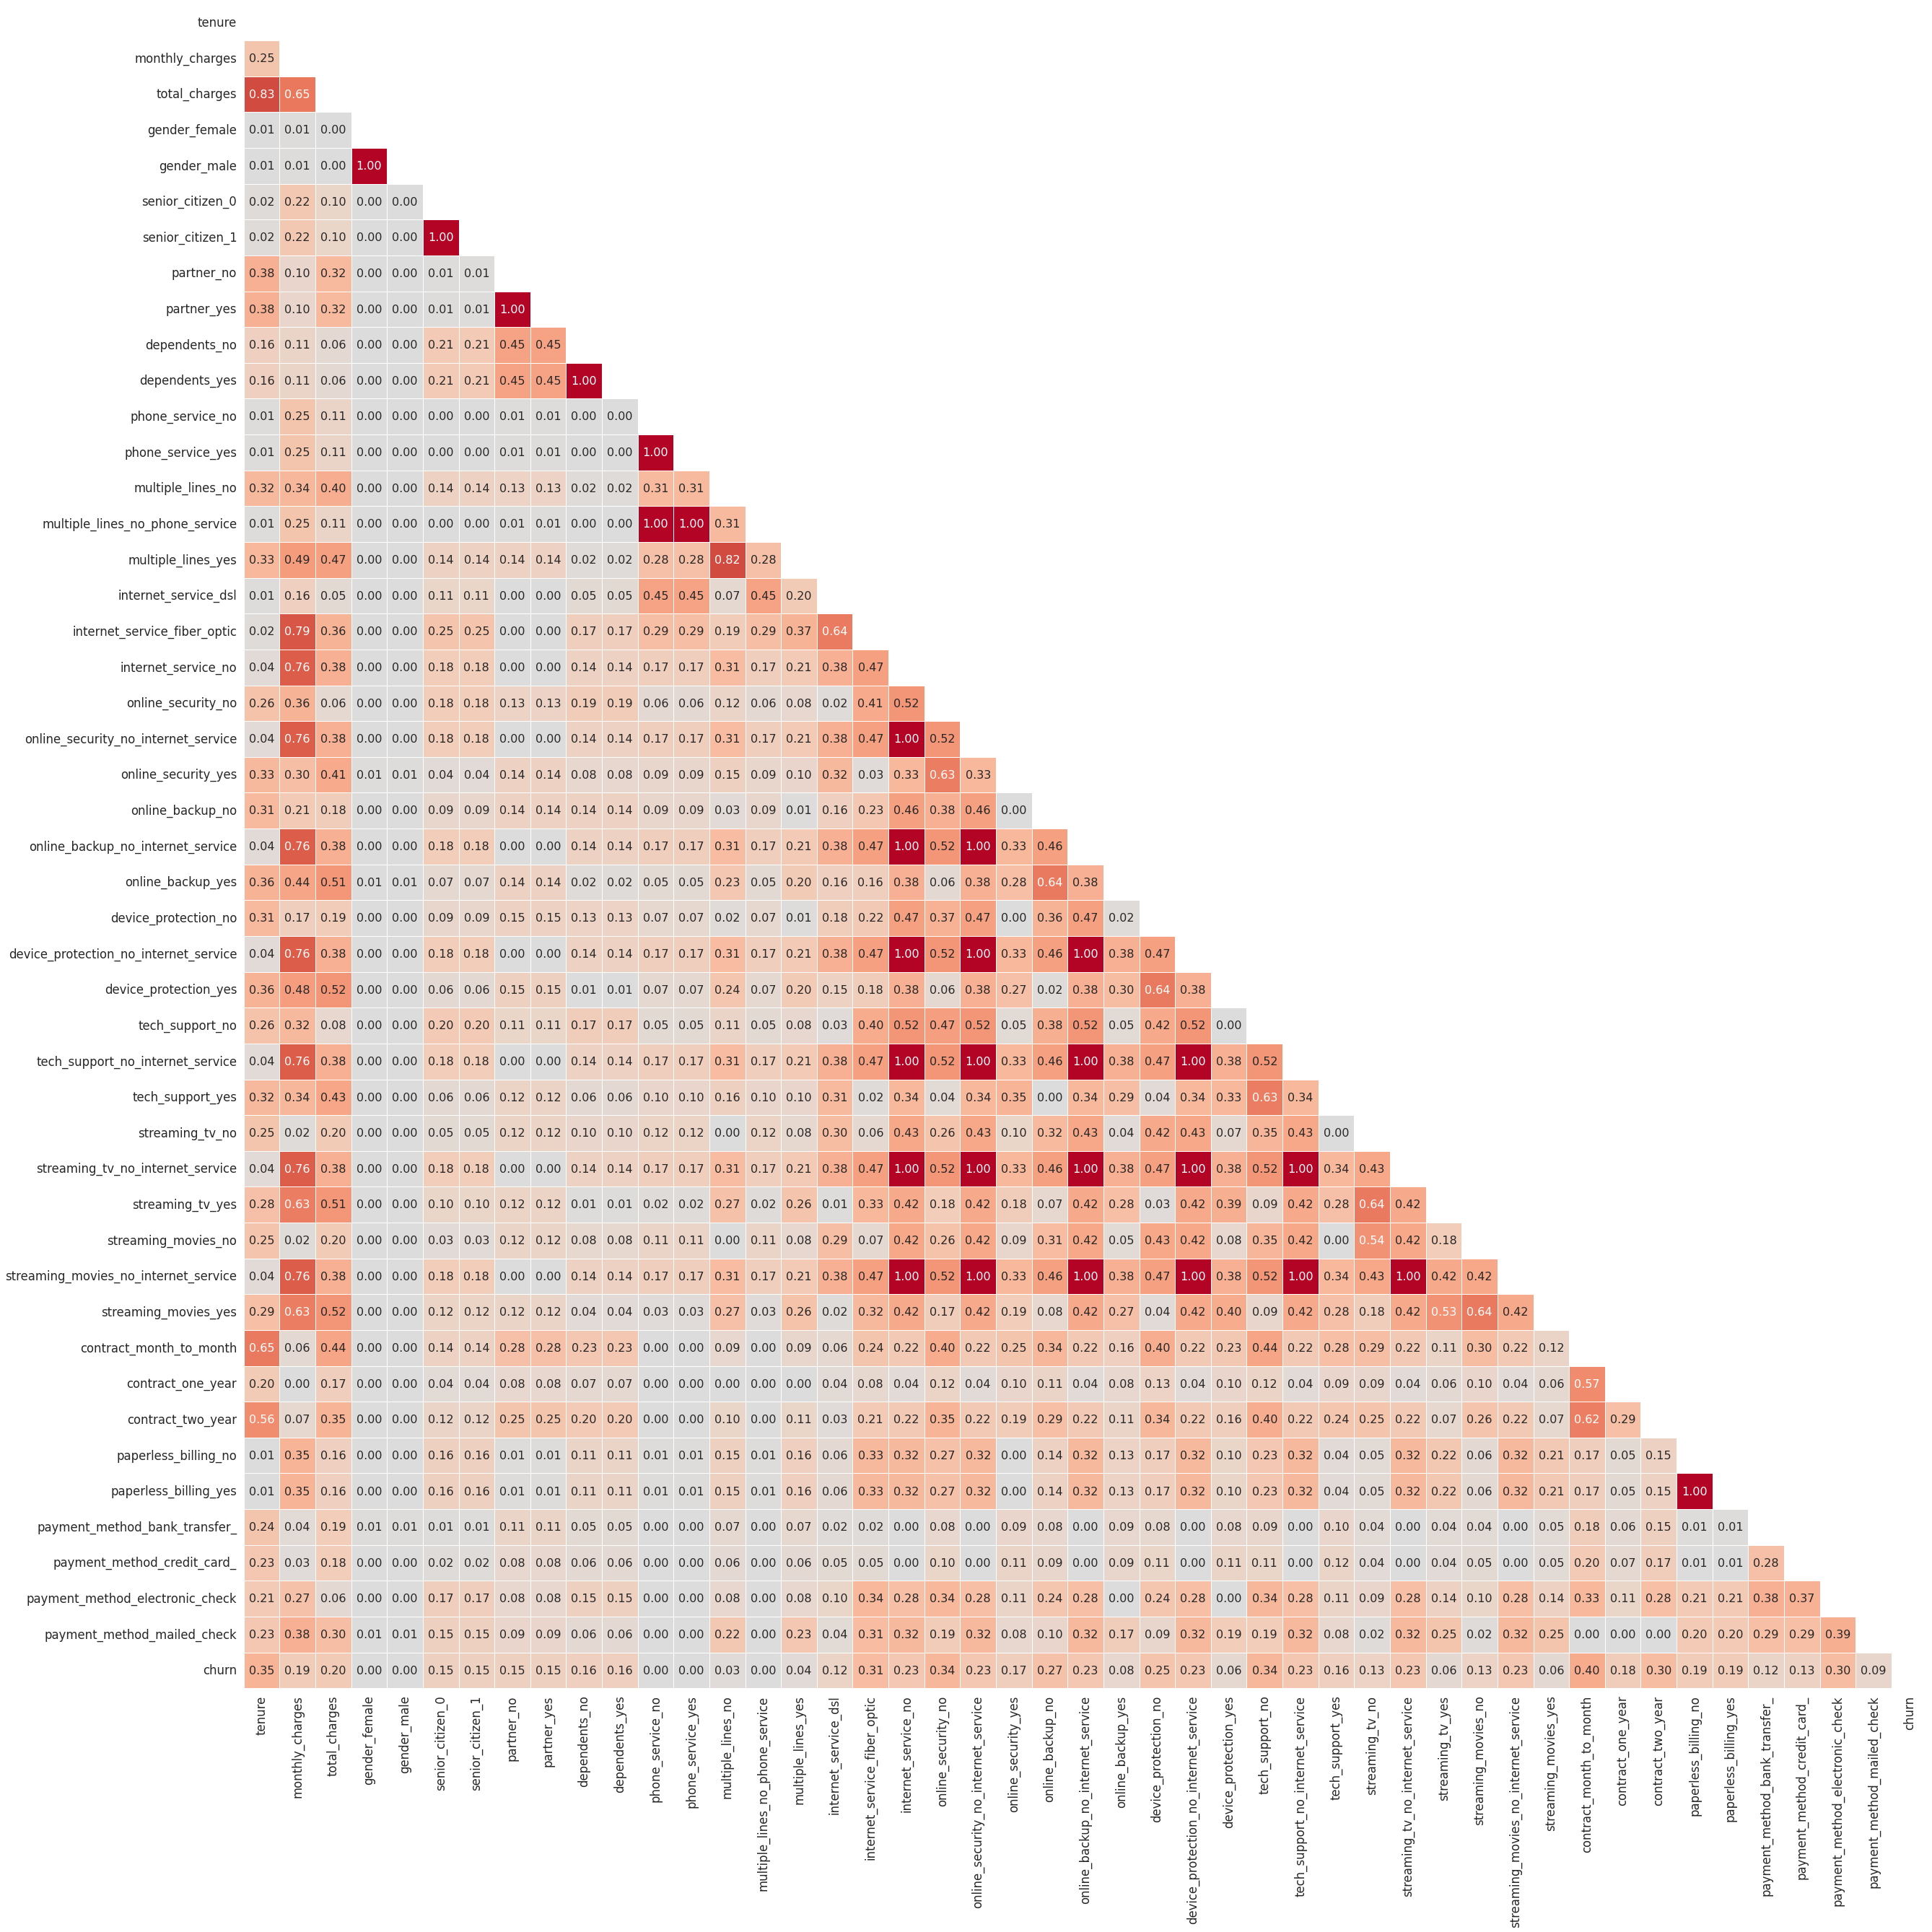

In [ ]:
# calculate the associations (correlation) between features
associations_out = associations(data_scale,
                                numerical_columns=column_numerical,
                                nominal_columns=column_categorical,
                                nom_nom_assoc='cramer',
                                compute_only=True)
# the output is a dict {'ax', 'corr'}
corr_all = associations_out['corr']

mask = np.triu(np.ones_like(corr_all, dtype=bool))

fig, ax = plt.subplots(figsize=(40,40))

sns.heatmap(corr_all, center=0, vmin=-1, vmax=1, mask=mask, cbar=False,
            annot=True, square=True, linewidth=1, cmap='coolwarm', fmt='.2f',
            annot_kws={'fontsize':16}, ax=ax)

plt.show()

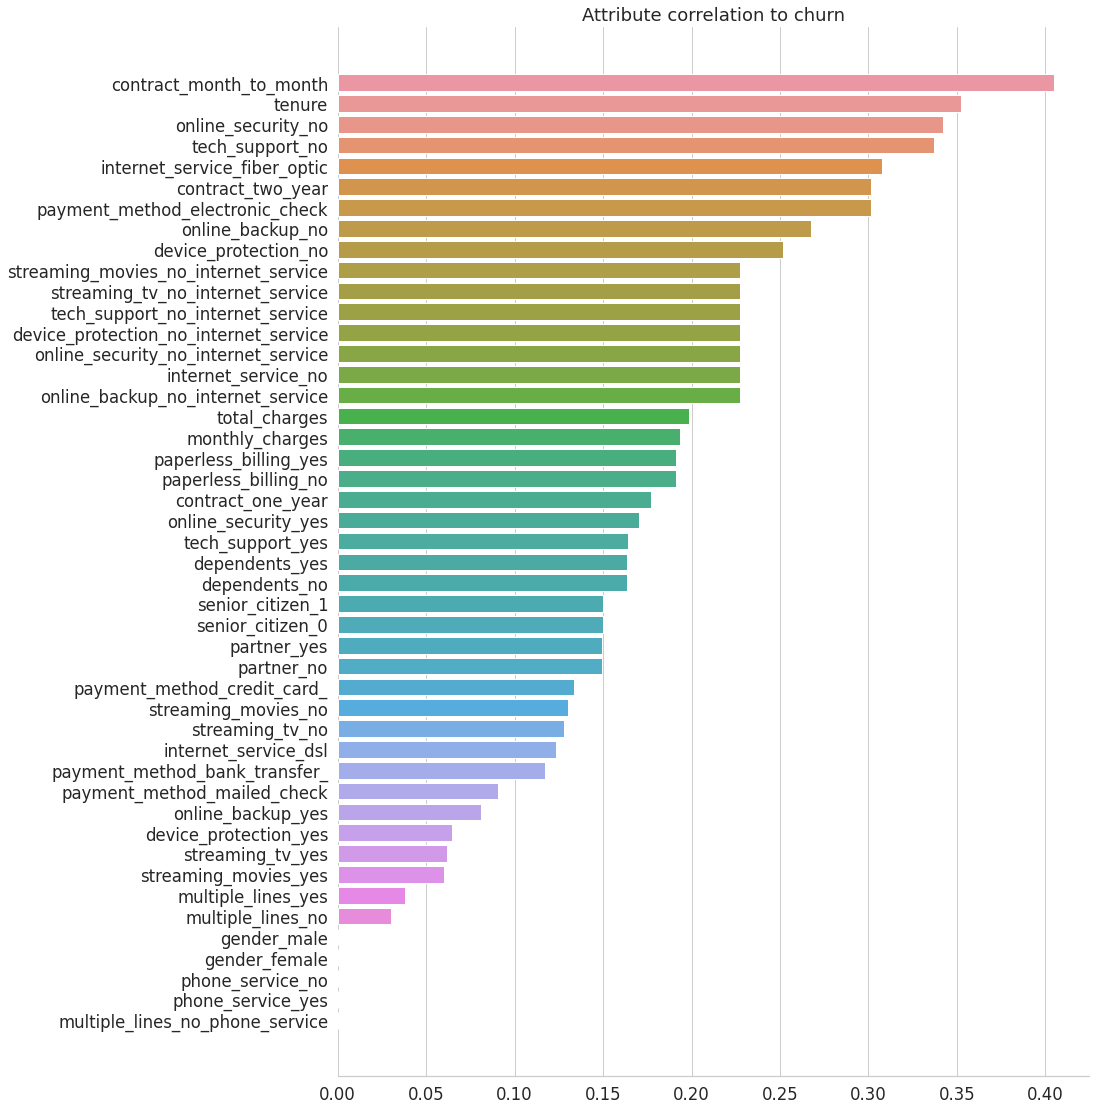

In [ ]:
corr_target = corr_all['churn'].drop('churn').sort_values(ascending=False)

with sns.axes_style('whitegrid'):
  fig, ax = plt.subplots(figsize=(12,18))

  sns.barplot(x=corr_target.values, y=corr_target.index, ax=ax)

  ax.grid(False, axis='y')
  ax.set_title('Attribute correlation to churn')

  ax.axis('tight')
  sns.despine(left=True)
  plt.show()

#### Theil's U

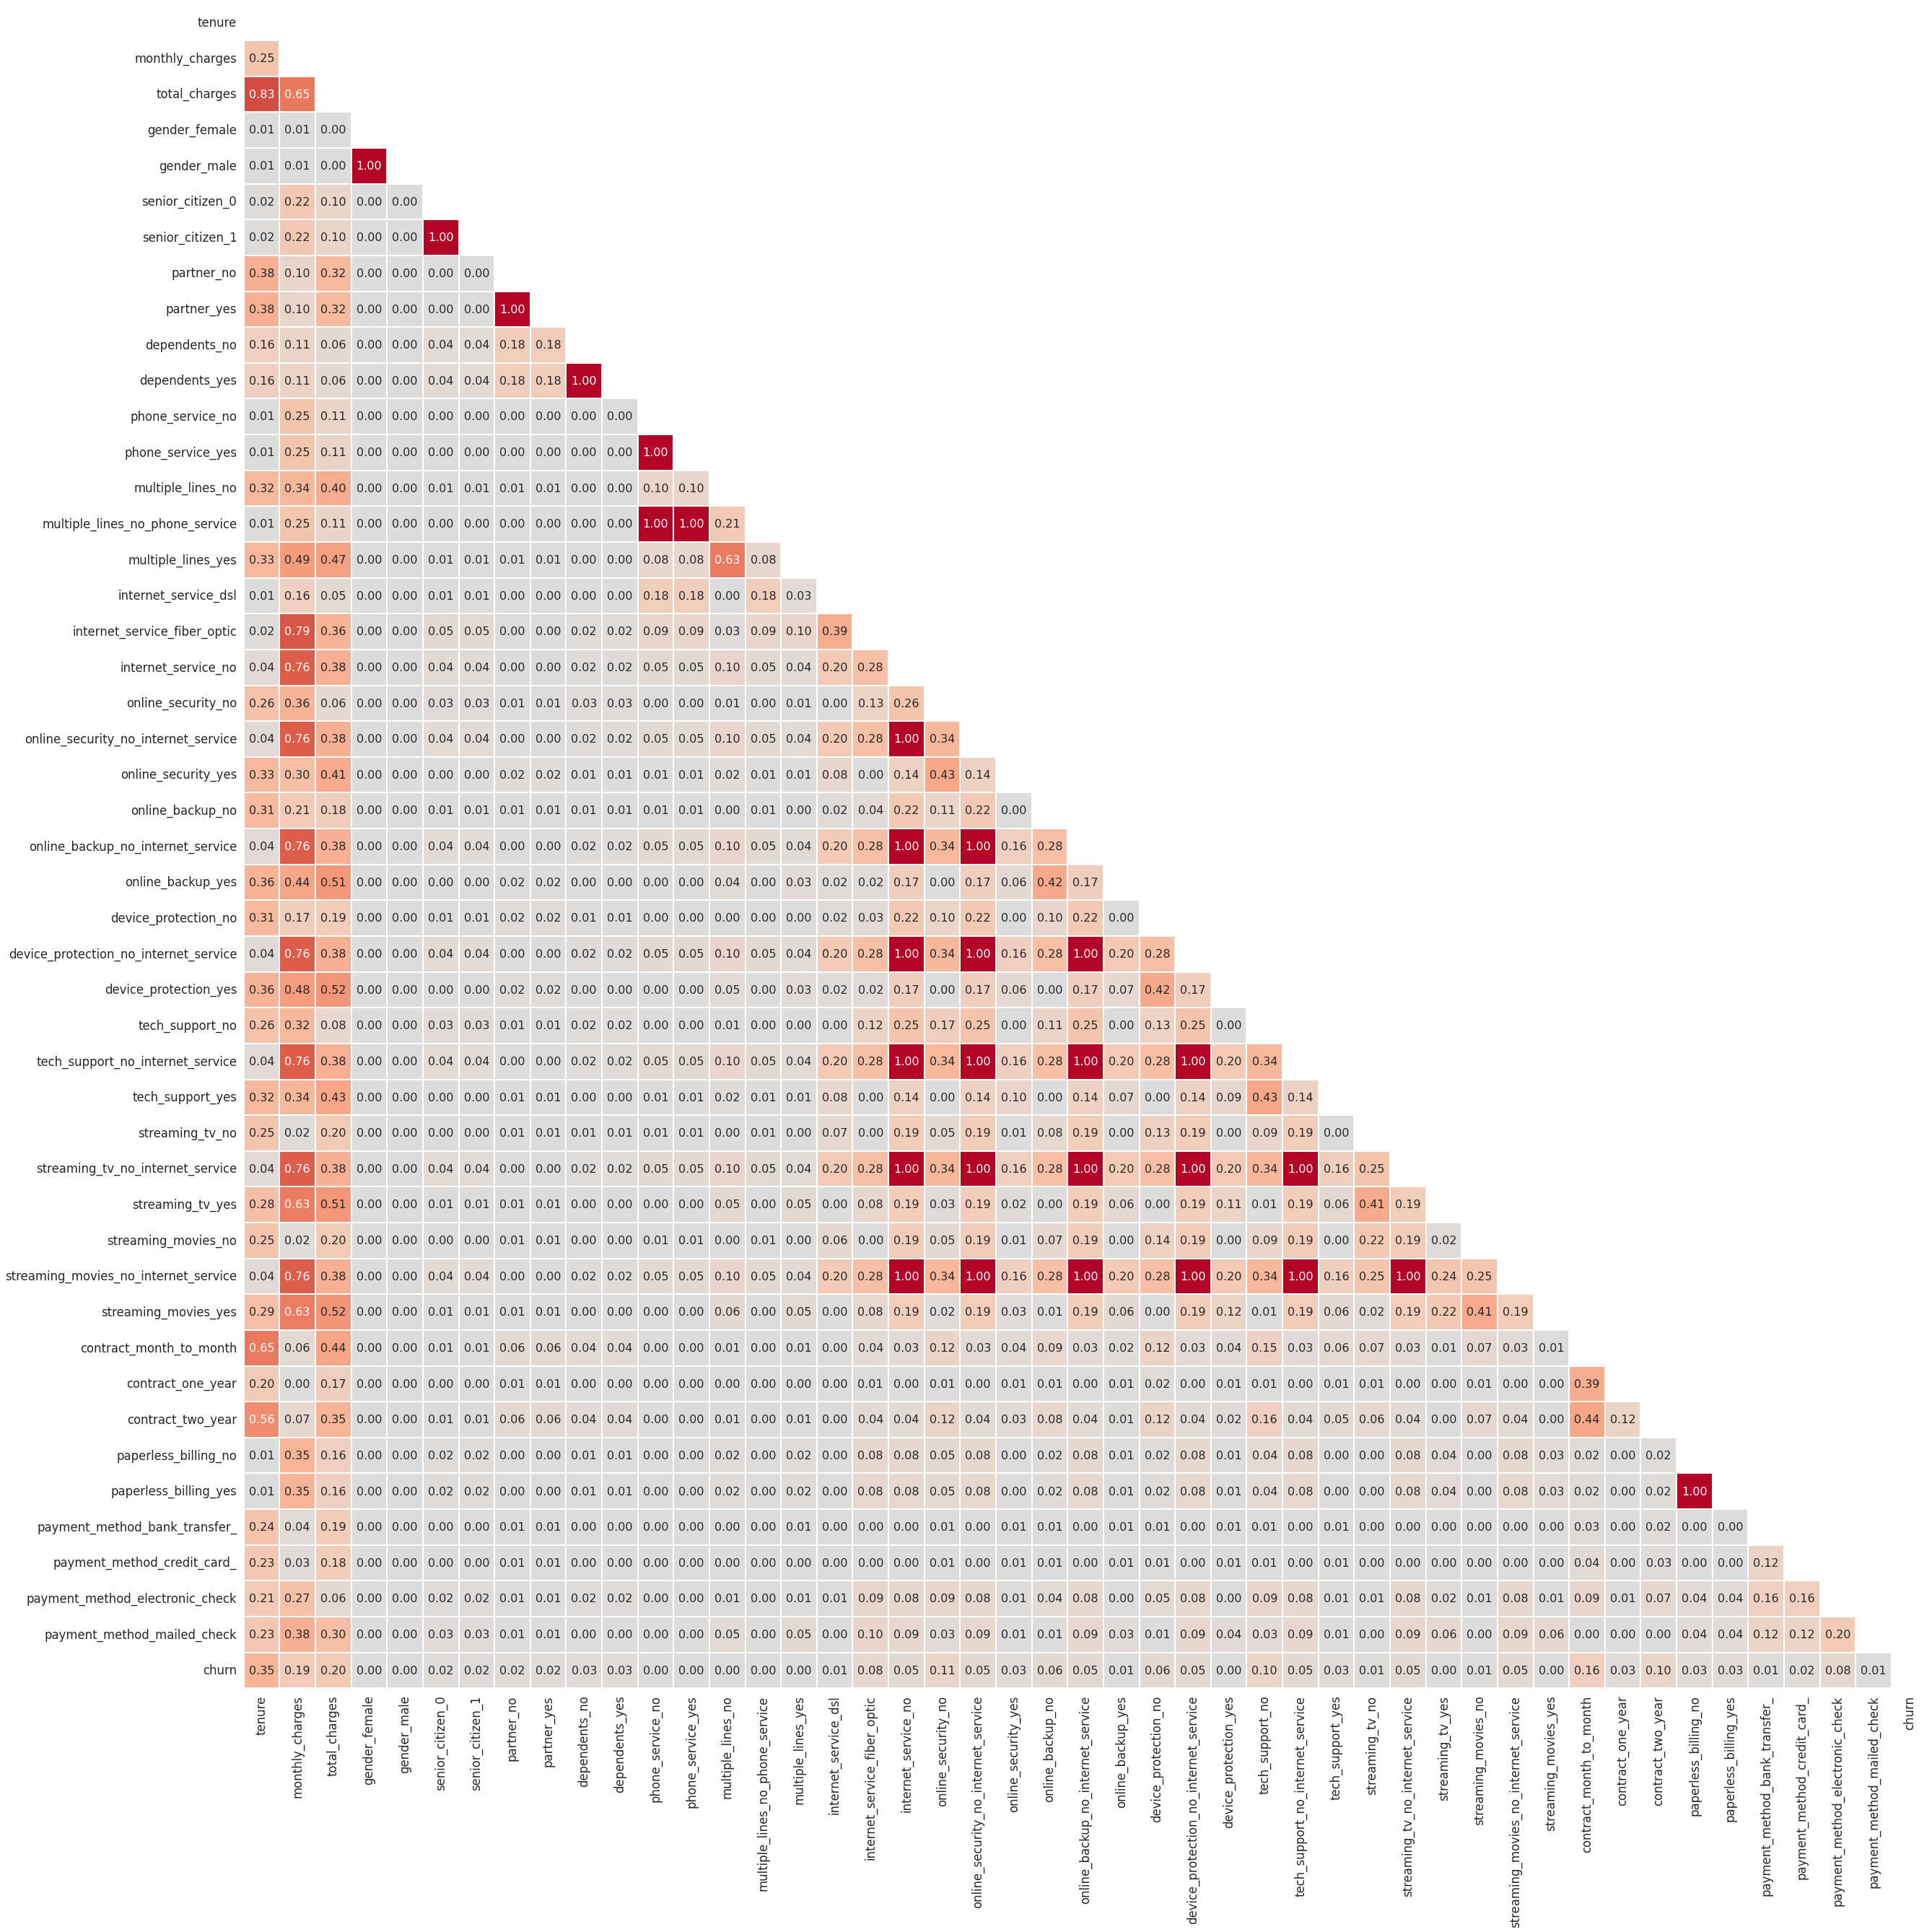

In [ ]:
# calculate the associations (correlation) between features
associations_out = associations(data_scale,
                                numerical_columns=column_numerical,
                                nom_nom_assoc='theil',
                                compute_only=True)
# the output is a dict {'ax', 'corr'}
corr_all = associations_out['corr']

mask = np.triu(np.ones_like(corr_all, dtype=bool))

fig, ax = plt.subplots(figsize=(40,40))

sns.heatmap(corr_all, center=0, vmin=-1, vmax=1, mask=mask, cbar=False,
            annot=True, square=True, linewidth=1, cmap='coolwarm', fmt='.2f',
            annot_kws={'fontsize':16}, ax=ax)

plt.show()

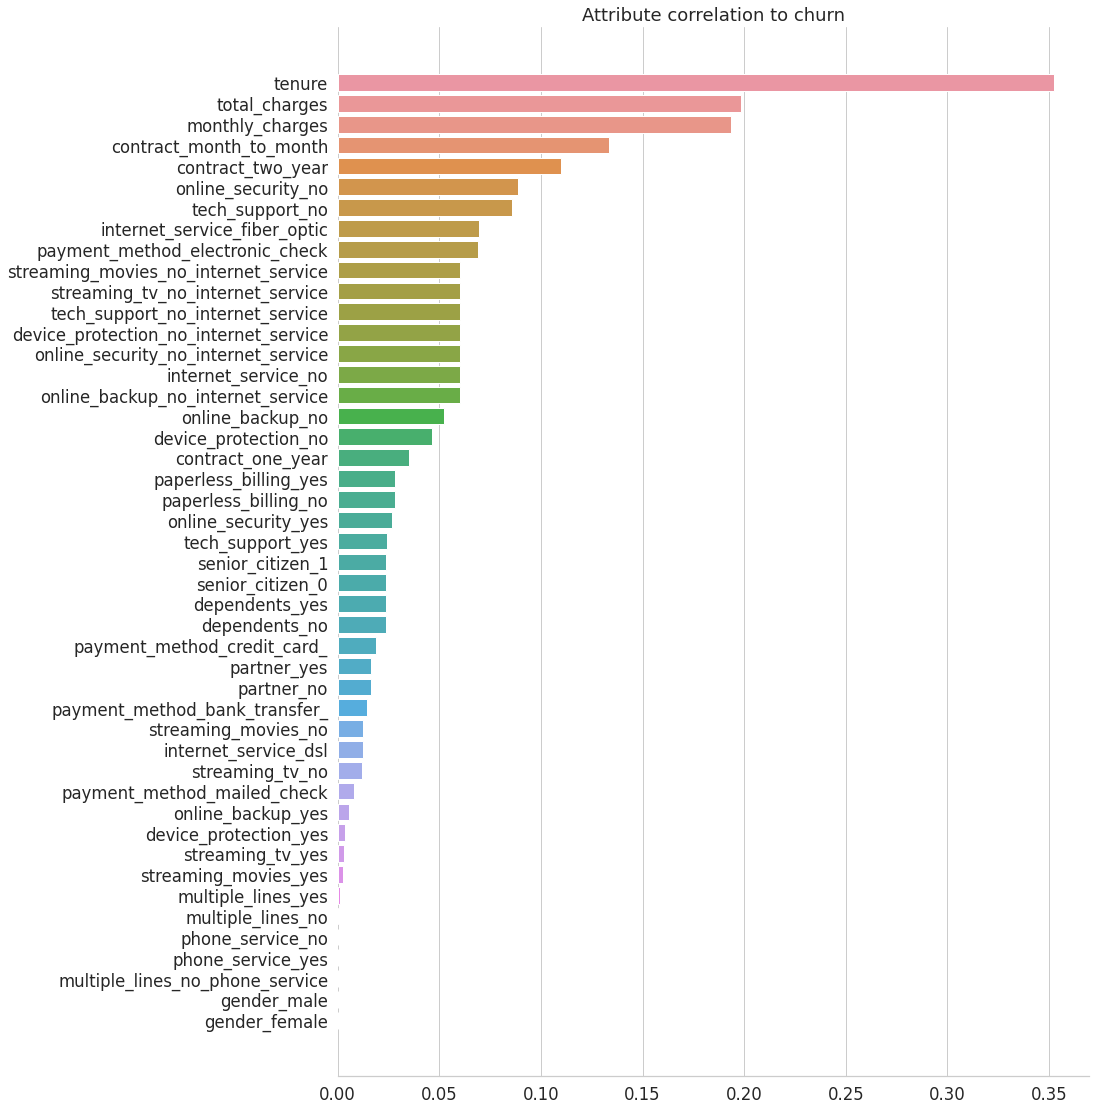

In [ ]:
corr_target = corr_all['churn'].drop('churn').sort_values(ascending=False)

with sns.axes_style('whitegrid'):
  fig, ax = plt.subplots(figsize=(12,18))

  sns.barplot(x=corr_target.values, y=corr_target.index, ax=ax)

  ax.grid(False, axis='y')
  ax.set_title('Attribute correlation to churn')

  ax.axis('tight')
  sns.despine(left=True)
  plt.show()

#### Cramer vs Pearson

##### Positive Correlation

In [ ]:
corr_matrix = data_scale.corr().round(3)
corr_target_pearson = corr_matrix['churn'].drop('churn').sort_values(ascending=False)

# calculate the associations (correlation) between features
associations_out = associations(data_scale,
                                numerical_columns=column_numerical,
                                nom_nom_assoc='cramer',
                                compute_only=True)
# the output is a dict {'ax', 'corr'}
corr_all = associations_out['corr']
corr_target_cramer = corr_all['churn'].drop('churn').sort_values(ascending=False)

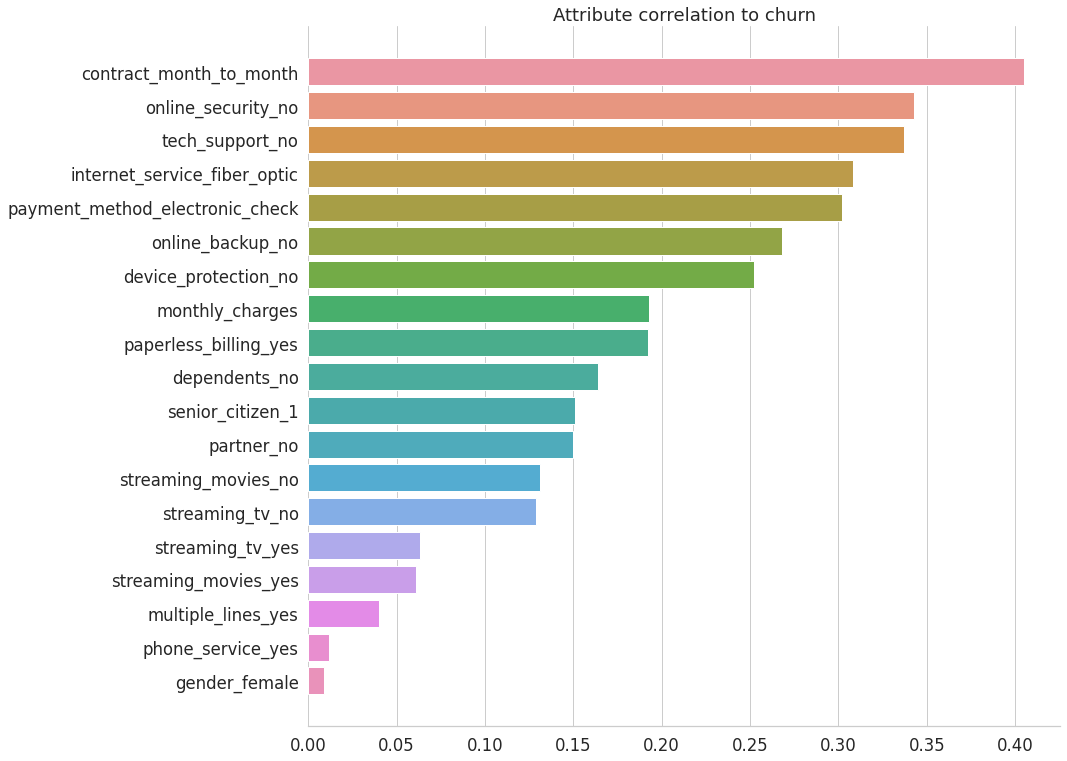

In [ ]:
tmp_positive = list(corr_target_pearson[corr_target_pearson >= 0].index)
tmp_positive

corr_pearson_positive = corr_target_pearson[corr_target_pearson >= 0]

with sns.axes_style('whitegrid'):
  fig, ax = plt.subplots(figsize=(12,12))

  sns.barplot(x=corr_pearson_positive.values, y=corr_pearson_positive.index, ax=ax)

  ax.grid(False, axis='y')
  ax.set_title('Attribute correlation to churn')

  ax.axis('tight')
  sns.despine(left=True)
  plt.show()

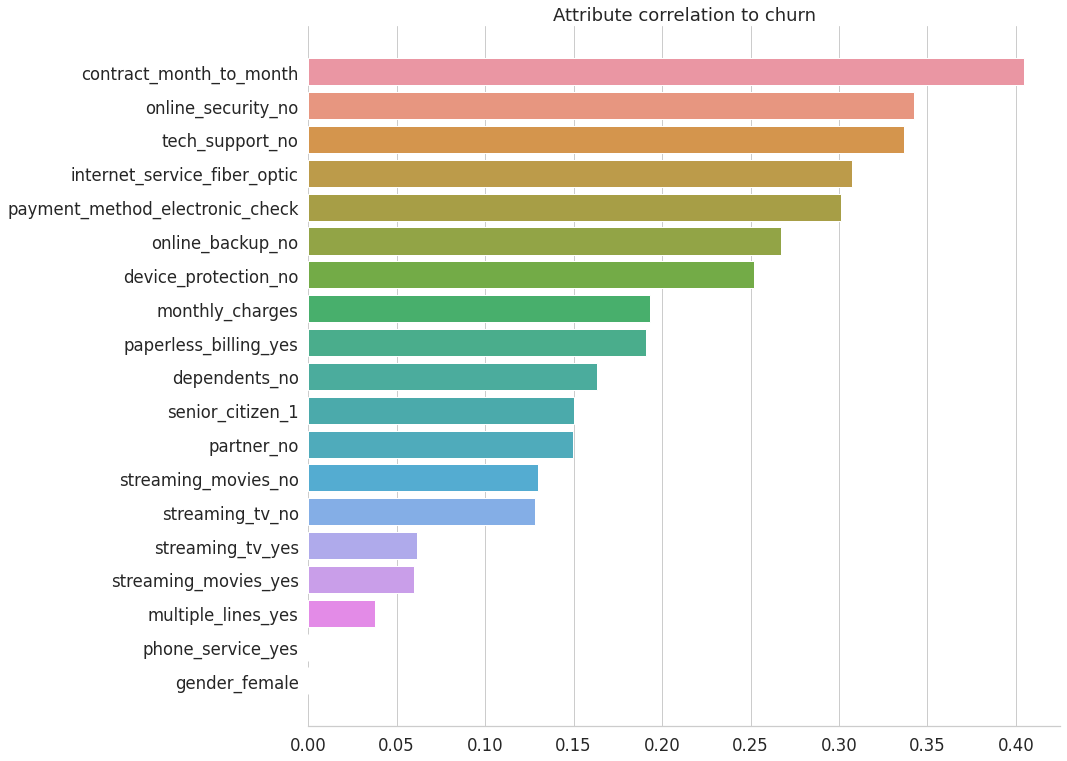

In [ ]:
corr_cramer_positive = corr_target_cramer[tmp_positive]

with sns.axes_style('whitegrid'):
  fig, ax = plt.subplots(figsize=(12,12))

  sns.barplot(x=corr_cramer_positive.values, y=corr_cramer_positive.index, ax=ax)

  ax.grid(False, axis='y')
  ax.set_title('Attribute correlation to churn')

  ax.axis('tight')
  sns.despine(left=True)
  plt.show()

##### Negative Correlation

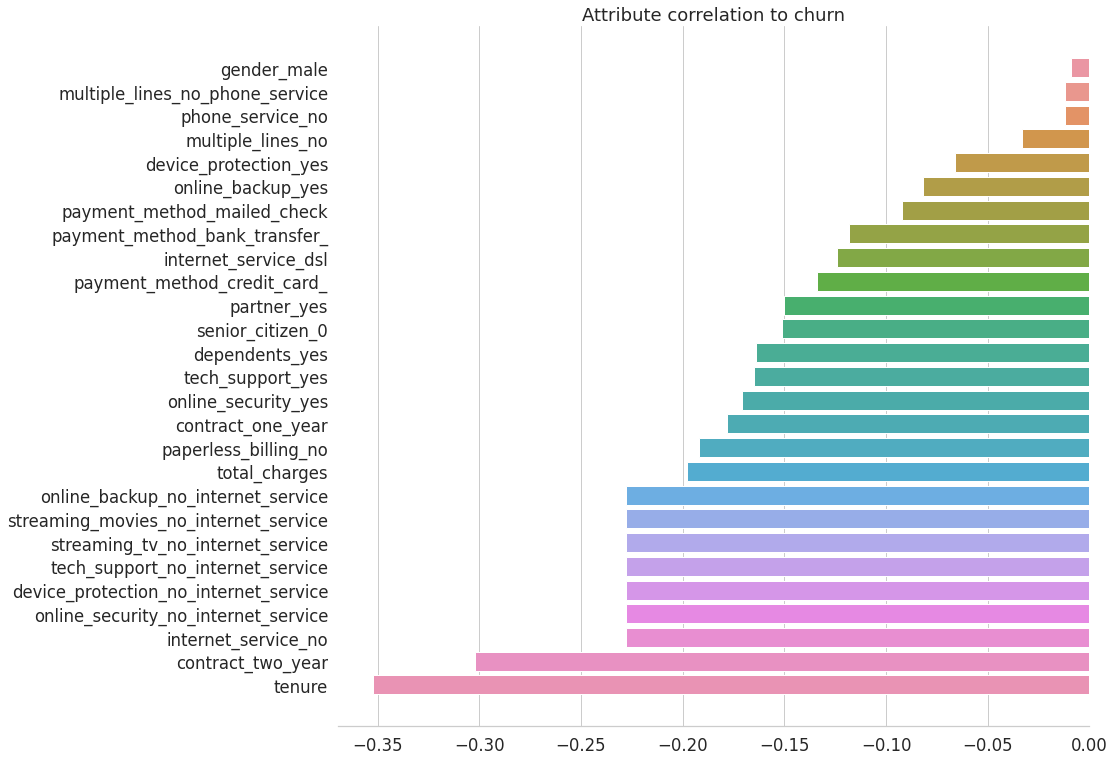

In [ ]:
tmp_negative = list(corr_target_pearson[corr_target_pearson < 0].index)
tmp_negative

corr_pearson_negative = corr_target_pearson[corr_target_pearson < 0]

with sns.axes_style('whitegrid'):
  fig, ax = plt.subplots(figsize=(12,12))

  sns.barplot(x=corr_pearson_negative.values, y=corr_pearson_negative.index, ax=ax)

  ax.grid(False, axis='y')
  ax.set_title('Attribute correlation to churn')

  ax.axis('tight')
  sns.despine(left=True)
  plt.show()

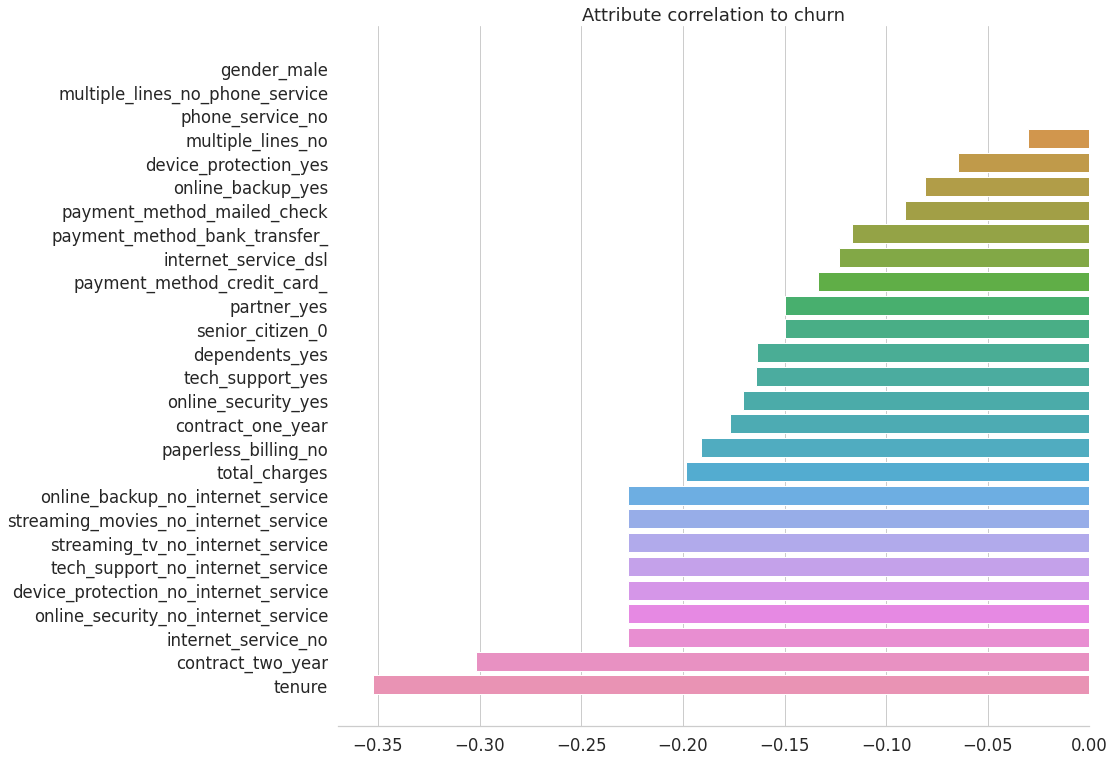

In [ ]:
corr_cramer_negative = corr_target_cramer[tmp_negative]

with sns.axes_style('whitegrid'):
  fig, ax = plt.subplots(figsize=(12,12))

  sns.barplot(x=-corr_cramer_negative.values, y=corr_cramer_negative.index, ax=ax)

  ax.grid(False, axis='y')
  ax.set_title('Attribute correlation to churn')

  ax.axis('tight')
  sns.despine(left=True)
  plt.show()

## SMOTE
BANDINGKAN ANTARA SMOTE DAN SMOTENC (numeric & categoric)

In [15]:
# numerical
column_numerical = ['tenure', 'monthly_charges', 'total_charges']

# categorical
column_categorical = list(data_scale.columns)
column_categorical.remove('tenure')
column_categorical.remove('monthly_charges')
column_categorical.remove('total_charges')

# only contains input features
# column_categorical.remove('churn')

### SMOTE

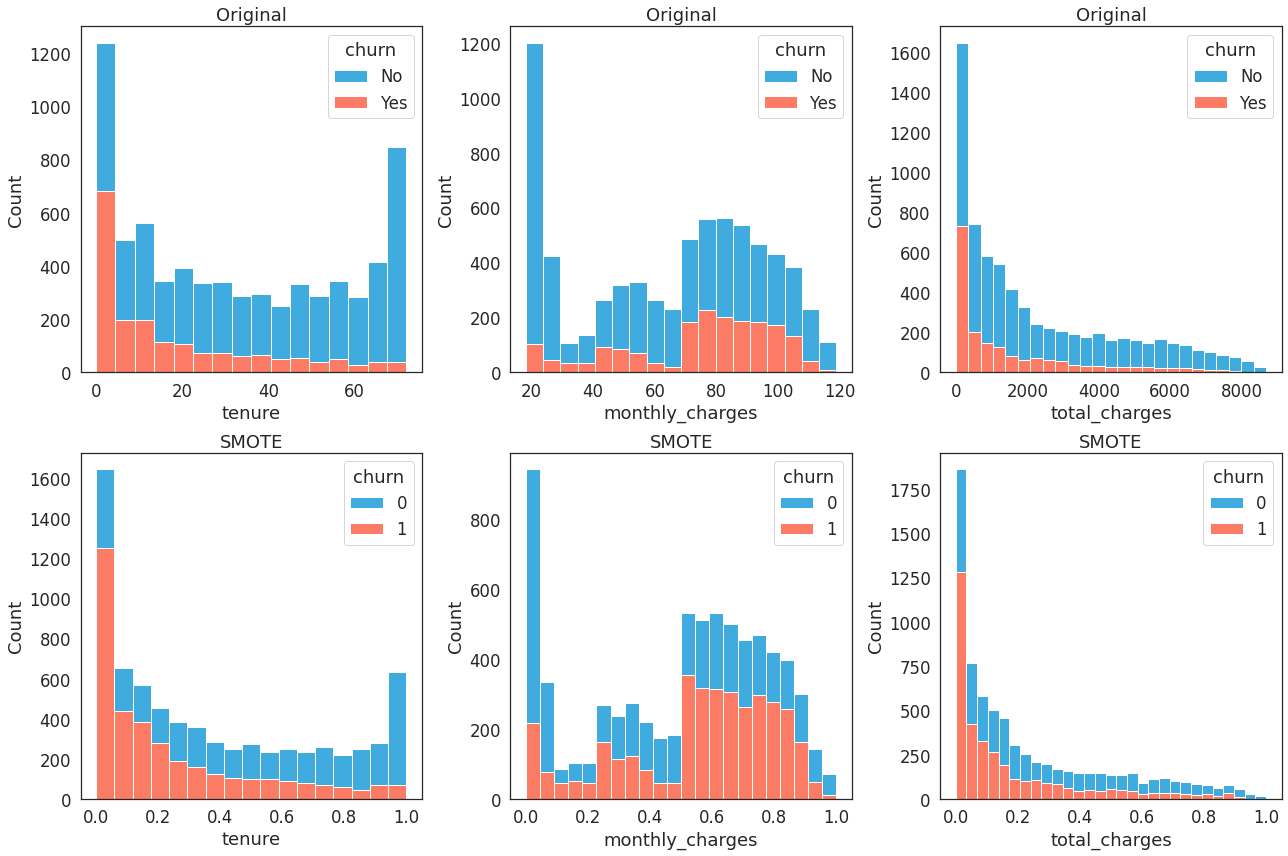

In [16]:
smote = SMOTE(random_state=0)

X_train_smote, y_train_smote = smote.fit_resample(X_train_scale, y_train_encode)

X_train_smote_df = pd.DataFrame(X_train_smote, columns=X_train_smote.columns)
y_train_smote_df = pd.DataFrame(y_train_smote, columns=['churn'])

data_smote = pd.concat([X_train_smote_df, y_train_smote_df], axis=1)

column_numerical = ['tenure', 'monthly_charges', 'total_charges']

fig, ax = plt.subplots(2, 3, figsize=(18,12))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_numerical):
  sns.histplot(data=data, x=col, hue='churn', multiple='stack', ax=axes_list[i])
  axes_list[i].set_title('Original')

for i, col in enumerate(column_numerical):
  sns.histplot(data=data_smote, x=col, hue='churn', multiple='stack', ax=axes_list[i+3])
  axes_list[i+3].set_title('SMOTE')

plt.tight_layout()
plt.show()

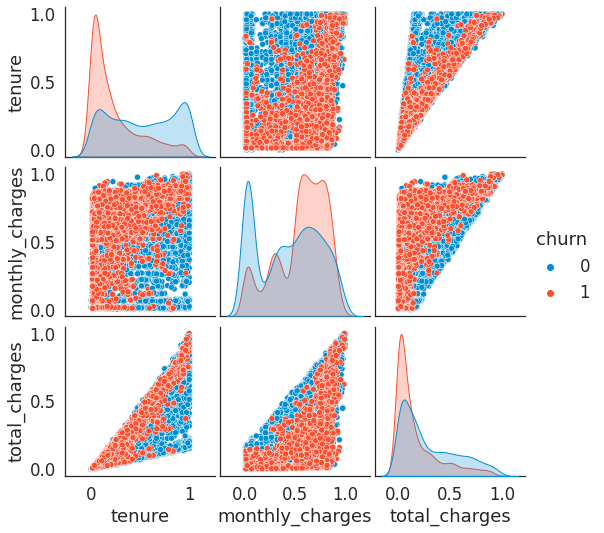

In [17]:
sns.pairplot(data_smote, x_vars=column_numerical, y_vars=column_numerical, hue='churn')

plt.show()

### SMOTENC

In [ ]:
data_scale.head()

tenure  monthly_charges  total_charges  gender_female  gender_male  \
6427  0.569444         0.017439       0.092386            0.0          1.0   
6971  0.250000         0.810663       0.211433            1.0          0.0   
96    0.986111         0.482810       0.546783            0.0          1.0   
5640  0.013889         0.609865       0.009165            0.0          1.0   
414   0.666667         0.520678       0.408190            1.0          0.0   

      senior_citizen_0  senior_citizen_1  partner_no  partner_yes  \
6427               1.0               0.0         1.0          0.0   
6971               0.0               1.0         0.0          1.0   
96                 1.0               0.0         0.0          1.0   
5640               1.0               0.0         1.0          0.0   
414                0.0               1.0         0.0          1.0   

      dependents_no  ...  contract_month_to_month  contract_one_year  \
6427            1.0  ...                      0.0                0.0   
6971            1.0  ...                      1.0                0.0   
96              0.0  ...                      0.0                1.0   
5640            1.0  ...                      1.0                0.0   
414             1.0  ...                      1.0                0.0   

      contract_two_year  paperless_billing_no  paperless_billing_yes  \
6427                1.0                   1.0                    0.0   
6971                0.0                   1.0                    0.0   
96                  0.0                   0.0                    1.0   
5640                0.0                   1.0                    0.0   
414                 0.0                   0.0                    1.0   

      payment_method_bank_transfer_  payment_method_credit_card_  \
6427                            0.0                          0.0   
6971                            1.0                          0.0   
96                              0.0                          1.0   
5640                            0.0                          0.0   
414                             1.0                          0.0   

      payment_method_electronic_check  payment_method_mailed_check  churn  
6427                              0.0                          1.0    0.0  
6971                              0.0                          0.0    1.0  
96                                0.0                          0.0    0.0  
5640                              1.0                          0.0    1.0  
414                               0.0                          0.0    0.0  

[5 rows x 47 columns]

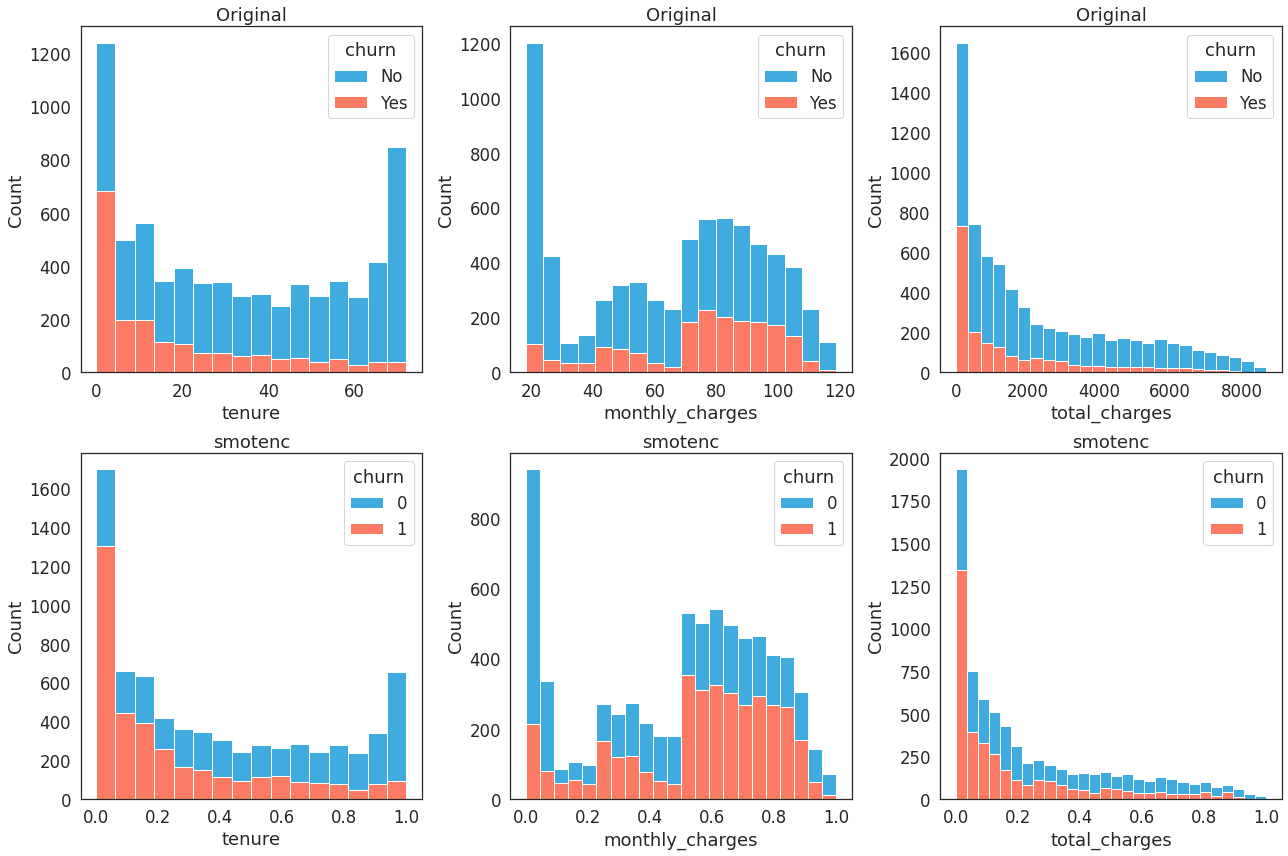

In [18]:
# column 3-45 is categorical (exclude the target)
smotenc = SMOTENC(random_state=0, categorical_features=np.arange(3,46)) # 46 because exclusive

X_train_smotenc, y_train_smotenc = smotenc.fit_resample(X_train_scale, y_train_encode)

X_train_smotenc_df = pd.DataFrame(X_train_smotenc, columns=X_train_smotenc.columns)
y_train_smotenc_df = pd.DataFrame(y_train_smotenc, columns=['churn'])

data_smotenc = pd.concat([X_train_smotenc_df, y_train_smotenc_df], axis=1)

column_numerical = ['tenure', 'monthly_charges', 'total_charges']

fig, ax = plt.subplots(2, 3, figsize=(18,12))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_numerical):
  sns.histplot(data=data, x=col, hue='churn', multiple='stack', ax=axes_list[i])
  axes_list[i].set_title('Original')

for i, col in enumerate(column_numerical):
  sns.histplot(data=data_smotenc, x=col, hue='churn', multiple='stack', ax=axes_list[i+3])
  axes_list[i+3].set_title('smotenc')

plt.tight_layout()
plt.show()

# Model
- Logistic Regression
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost
- NN

Grid Search reference: [Machine Learning Mastery](https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/)

## Function

### Print Report

In [34]:
def print_report(y_test, y_pred):
  print(classification_report(y_test, y_pred, digits=3))

  print('========================================')
  print('========================================')

  print('Accuracy\t: ', round(accuracy_score(y_test, y_pred),3))
  print('Precision\t: ', round(precision_score(y_test, y_pred, average='macro'),3)) 
  print('Recall\t\t: ', round(recall_score(y_test, y_pred, average='macro'),3))

### Grid Search

In [48]:
def grid_search(model, grid, X, y):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  grid_search = GridSearchCV(estimator=model, param_grid=grid,
                             n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
  
  grid_result = grid_search.fit(X, y)
  # summarize results
  print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
  means = grid_result.cv_results_['mean_test_score']
  stds = grid_result.cv_results_['std_test_score']
  params = grid_result.cv_results_['params']
  for mean, stdev, param in zip(means, stds, params):
      print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# import matplotlib.pyplot as plt
# scores = gs.cv_results_['mean_test_score']
# plt.plot(n_estimators, scores)
# plt.xlabel('n_estimators')
# plt.ylabel('accuracy')
# plt.xlim(0,100)
# plt.ylim(0.9,1)
# plt.show()

## Logistic Regression

### SMOTE

#### Default

In [35]:
model = LogisticRegression(max_iter=500)

model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test_scale)

print_report(y_test_encode, y_pred)

              precision    recall  f1-score   support

           0      0.904     0.732     0.809      1552
           1      0.515     0.786     0.622       561

    accuracy                          0.746      2113
   macro avg      0.710     0.759     0.716      2113
weighted avg      0.801     0.746     0.759      2113

Accuracy	:  0.746
Precision	:  0.71
Recall		:  0.759


#### Grid Search

In [49]:
# define models and parameters
model = LogisticRegression()

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers, penalty=penalty, C=c_values)

grid_search(model, grid, X_train_smote, y_train_smote)

Best: 0.781844 using {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.780832 (0.015308) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.780832 (0.015308) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.780832 (0.015308) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.781844 (0.015564) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.781798 (0.015484) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.781844 (0.015564) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.781292 (0.015397) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.781246 (0.015487) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.781246 (0.015487) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.776507 (0.013809) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.776507 (0.013809) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.776506 (0.013755) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.771123 (0.015616) with

In [41]:
model = LogisticRegression(C=10, penalty='l2', solver='newton-cg')

model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test_scale)

print_report(y_test_encode, y_pred)

              precision    recall  f1-score   support

           0      0.907     0.733     0.811      1552
           1      0.517     0.793     0.626       561

    accuracy                          0.749      2113
   macro avg      0.712     0.763     0.719      2113
weighted avg      0.804     0.749     0.762      2113

Accuracy	:  0.749
Precision	:  0.712
Recall		:  0.763


### SMOTENC

#### Default

In [36]:
model = LogisticRegression(max_iter=500)

model.fit(X_train_smotenc, y_train_smotenc)

y_pred = model.predict(X_test_scale)

print_report(y_test_encode, y_pred)

              precision    recall  f1-score   support

           0      0.898     0.766     0.827      1552
           1      0.540     0.759     0.631       561

    accuracy                          0.764      2113
   macro avg      0.719     0.763     0.729      2113
weighted avg      0.803     0.764     0.775      2113

Accuracy	:  0.764
Precision	:  0.719
Recall		:  0.763


#### Grid Search

In [51]:
# define models and parameters
model = LogisticRegression()

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers, penalty=penalty, C=c_values)

grid_search(model, grid, X_train_smotenc, y_train_smotenc)

Best: 0.805219 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.805219 (0.014009) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.805174 (0.013945) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.805219 (0.014009) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.804989 (0.013603) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.804943 (0.013730) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.804851 (0.013658) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.803103 (0.013551) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.803379 (0.014023) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.803149 (0.013610) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.796338 (0.014655) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.796200 (0.014676) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.796062 (0.014293) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.786906 (0.015389) wit

In [43]:
model = LogisticRegression(C=100, penalty='l2', solver='newton-cg')

model.fit(X_train_smotenc, y_train_smotenc)

y_pred = model.predict(X_test_scale)

print_report(y_test_encode, y_pred)

              precision    recall  f1-score   support

           0      0.898     0.763     0.825      1552
           1      0.537     0.759     0.629       561

    accuracy                          0.762      2113
   macro avg      0.717     0.761     0.727      2113
weighted avg      0.802     0.762     0.773      2113

Accuracy	:  0.762
Precision	:  0.717
Recall		:  0.761


## Ridge Classifier

### SMOTE

#### Default

In [44]:
model = RidgeClassifier()

model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test_scale)

print_report(y_test_encode, y_pred)

              precision    recall  f1-score   support

           0      0.903     0.735     0.810      1552
           1      0.516     0.783     0.622       561

    accuracy                          0.747      2113
   macro avg      0.710     0.759     0.716      2113
weighted avg      0.800     0.747     0.760      2113

Accuracy	:  0.747
Precision	:  0.71
Recall		:  0.759


#### Grid Search

In [47]:
# define models and parameters
model = RidgeClassifier()

alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# define grid search
grid = dict(alpha=alpha)

grid_search(model, grid, X_train_smote, y_train_smote)

Best: 0.775817 using {'alpha': 0.4}
0.775633 (0.013600) with: {'alpha': 0.1}
0.775817 (0.013659) with: {'alpha': 0.2}
0.775771 (0.013599) with: {'alpha': 0.3}
0.775817 (0.013663) with: {'alpha': 0.4}
0.775817 (0.013663) with: {'alpha': 0.5}
0.775725 (0.013610) with: {'alpha': 0.6}
0.775724 (0.013503) with: {'alpha': 0.7}
0.775632 (0.013531) with: {'alpha': 0.8}
0.775586 (0.013413) with: {'alpha': 0.9}
0.775725 (0.013535) with: {'alpha': 1.0}


In [52]:
model = RidgeClassifier(alpha=0.4)

model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test_scale)

print_report(y_test_encode, y_pred)

              precision    recall  f1-score   support

           0      0.903     0.735     0.810      1552
           1      0.516     0.783     0.622       561

    accuracy                          0.747      2113
   macro avg      0.710     0.759     0.716      2113
weighted avg      0.800     0.747     0.760      2113

Accuracy	:  0.747
Precision	:  0.71
Recall		:  0.759


### SMOTENC

#### Default

In [53]:
model = RidgeClassifier()

model.fit(X_train_smotenc, y_train_smotenc)

y_pred = model.predict(X_test_scale)

print_report(y_test_encode, y_pred)

              precision    recall  f1-score   support

           0      0.894     0.753     0.817      1552
           1      0.524     0.752     0.618       561

    accuracy                          0.753      2113
   macro avg      0.709     0.753     0.718      2113
weighted avg      0.796     0.753     0.764      2113

Accuracy	:  0.753
Precision	:  0.709
Recall		:  0.753


#### Grid Search

In [54]:
# define models and parameters
model = RidgeClassifier()

alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# define grid search
grid = dict(alpha=alpha)

grid_search(model, grid, X_train_smotenc, y_train_smotenc)

Best: 0.797627 using {'alpha': 0.8}
0.797351 (0.014747) with: {'alpha': 0.1}
0.797259 (0.014817) with: {'alpha': 0.2}
0.797305 (0.014742) with: {'alpha': 0.3}
0.797397 (0.014710) with: {'alpha': 0.4}
0.797397 (0.014610) with: {'alpha': 0.5}
0.797443 (0.014542) with: {'alpha': 0.6}
0.797581 (0.014475) with: {'alpha': 0.7}
0.797627 (0.014550) with: {'alpha': 0.8}
0.797535 (0.014571) with: {'alpha': 0.9}
0.797535 (0.014571) with: {'alpha': 1.0}


In [55]:
model = RidgeClassifier(alpha=0.8)

model.fit(X_train_smotenc, y_train_smotenc)

y_pred = model.predict(X_test_scale)

print_report(y_test_encode, y_pred)

              precision    recall  f1-score   support

           0      0.894     0.753     0.817      1552
           1      0.524     0.752     0.618       561

    accuracy                          0.753      2113
   macro avg      0.709     0.753     0.718      2113
weighted avg      0.796     0.753     0.764      2113

Accuracy	:  0.753
Precision	:  0.709
Recall		:  0.753


## KNN

### SMOTE

#### Default

In [58]:
model = KNeighborsClassifier()

model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test_scale)

print_report(y_test_encode, y_pred)

              precision    recall  f1-score   support

           0      0.868     0.666     0.754      1552
           1      0.438     0.720     0.545       561

    accuracy                          0.681      2113
   macro avg      0.653     0.693     0.649      2113
weighted avg      0.754     0.681     0.698      2113

Accuracy	:  0.681
Precision	:  0.653
Recall		:  0.693


#### Grid Search

In [57]:
# define models and parameters
model = KNeighborsClassifier()

n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# define grid search
grid = dict(n_neighbors=n_neighbors, weights=weights, metric=metric)

grid_search(model, grid, X_train_smote, y_train_smote)

Best: 0.840237 using {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
0.827765 (0.011691) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.827765 (0.011691) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.800756 (0.014281) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.812765 (0.011449) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.798731 (0.012899) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.812904 (0.012590) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.792655 (0.011378) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.808026 (0.012058) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.787180 (0.013409) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.804851 (0.012901) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.782808 (

In [59]:
model = KNeighborsClassifier(metric='manhattan', n_neighbors=1, weights='uniform')

model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test_scale)

print_report(y_test_encode, y_pred)

              precision    recall  f1-score   support

           0      0.811     0.787     0.799      1552
           1      0.456     0.494     0.474       561

    accuracy                          0.709      2113
   macro avg      0.633     0.640     0.636      2113
weighted avg      0.717     0.709     0.713      2113

Accuracy	:  0.709
Precision	:  0.633
Recall		:  0.64


### SMOTENC

#### Default

In [60]:
model = KNeighborsClassifier()

model.fit(X_train_smotenc, y_train_smotenc)

y_pred = model.predict(X_test_scale)

print_report(y_test_encode, y_pred)

              precision    recall  f1-score   support

           0      0.871     0.698     0.775      1552
           1      0.461     0.715     0.560       561

    accuracy                          0.702      2113
   macro avg      0.666     0.706     0.668      2113
weighted avg      0.762     0.702     0.718      2113

Accuracy	:  0.702
Precision	:  0.666
Recall		:  0.706


#### Grid Search

In [61]:
# define models and parameters
model = KNeighborsClassifier()

n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# define grid search
grid = dict(n_neighbors=n_neighbors, weights=weights, metric=metric)

grid_search(model, grid, X_train_smotenc, y_train_smotenc)

Best: 0.819574 using {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
0.811060 (0.012941) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.811060 (0.012941) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.815571 (0.012958) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.815203 (0.012544) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.812489 (0.012985) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.816446 (0.012717) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.808991 (0.013251) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.814697 (0.014400) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.804896 (0.013279) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.814283 (0.013737) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.800525 

In [62]:
model = KNeighborsClassifier(metric='manhattan', n_neighbors=5, weights='distance')

model.fit(X_train_smotenc, y_train_smotenc)

y_pred = model.predict(X_test_scale)

print_report(y_test_encode, y_pred)

              precision    recall  f1-score   support

           0      0.843     0.728     0.781      1552
           1      0.454     0.626     0.526       561

    accuracy                          0.701      2113
   macro avg      0.649     0.677     0.654      2113
weighted avg      0.740     0.701     0.714      2113

Accuracy	:  0.701
Precision	:  0.649
Recall		:  0.677


## SVM

### SMOTE

#### Default

In [63]:
model = SVC()

model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test_scale)

print_report(y_test_encode, y_pred)

              precision    recall  f1-score   support

           0      0.889     0.774     0.827      1552
           1      0.539     0.733     0.621       561

    accuracy                          0.763      2113
   macro avg      0.714     0.753     0.724      2113
weighted avg      0.796     0.763     0.773      2113

Accuracy	:  0.763
Precision	:  0.714
Recall		:  0.753


#### Grid Search

In [64]:
# define model and parameters
model = SVC()

kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

# define grid search
grid = dict(kernel=kernel, C=C, gamma=gamma)

grid_search(model, grid, X_train_smote, y_train_smote)

Best: 0.837933 using {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.823717 (0.012827) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.836923 (0.012558) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.672649 (0.015083) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.824820 (0.013265) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.837933 (0.013447) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.671866 (0.014912) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.811890 (0.014097) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.810282 (0.016717) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.674535 (0.014422) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.780280 (0.015672) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.772826 (0.015109) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.725524 (0.014387) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.766429 (0.015006) with: {'C': 0.01, 'gamma': 'scale', 

In [65]:
model = SVC(C=10, gamma='scale', kernel='rbf')

model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test_scale)

print_report(y_test_encode, y_pred)

              precision    recall  f1-score   support

           0      0.858     0.787     0.821      1552
           1      0.521     0.640     0.574       561

    accuracy                          0.748      2113
   macro avg      0.690     0.714     0.698      2113
weighted avg      0.769     0.748     0.756      2113

Accuracy	:  0.748
Precision	:  0.69
Recall		:  0.714


### SMOTENC

#### Default

In [66]:
model = SVC()

model.fit(X_train_smotenc, y_train_smotenc)

y_pred = model.predict(X_test_scale)

print_report(y_test_encode, y_pred)

              precision    recall  f1-score   support

           0      0.882     0.754     0.813      1552
           1      0.515     0.722     0.601       561

    accuracy                          0.745      2113
   macro avg      0.698     0.738     0.707      2113
weighted avg      0.785     0.745     0.757      2113

Accuracy	:  0.745
Precision	:  0.698
Recall		:  0.738


#### Grid Search

In [67]:
# define model and parameters
model = SVC()

kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

# define grid search
grid = dict(kernel=kernel, C=C, gamma=gamma)

grid_search(model, grid, X_train_smotenc, y_train_smotenc)

Best: 0.829422 using {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.817549 (0.012382) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.824635 (0.014346) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.672510 (0.018470) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.827213 (0.012890) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.829422 (0.013357) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.680748 (0.013259) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.822152 (0.015615) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.815020 (0.016691) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.682081 (0.011892) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.800895 (0.017060) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.791831 (0.016813) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.732010 (0.015408) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.784561 (0.015926) with: {'C': 0.01, 'gamma': 'scale', 

In [68]:
model = SVC(C=10, gamma='scale', kernel='rbf')

model.fit(X_train_smotenc, y_train_smotenc)

y_pred = model.predict(X_test_scale)

print_report(y_test_encode, y_pred)

              precision    recall  f1-score   support

           0      0.865     0.776     0.818      1552
           1      0.518     0.665     0.582       561

    accuracy                          0.747      2113
   macro avg      0.692     0.721     0.700      2113
weighted avg      0.773     0.747     0.756      2113

Accuracy	:  0.747
Precision	:  0.692
Recall		:  0.721


## Decision Tree

### SMOTE

#### Default

In [69]:
model = DecisionTreeClassifier(random_state=1)

model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test_scale)

print_report(y_test_encode, y_pred)

              precision    recall  f1-score   support

           0      0.833     0.794     0.813      1552
           1      0.496     0.560     0.526       561

    accuracy                          0.732      2113
   macro avg      0.665     0.677     0.670      2113
weighted avg      0.744     0.732     0.737      2113

Accuracy	:  0.732
Precision	:  0.665
Recall		:  0.677


#### Grid Search

In [70]:
# define model and parameters
model = DecisionTreeClassifier()

max_depth = [5, 10, 15, 20, 25]
min_samples_leaf = [1, 3]
max_leaf_nodes = [10, 20, 30, 40, 50]

# define grid search
grid = dict(max_depth=max_depth, min_samples_leaf=min_samples_leaf, max_leaf_nodes=max_leaf_nodes)

grid_search(model, grid, X_train_smote, y_train_smote)

Best: 0.798409 using {'max_depth': 25, 'max_leaf_nodes': 50, 'min_samples_leaf': 1}
0.768634 (0.016381) with: {'max_depth': 5, 'max_leaf_nodes': 10, 'min_samples_leaf': 1}
0.768634 (0.016381) with: {'max_depth': 5, 'max_leaf_nodes': 10, 'min_samples_leaf': 3}
0.782626 (0.012619) with: {'max_depth': 5, 'max_leaf_nodes': 20, 'min_samples_leaf': 1}
0.782626 (0.012619) with: {'max_depth': 5, 'max_leaf_nodes': 20, 'min_samples_leaf': 3}
0.782764 (0.012670) with: {'max_depth': 5, 'max_leaf_nodes': 30, 'min_samples_leaf': 1}
0.782672 (0.012674) with: {'max_depth': 5, 'max_leaf_nodes': 30, 'min_samples_leaf': 3}
0.782718 (0.012534) with: {'max_depth': 5, 'max_leaf_nodes': 40, 'min_samples_leaf': 1}
0.782626 (0.012608) with: {'max_depth': 5, 'max_leaf_nodes': 40, 'min_samples_leaf': 3}
0.782764 (0.012670) with: {'max_depth': 5, 'max_leaf_nodes': 50, 'min_samples_leaf': 1}
0.782626 (0.012608) with: {'max_depth': 5, 'max_leaf_nodes': 50, 'min_samples_leaf': 3}
0.768634 (0.016381) with: {'max_dept

In [73]:
model = DecisionTreeClassifier(max_depth=25, max_leaf_nodes=50,
                               min_samples_leaf=1, random_state=1)

model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test_scale)

print_report(y_test_encode, y_pred)

              precision    recall  f1-score   support

           0      0.871     0.764     0.814      1552
           1      0.512     0.686     0.586       561

    accuracy                          0.743      2113
   macro avg      0.691     0.725     0.700      2113
weighted avg      0.775     0.743     0.753      2113

Accuracy	:  0.743
Precision	:  0.691
Recall		:  0.725


### SMOTENC

#### Default

In [75]:
model = DecisionTreeClassifier(random_state=1)

model.fit(X_train_smotenc, y_train_smotenc)

y_pred = model.predict(X_test_scale)

print_report(y_test_encode, y_pred)

              precision    recall  f1-score   support

           0      0.835     0.782     0.808      1552
           1      0.487     0.574     0.527       561

    accuracy                          0.726      2113
   macro avg      0.661     0.678     0.667      2113
weighted avg      0.743     0.726     0.733      2113

Accuracy	:  0.726
Precision	:  0.661
Recall		:  0.678


#### Grid Search

In [76]:
# define model and parameters
model = DecisionTreeClassifier()

max_depth = [5, 10, 15, 20, 25]
min_samples_leaf = [1, 3]
max_leaf_nodes = [10, 20, 30, 40, 50]

# define grid search
grid = dict(max_depth=max_depth, min_samples_leaf=min_samples_leaf, max_leaf_nodes=max_leaf_nodes)

grid_search(model, grid, X_train_smotenc, y_train_smotenc)

Best: 0.794728 using {'max_depth': 10, 'max_leaf_nodes': 50, 'min_samples_leaf': 3}
0.767856 (0.014012) with: {'max_depth': 5, 'max_leaf_nodes': 10, 'min_samples_leaf': 1}
0.767856 (0.014012) with: {'max_depth': 5, 'max_leaf_nodes': 10, 'min_samples_leaf': 3}
0.782165 (0.015881) with: {'max_depth': 5, 'max_leaf_nodes': 20, 'min_samples_leaf': 1}
0.782165 (0.015881) with: {'max_depth': 5, 'max_leaf_nodes': 20, 'min_samples_leaf': 3}
0.784098 (0.015232) with: {'max_depth': 5, 'max_leaf_nodes': 30, 'min_samples_leaf': 1}
0.783960 (0.015241) with: {'max_depth': 5, 'max_leaf_nodes': 30, 'min_samples_leaf': 3}
0.784098 (0.015232) with: {'max_depth': 5, 'max_leaf_nodes': 40, 'min_samples_leaf': 1}
0.783914 (0.015254) with: {'max_depth': 5, 'max_leaf_nodes': 40, 'min_samples_leaf': 3}
0.784052 (0.015265) with: {'max_depth': 5, 'max_leaf_nodes': 50, 'min_samples_leaf': 1}
0.783914 (0.015262) with: {'max_depth': 5, 'max_leaf_nodes': 50, 'min_samples_leaf': 3}
0.767856 (0.014012) with: {'max_dept

In [77]:
model = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=50,
                               min_samples_leaf=3, random_state=1)

model.fit(X_train_smotenc, y_train_smotenc)

y_pred = model.predict(X_test_scale)

print_report(y_test_encode, y_pred)

              precision    recall  f1-score   support

           0      0.871     0.753     0.808      1552
           1      0.503     0.692     0.583       561

    accuracy                          0.737      2113
   macro avg      0.687     0.722     0.695      2113
weighted avg      0.773     0.737     0.748      2113

Accuracy	:  0.737
Precision	:  0.687
Recall		:  0.722


## Random Forest

### SMOTE

In [ ]:
model = RandomForestClassifier(n_estimators=100,
                               max_depth=10,
                               random_state=1)

model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test_scale)

print_report(y_test_encode, y_pred)

              precision    recall  f1-score   support

           0      0.890     0.793     0.839      1552
           1      0.560     0.729     0.634       561

    accuracy                          0.776      2113
   macro avg      0.725     0.761     0.736      2113
weighted avg      0.803     0.776     0.784      2113

Accuracy	:  0.776
Precision	:  0.725
Recall		:  0.761


### SMOTENC

In [ ]:
model = RandomForestClassifier(n_estimators=100,
                               max_depth=10,
                               random_state=1)

model.fit(X_train_smotenc, y_train_smotenc)

y_pred = model.predict(X_test_scale)

print_report(y_test_encode, y_pred)

              precision    recall  f1-score   support

           0      0.888     0.794     0.839      1552
           1      0.560     0.724     0.631       561

    accuracy                          0.776      2113
   macro avg      0.724     0.759     0.735      2113
weighted avg      0.801     0.776     0.784      2113

Accuracy	:  0.776
Precision	:  0.724
Recall		:  0.759


## AdaBoost

### SMOTE

In [ ]:
model = AdaBoostClassifier(n_estimators=100, random_state=0)

model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test_scale)

print_report(y_test_encode, y_pred)

              precision    recall  f1-score   support

           0      0.888     0.792     0.837      1552
           1      0.557     0.724     0.629       561

    accuracy                          0.774      2113
   macro avg      0.722     0.758     0.733      2113
weighted avg      0.800     0.774     0.782      2113

Accuracy	:  0.774
Precision	:  0.722
Recall		:  0.758


### SMOTENC

In [ ]:
model = AdaBoostClassifier(n_estimators=100, random_state=0)

model.fit(X_train_smotenc, y_train_smotenc)

y_pred = model.predict(X_test_scale)

print_report(y_test_encode, y_pred)

              precision    recall  f1-score   support

           0      0.892     0.761     0.821      1552
           1      0.530     0.745     0.619       561

    accuracy                          0.757      2113
   macro avg      0.711     0.753     0.720      2113
weighted avg      0.796     0.757     0.768      2113

Accuracy	:  0.757
Precision	:  0.711
Recall		:  0.753


## Gradient Boosing

### SMOTE

In [ ]:
model = GradientBoostingClassifier(n_estimators=100, random_state=0)

model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test_scale)

print_report(y_test_encode, y_pred)

              precision    recall  f1-score   support

           0      0.882     0.817     0.848      1552
           1      0.580     0.699     0.634       561

    accuracy                          0.786      2113
   macro avg      0.731     0.758     0.741      2113
weighted avg      0.802     0.786     0.791      2113

Accuracy	:  0.786
Precision	:  0.731
Recall		:  0.758


### SMOTENC

In [ ]:
model = GradientBoostingClassifier(n_estimators=100, random_state=0)

model.fit(X_train_smotenc, y_train_smotenc)

y_pred = model.predict(X_test_scale)

print_report(y_test_encode, y_pred)

              precision    recall  f1-score   support

           0      0.889     0.782     0.832      1552
           1      0.547     0.731     0.626       561

    accuracy                          0.768      2113
   macro avg      0.718     0.756     0.729      2113
weighted avg      0.799     0.768     0.777      2113

Accuracy	:  0.768
Precision	:  0.718
Recall		:  0.756


## Hist Gradient Boosting

### SMOTE

In [ ]:
model = HistGradientBoostingClassifier(max_iter=100, random_state=0)

model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test_scale)

print_report(y_test_encode, y_pred)

              precision    recall  f1-score   support

           0      0.862     0.844     0.853      1552
           1      0.593     0.627     0.610       561

    accuracy                          0.787      2113
   macro avg      0.728     0.736     0.731      2113
weighted avg      0.791     0.787     0.788      2113

Accuracy	:  0.787
Precision	:  0.728
Recall		:  0.736


### SMOTENC

In [ ]:
model = HistGradientBoostingClassifier(max_iter=100, random_state=0)

model.fit(X_train_smotenc, y_train_smotenc)

y_pred = model.predict(X_test_scale)

print_report(y_test_encode, y_pred)

              precision    recall  f1-score   support

           0      0.875     0.800     0.836      1552
           1      0.553     0.684     0.612       561

    accuracy                          0.770      2113
   macro avg      0.714     0.742     0.724      2113
weighted avg      0.790     0.770     0.777      2113

Accuracy	:  0.77
Precision	:  0.714
Recall		:  0.742


## Neural Network

### SMOTE

In [ ]:
model = MLPClassifier(max_iter=1000,
                      hidden_layer_sizes=(100,100),
                      verbose=True,
                      random_state=0)

model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test_scale)

Iteration 1, loss = 0.57411182
Iteration 2, loss = 0.47797508
Iteration 3, loss = 0.46236141
Iteration 4, loss = 0.45435139
Iteration 5, loss = 0.44740845
Iteration 6, loss = 0.44104603
Iteration 7, loss = 0.43401010
Iteration 8, loss = 0.42880240
Iteration 9, loss = 0.42676570
Iteration 10, loss = 0.41739287
Iteration 11, loss = 0.41287699
Iteration 12, loss = 0.40965700
Iteration 13, loss = 0.40095523
Iteration 14, loss = 0.39636647
Iteration 15, loss = 0.39110685
Iteration 16, loss = 0.38355473
Iteration 17, loss = 0.38269576
Iteration 18, loss = 0.37389730
Iteration 19, loss = 0.37007208
Iteration 20, loss = 0.36866741
Iteration 21, loss = 0.36086887
Iteration 22, loss = 0.35121699
Iteration 23, loss = 0.34713571
Iteration 24, loss = 0.33950149
Iteration 25, loss = 0.33628309
Iteration 26, loss = 0.33231741
Iteration 27, loss = 0.32796727
Iteration 28, loss = 0.32133262
Iteration 29, loss = 0.32358420
Iteration 30, loss = 0.31789473
Iteration 31, loss = 0.31859539
Iteration 32, los

In [ ]:
print_report(y_test_encode, y_pred)

              precision    recall  f1-score   support

           0      0.801     0.831     0.815      1552
           1      0.477     0.428     0.451       561

    accuracy                          0.724      2113
   macro avg      0.639     0.629     0.633      2113
weighted avg      0.715     0.724     0.719      2113

Accuracy	:  0.724
Precision	:  0.639
Recall		:  0.629


### SMOTENC

In [ ]:
model = MLPClassifier(max_iter=1000,
                      hidden_layer_sizes=(100,100),
                      verbose=True,
                      random_state=0)

model.fit(X_train_smotenc, y_train_smotenc)

y_pred = model.predict(X_test_scale)

Iteration 1, loss = 0.56116461
Iteration 2, loss = 0.45822357
Iteration 3, loss = 0.44244196
Iteration 4, loss = 0.43280602
Iteration 5, loss = 0.42505988
Iteration 6, loss = 0.41784746
Iteration 7, loss = 0.40889861
Iteration 8, loss = 0.40309690
Iteration 9, loss = 0.40032697
Iteration 10, loss = 0.39216386
Iteration 11, loss = 0.38719824
Iteration 12, loss = 0.38584228
Iteration 13, loss = 0.37788290
Iteration 14, loss = 0.37376208
Iteration 15, loss = 0.36948831
Iteration 16, loss = 0.36481590
Iteration 17, loss = 0.36340111
Iteration 18, loss = 0.35794747
Iteration 19, loss = 0.35635698
Iteration 20, loss = 0.35350826
Iteration 21, loss = 0.35018807
Iteration 22, loss = 0.34292205
Iteration 23, loss = 0.34325342
Iteration 24, loss = 0.34069415
Iteration 25, loss = 0.33509619
Iteration 26, loss = 0.33080176
Iteration 27, loss = 0.32903319
Iteration 28, loss = 0.32564631
Iteration 29, loss = 0.32994457
Iteration 30, loss = 0.32518238
Iteration 31, loss = 0.32381237
Iteration 32, los

In [ ]:
print_report(y_test_encode, y_pred)

              precision    recall  f1-score   support

           0      0.833     0.789     0.810      1552
           1      0.490     0.561     0.523       561

    accuracy                          0.728      2113
   macro avg      0.661     0.675     0.667      2113
weighted avg      0.742     0.728     0.734      2113

Accuracy	:  0.728
Precision	:  0.661
Recall		:  0.675


# References
- Analytics Vidhya, Churn Prediction - Commercial use of Data Science. [link](https://www.analyticsvidhya.com/blog/2021/08/churn-prediction-commercial-use-of-data-science/)
- Avaus, Predicting Customer Churn. [link](https://www.avaus.com/blog/predicting-customer-churn)
- Kaggle, Telco Customer Churn Dataset. [link](https://www.kaggle.com/blastchar/telco-customer-churn)
- IBM, Telco Customer Churn. [link](https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113)
- Hardvard Business Review, The Value of Keeping the Right Customers. [link](https://hbr.org/2014/10/the-value-of-keeping-the-right-customers)
- OutboundEngine, Customer Retention Marketing vs. Customer Acquisition Marketing. [link](https://www.outboundengine.com/blog/customer-retention-marketing-vs-customer-acquisition-marketing/)
- Jessica Miles, Read this before you "Drop First". [link](https://towardsdatascience.com/drop-first-can-hurt-your-ols-regression-models-interpretability-4ca529cfb707)
- Shaked Zychlinski, The Search for Categorical Correlation. [link](https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9)

<img src="https://images.squarespace-cdn.com/content/56713bf4dc5cb41142f28d1f/1450306657208-N3NFCZECC1X5Y7LKZXNS/devourThePie3.gif?content-type=image%2Fgif" width=70%>